In [1]:
%matplotlib inline
import faulthandler
import numpy as np
import matplotlib.pyplot as plt
import obspy 

from obspy.signal.filter import bandpass
from prelude import *
from tqdm import trange, tqdm

faulthandler.enable()

In [2]:
tr = obspy.read("/home/irseppi/nodal_data/500sps/2019_02_11/ZE_10*.msd")
tr_new = obspy.read("/home/irseppi/nodal_data/50sps/2019_02_11/ZE_10*.msd")

In [8]:
# Filtering with a bandpass on a copy of the original Trace
tr_filt = tr.copy()
tr_filt.filter('bandpass', freqmin=1, freqmax=25)

45 Trace(s) in Stream:

ZE.1001..DP1 | 2019-02-11T18:48:55.272000Z - 2019-02-11T23:59:59.998000Z | 500.0 Hz, 9332364 samples
...
(43 other traces)
...
ZE.1015..DPZ | 2019-02-11T23:49:00.426000Z - 2019-02-11T23:59:59.998000Z | 500.0 Hz, 329787 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [9]:
# Filtering with a bandpass on a copy of the downsampled Trace
tr_new_filt = tr_new.copy()
tr_new_filt.filter('bandpass', freqmin=1, freqmax=25)

/home/irseppi/.conda/envs/denalinodal/lib/python3.10/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (25) of bandpass is at or above Nyquist (25.0). Applying a high-pass instead.
  warnings.warn(msg)


45 Trace(s) in Stream:

ZE.1001..DP1 | 2019-02-11T18:48:55.272000Z - 2019-02-11T23:59:59.972000Z | 50.0 Hz, 933236 samples
...
(43 other traces)
...
ZE.1015..DPZ | 2019-02-11T23:49:00.426000Z - 2019-02-11T23:59:59.966000Z | 50.0 Hz, 32978 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

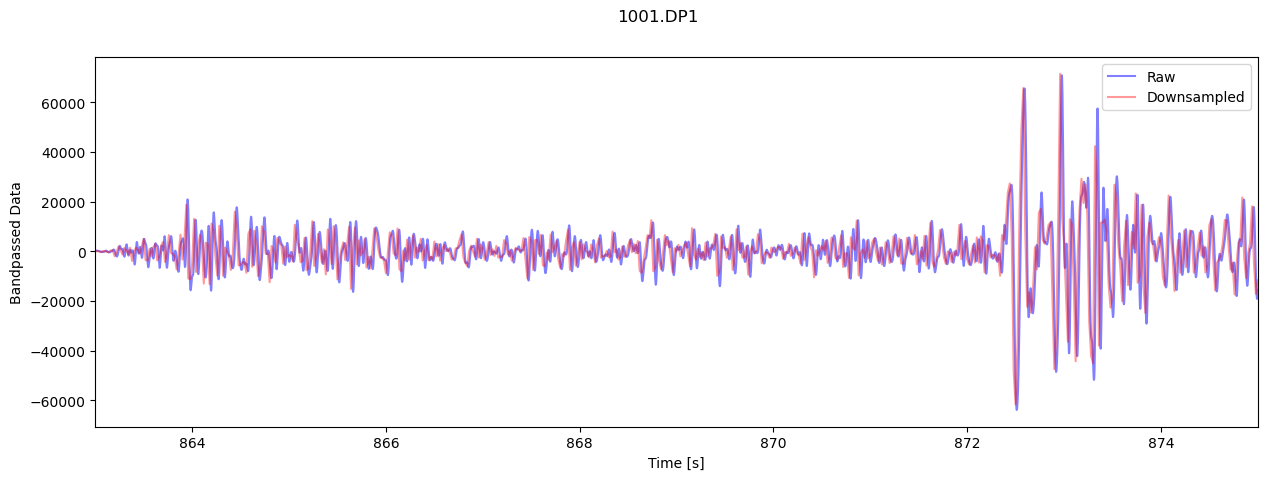

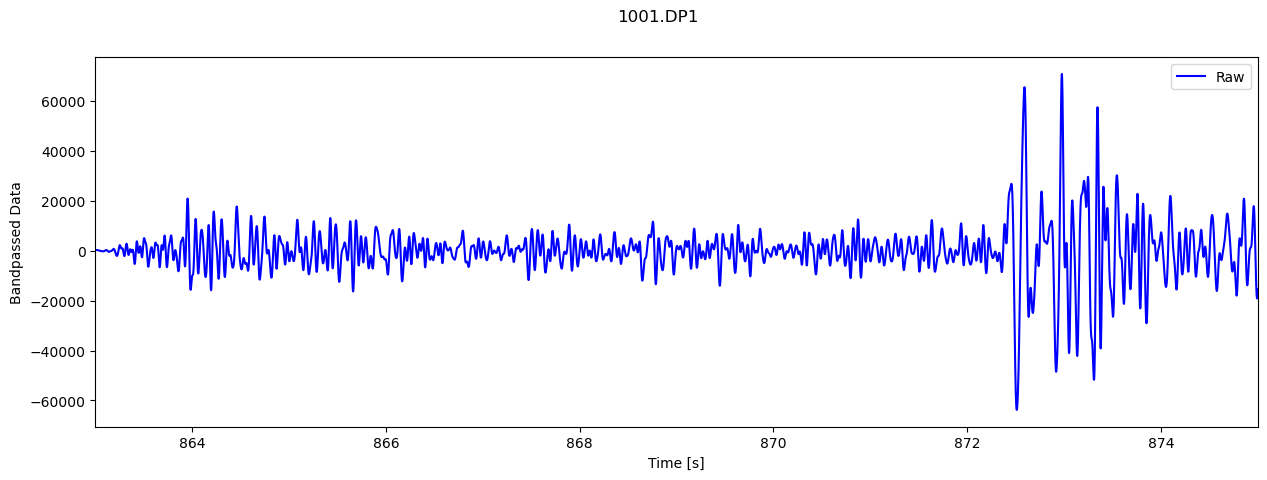

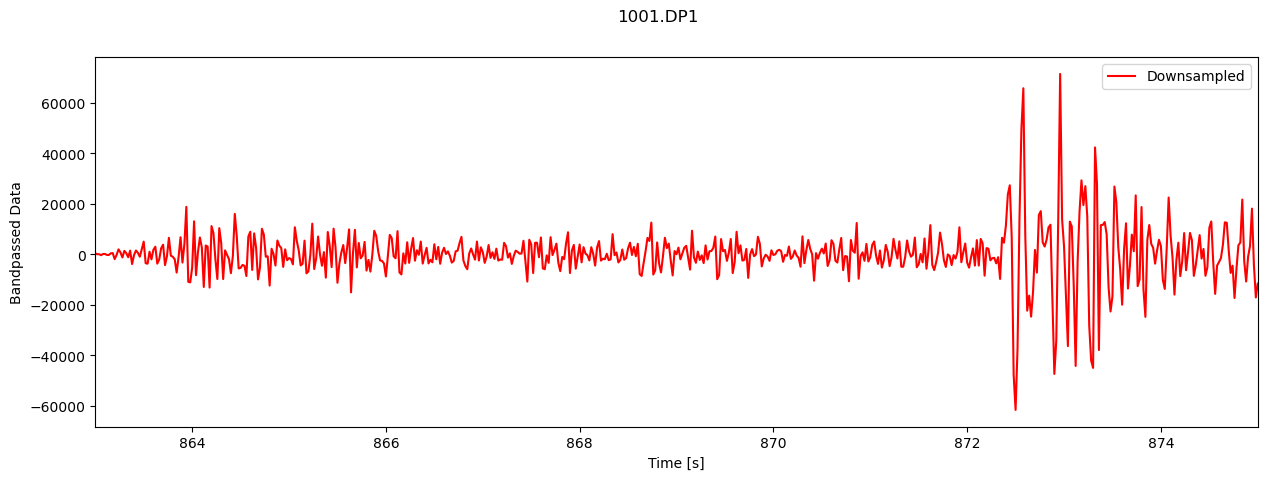

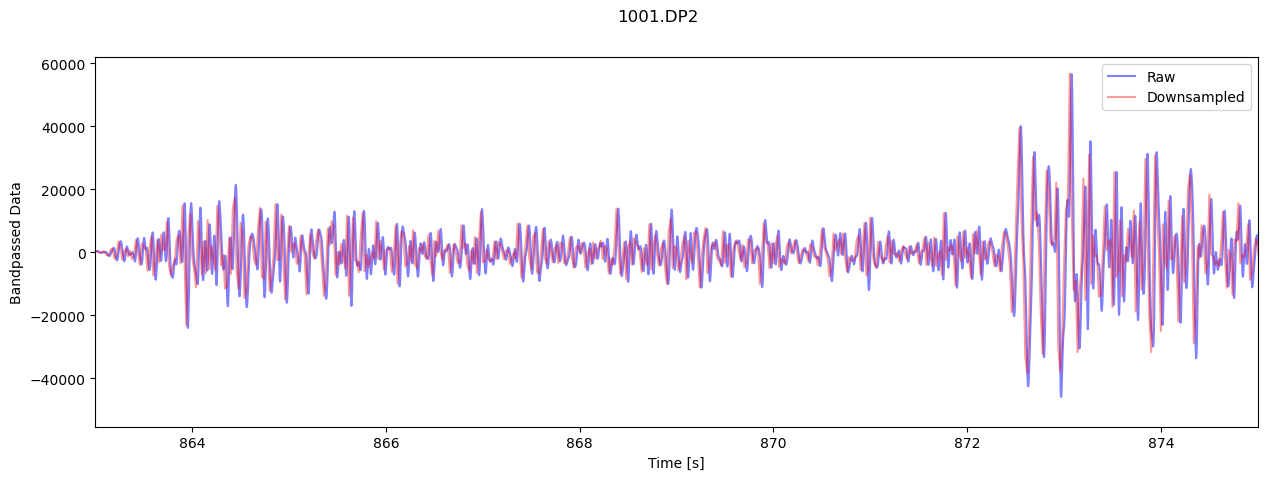

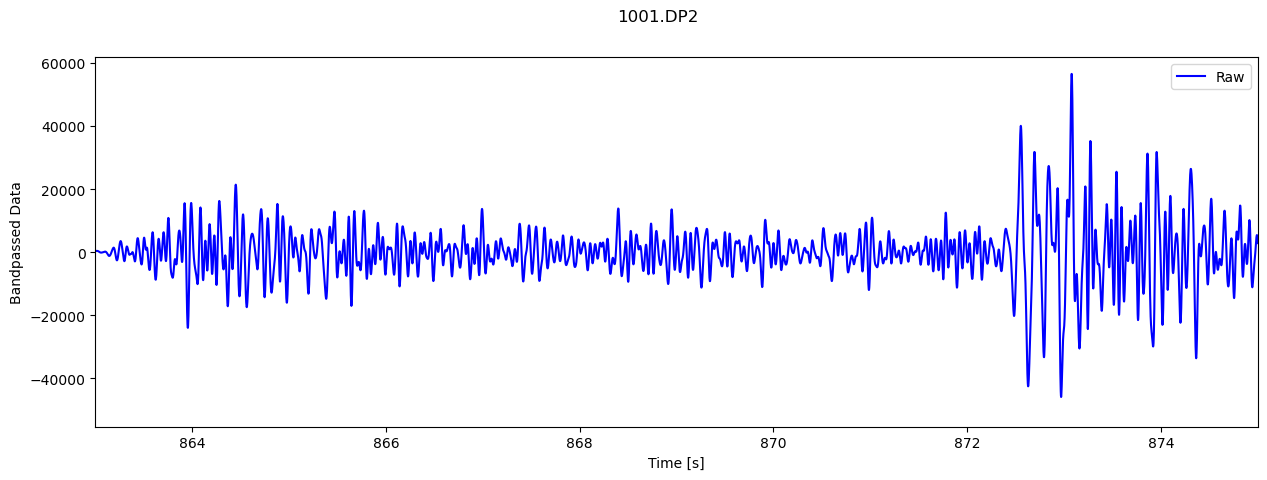

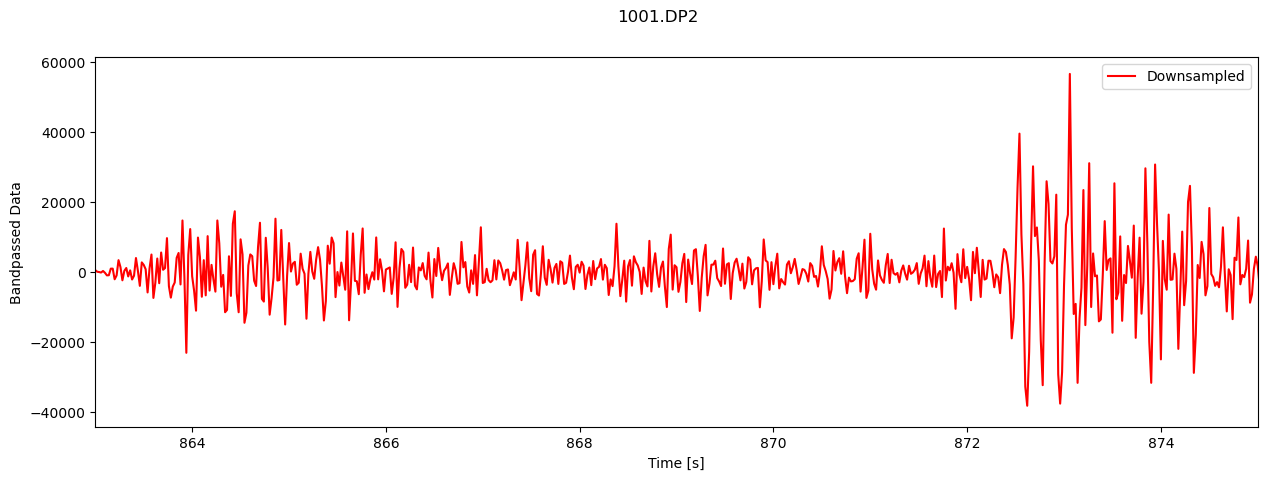

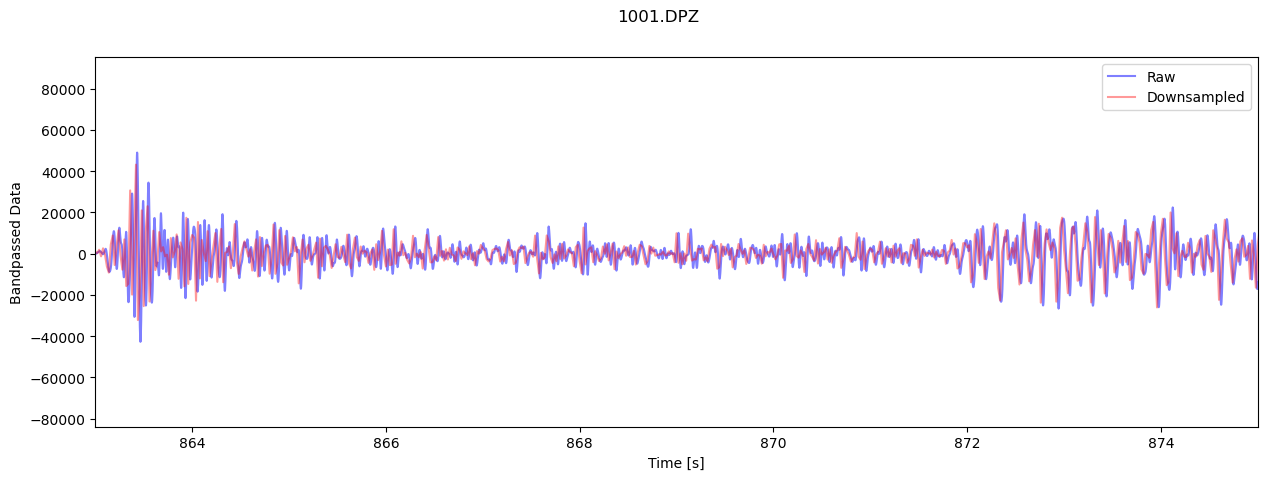

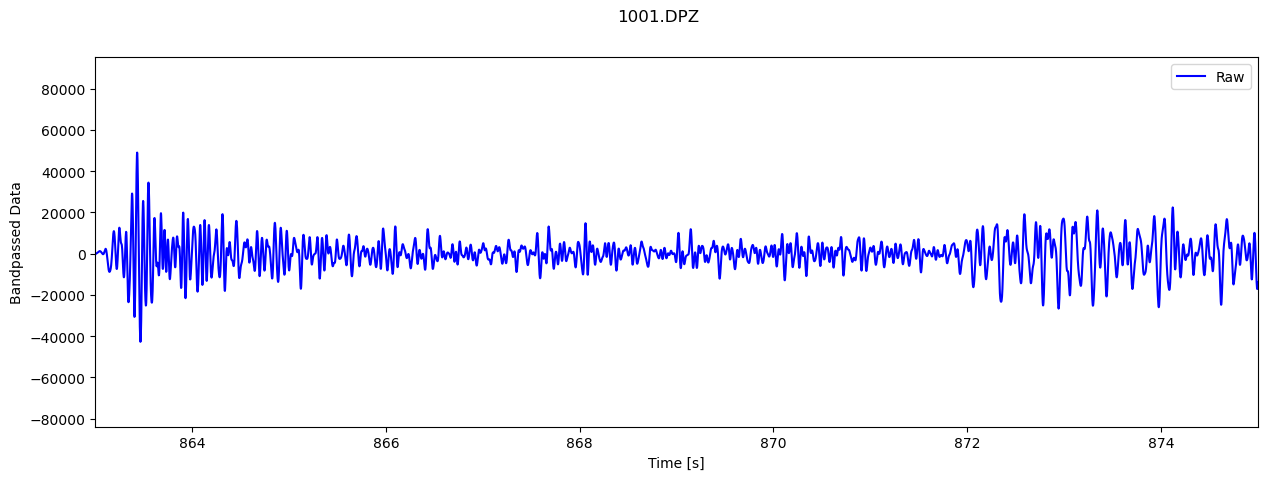

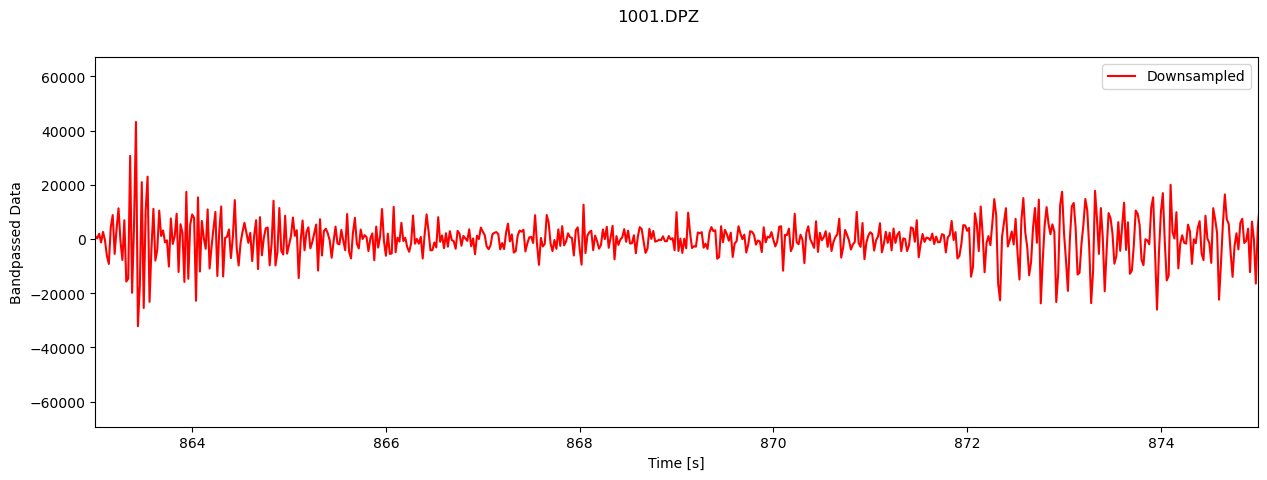

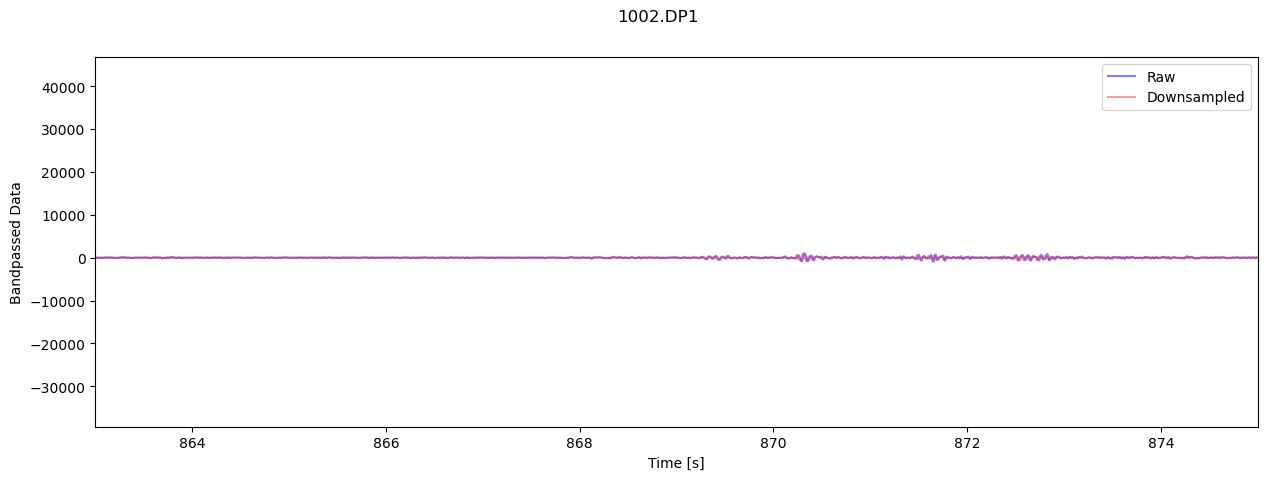

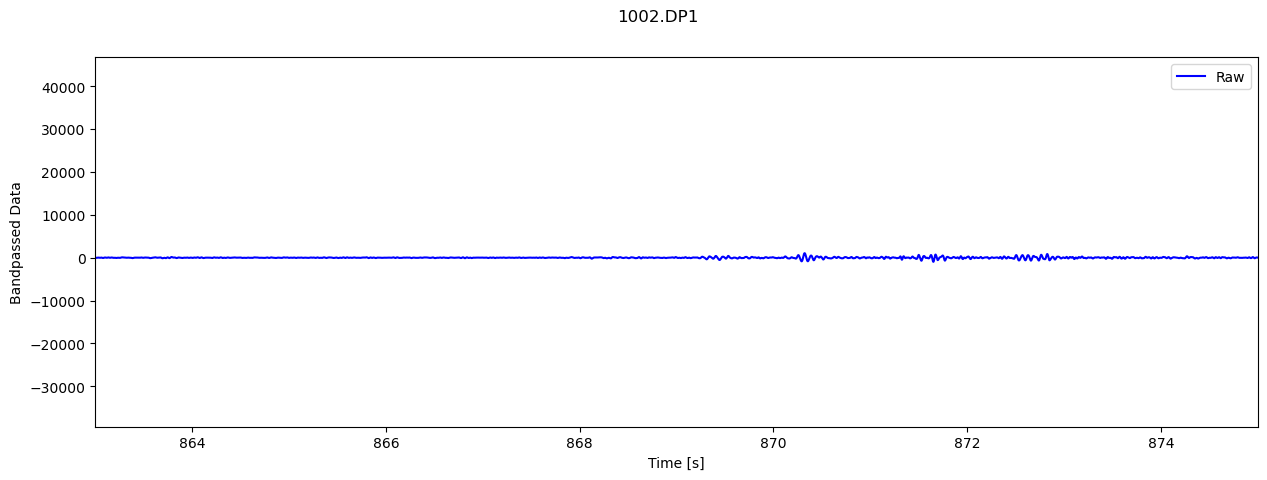

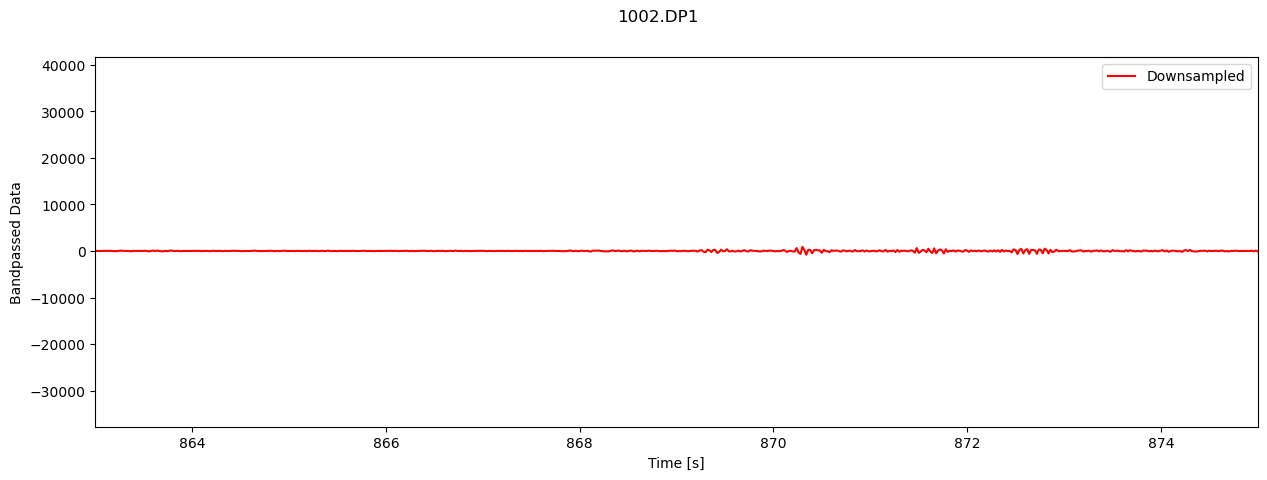

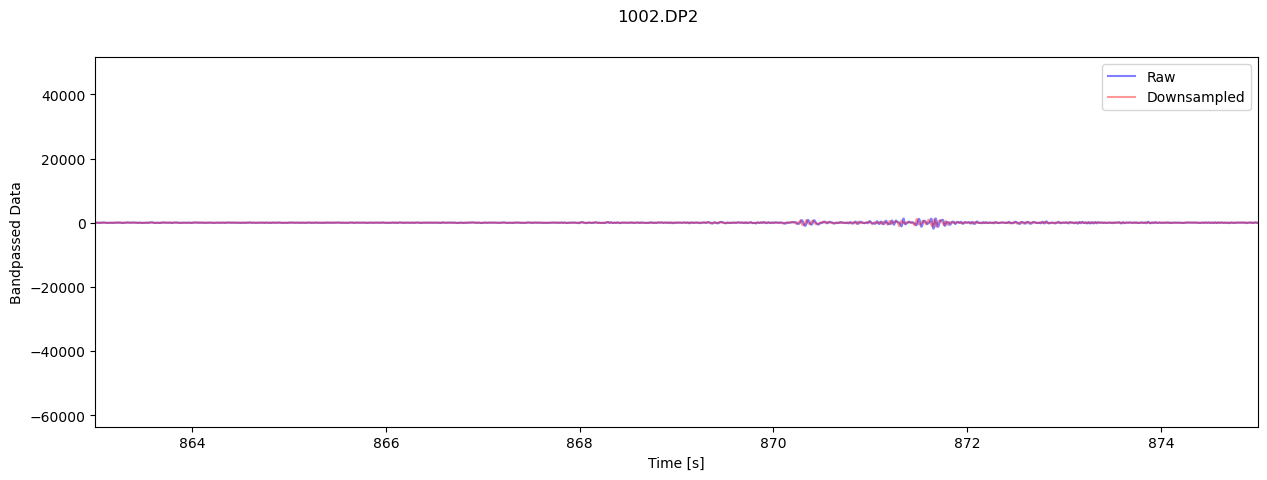

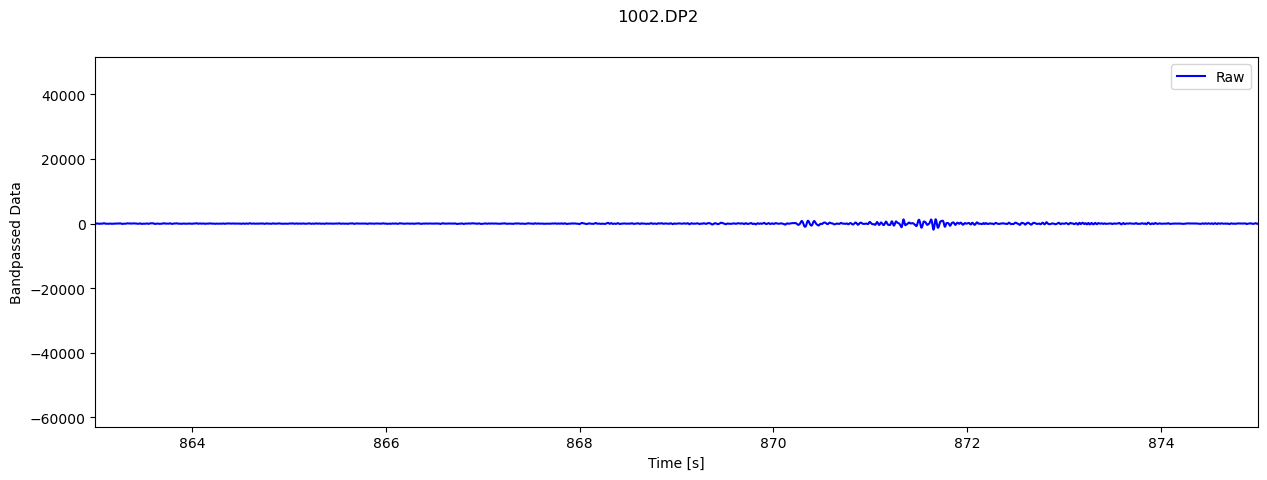

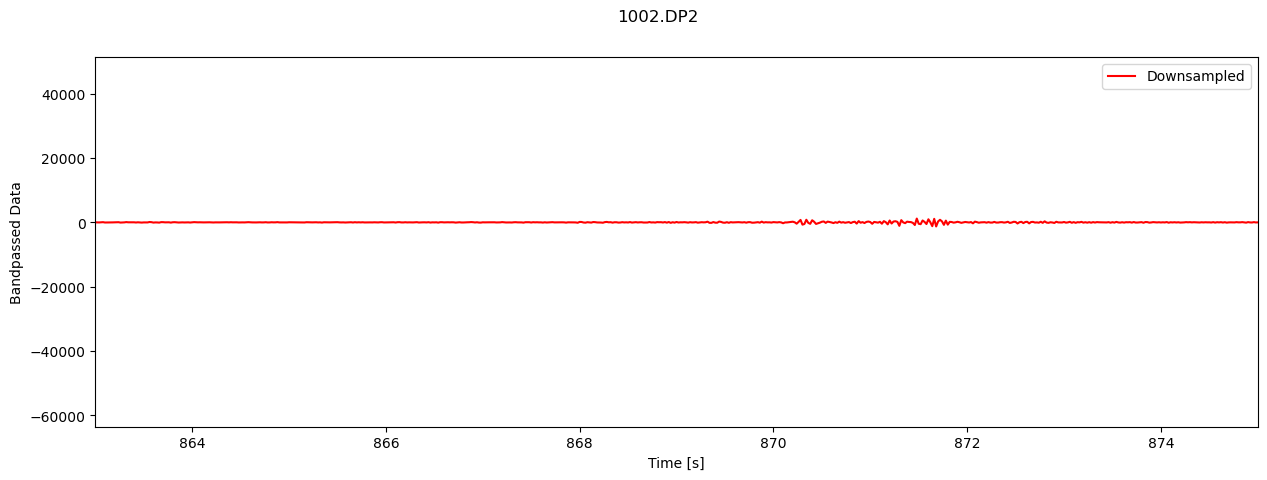

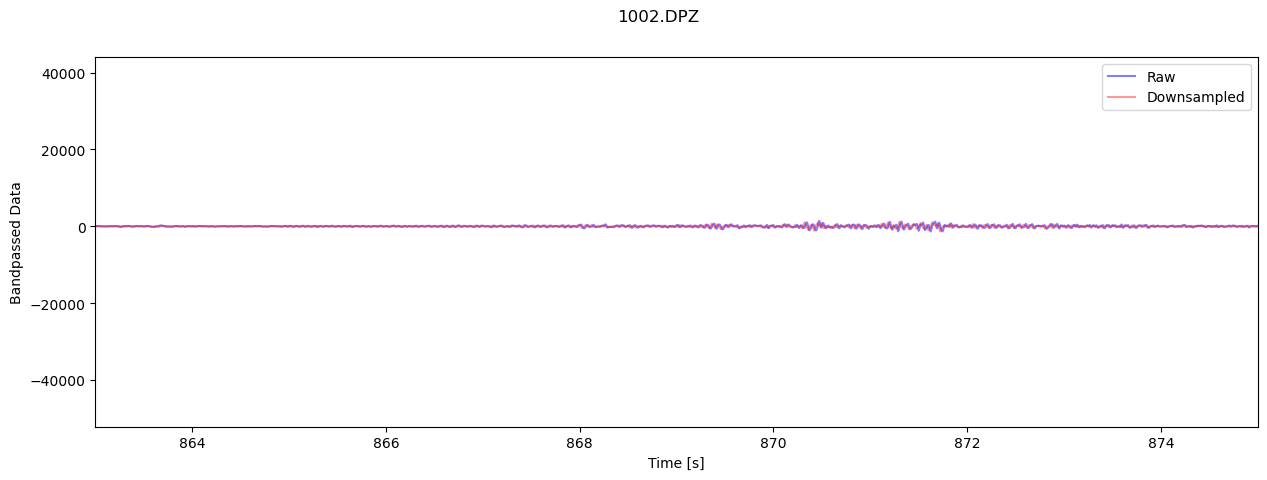

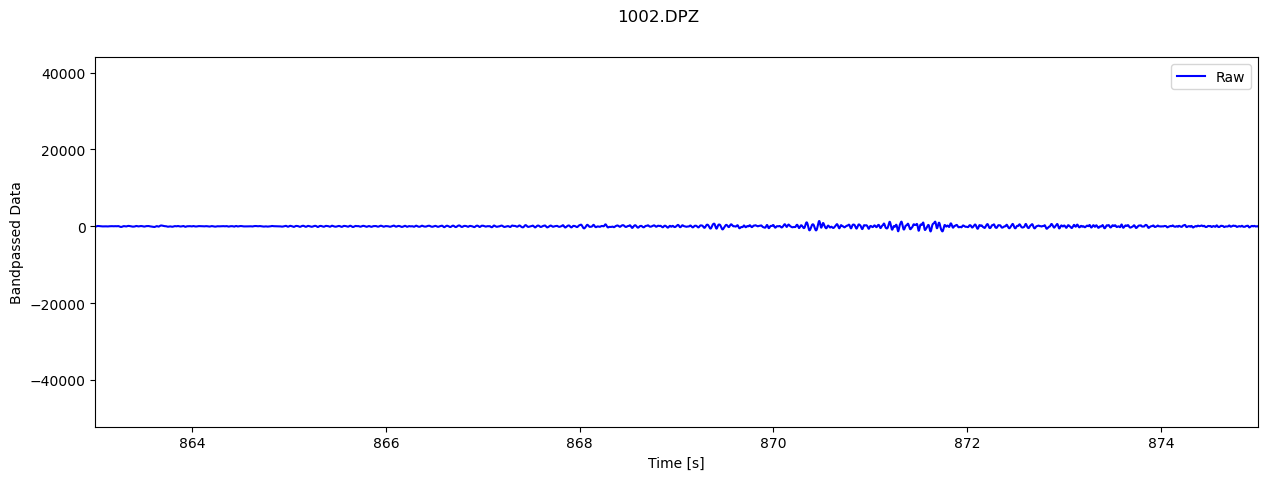

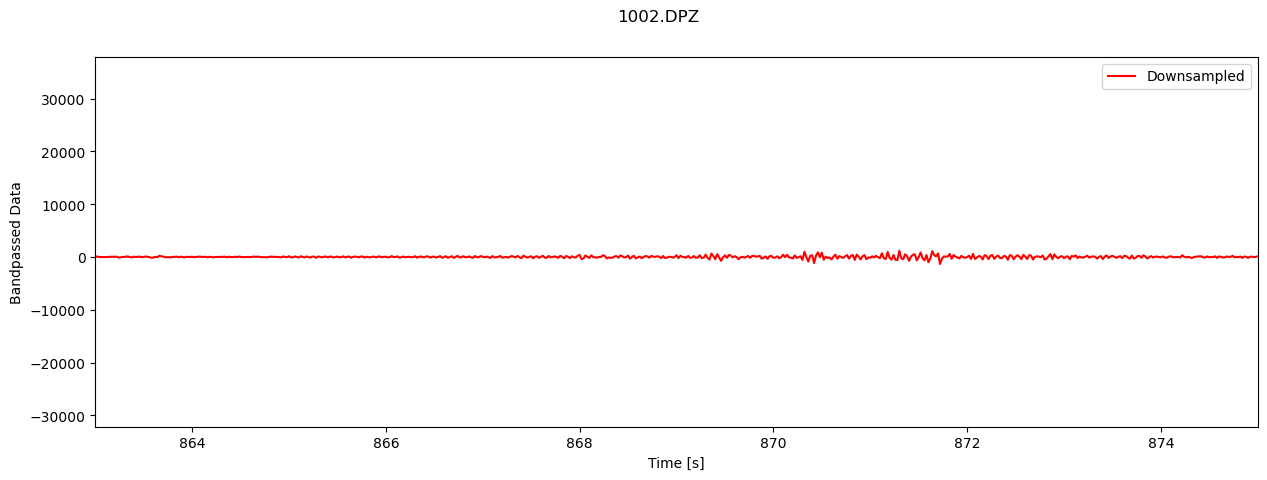

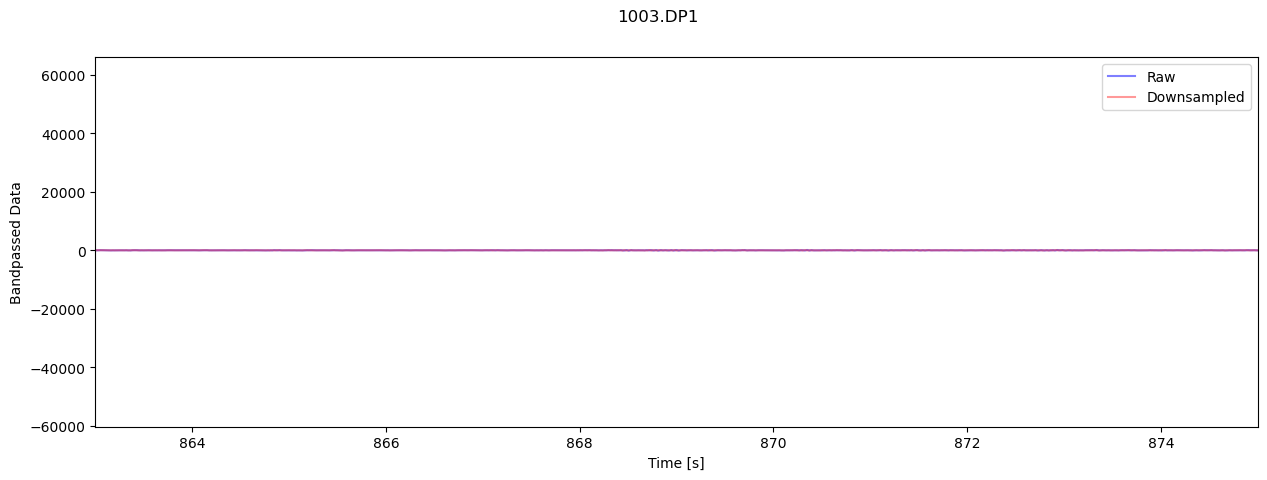

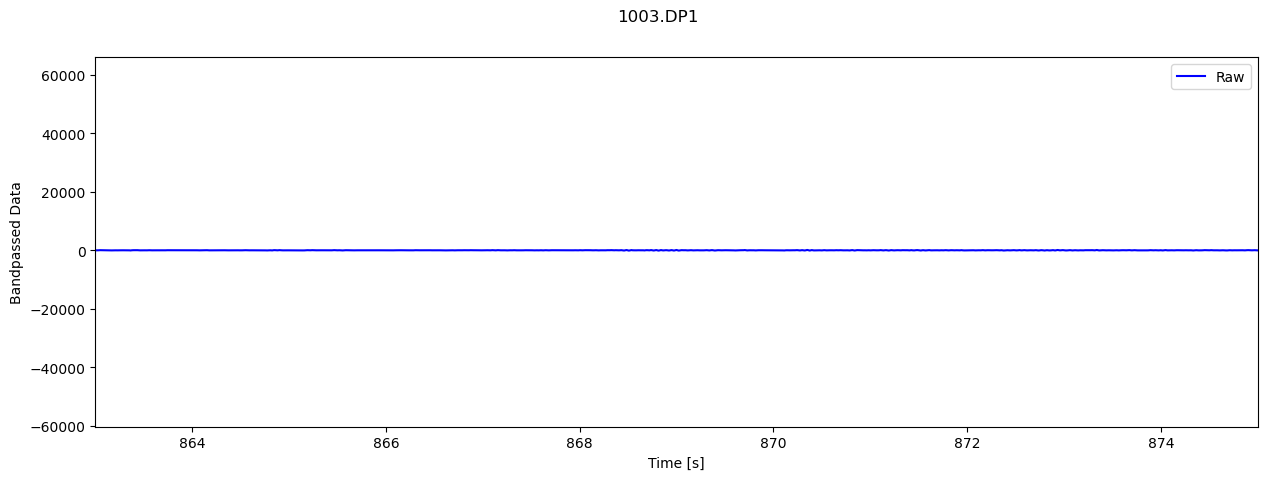

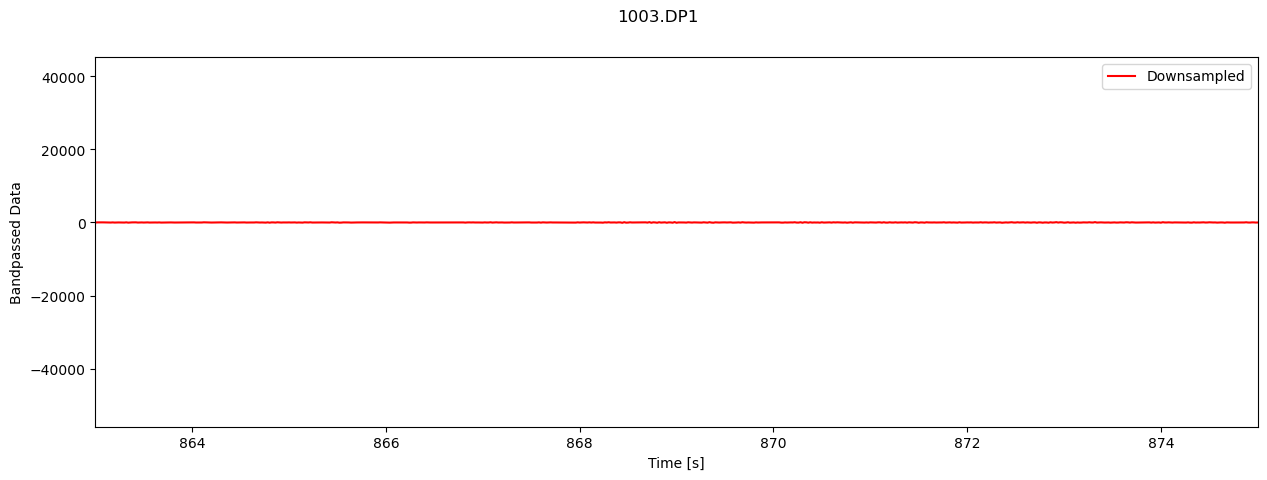

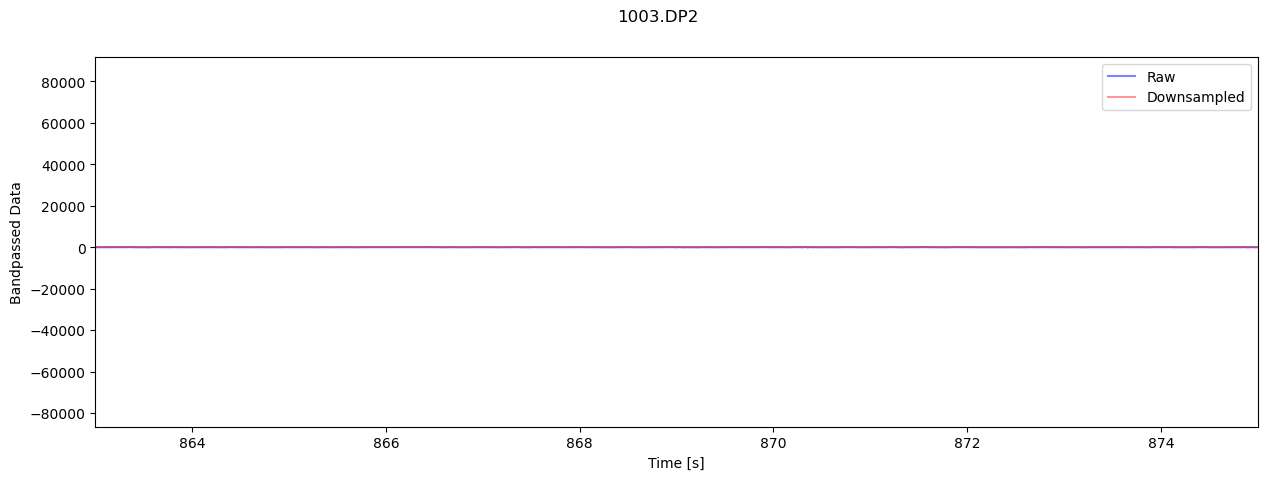

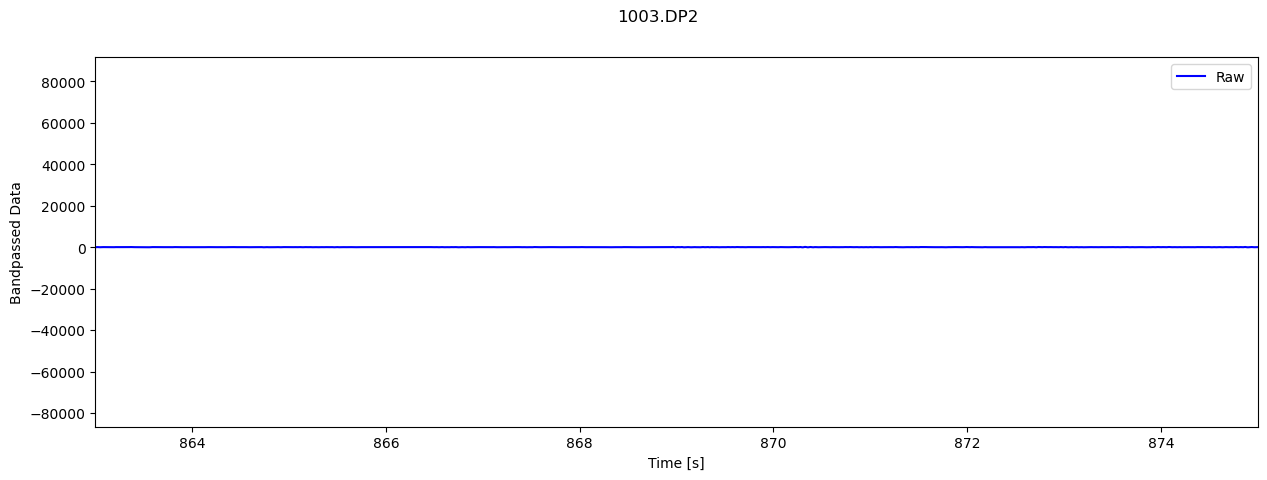

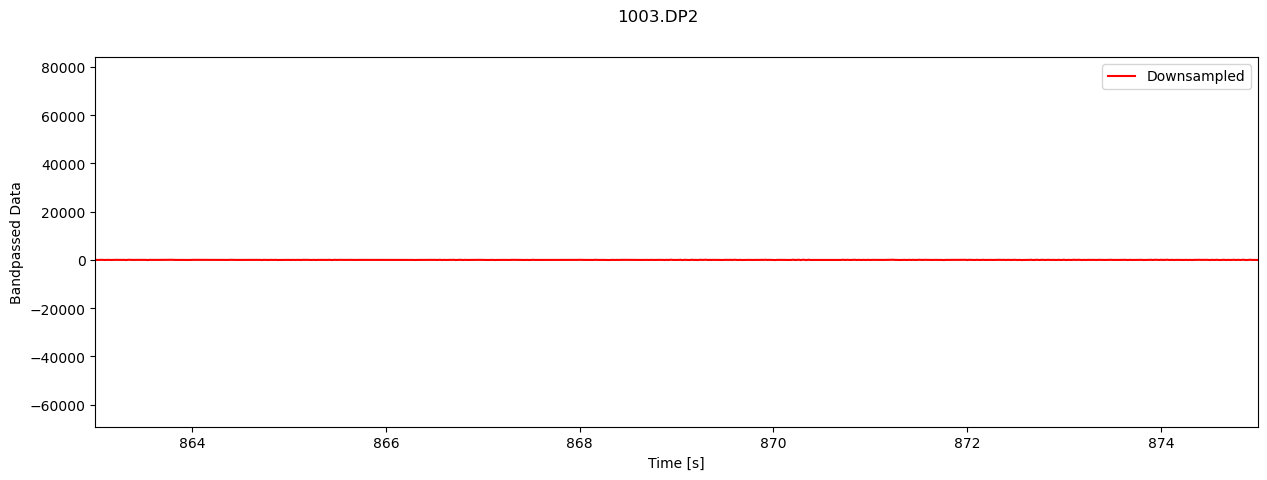

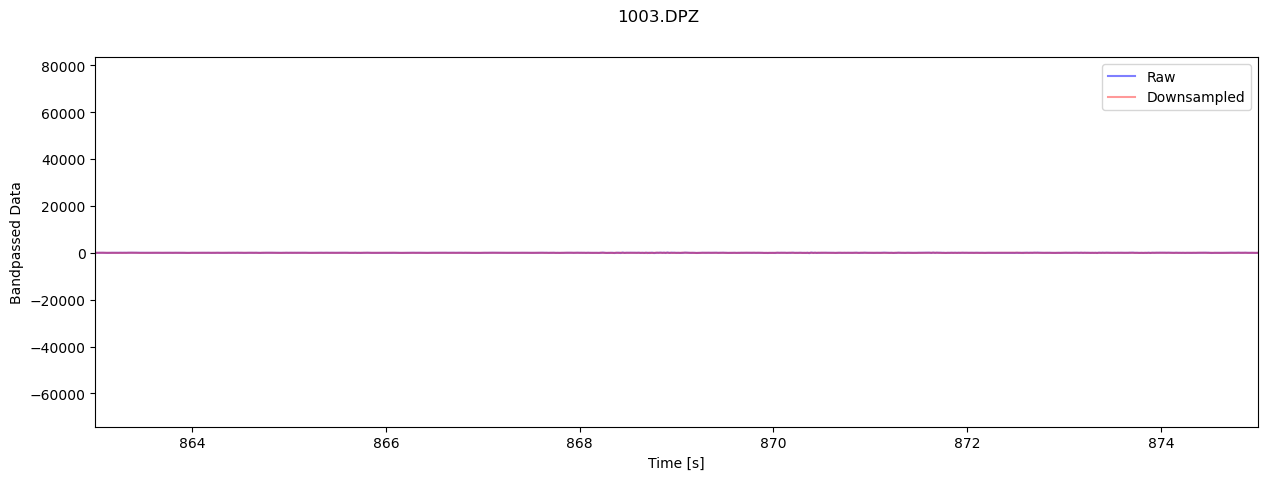

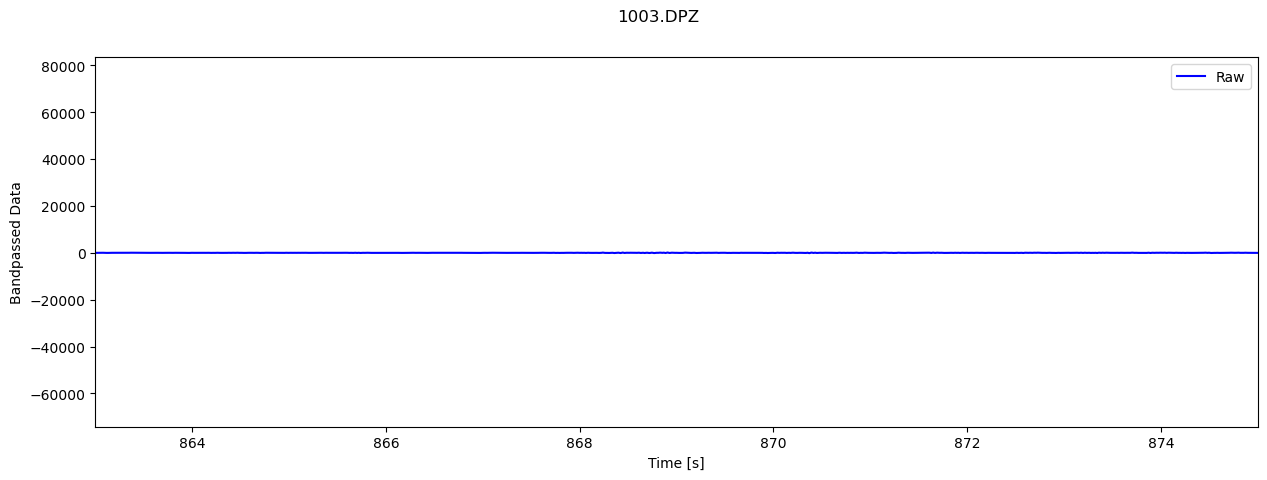

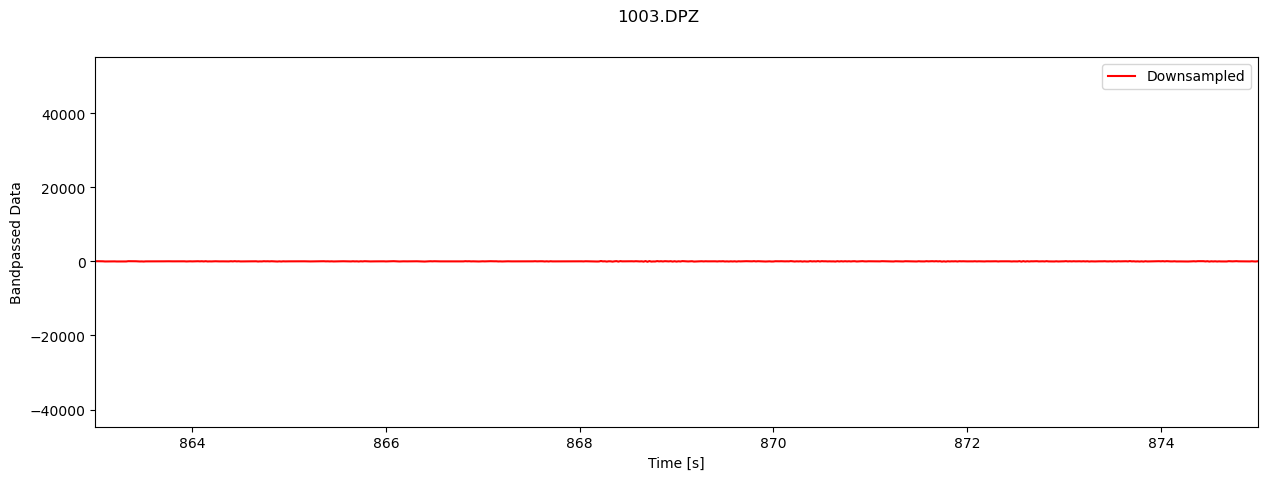

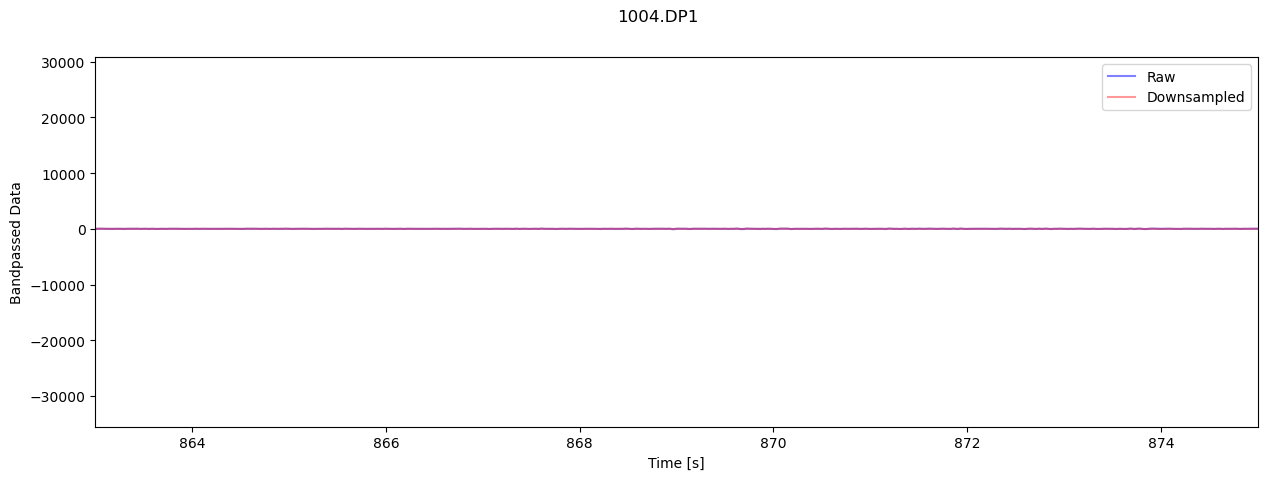

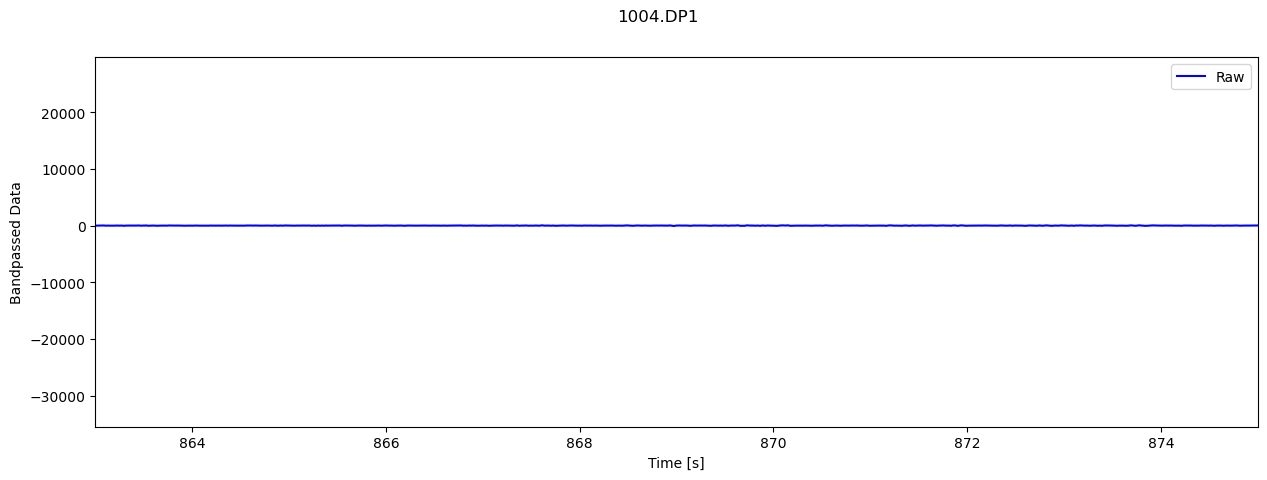

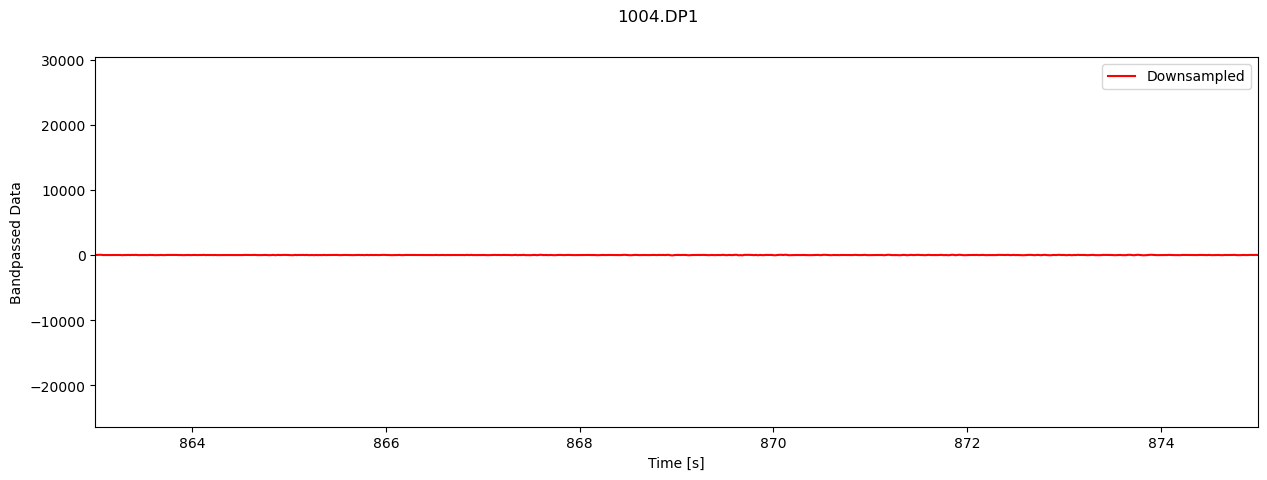

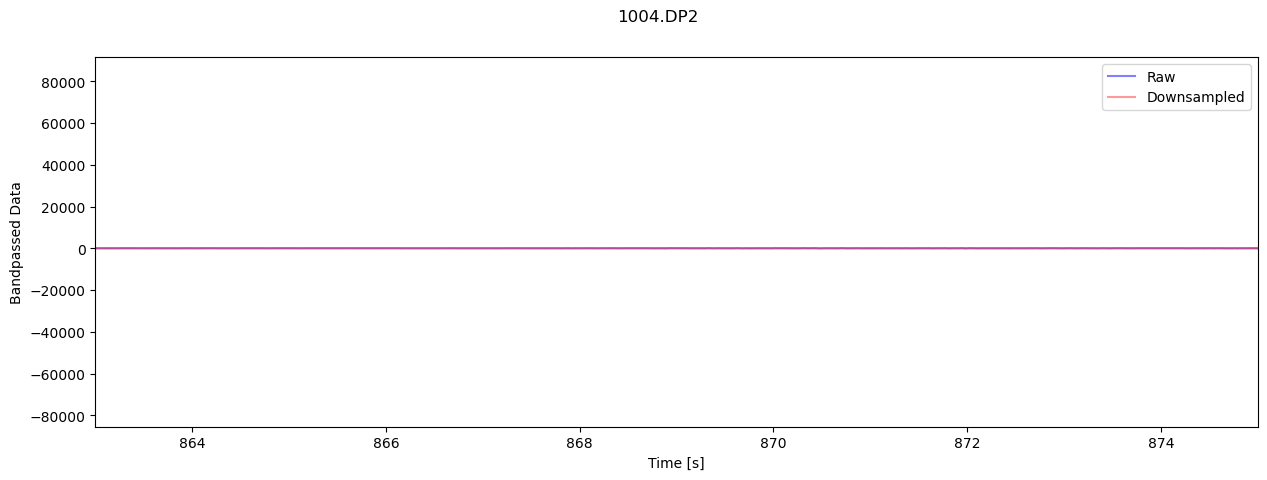

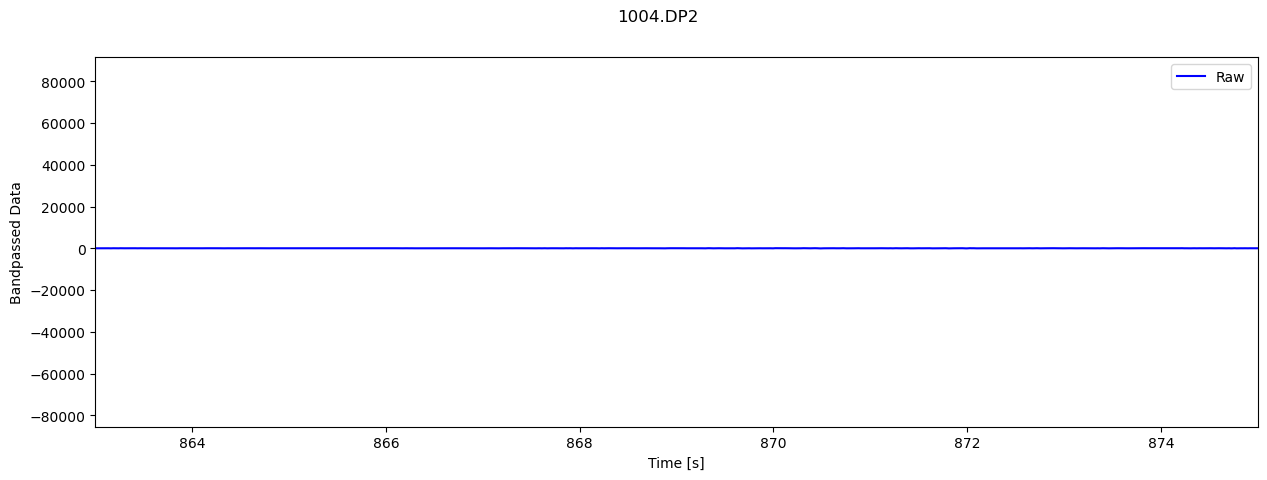

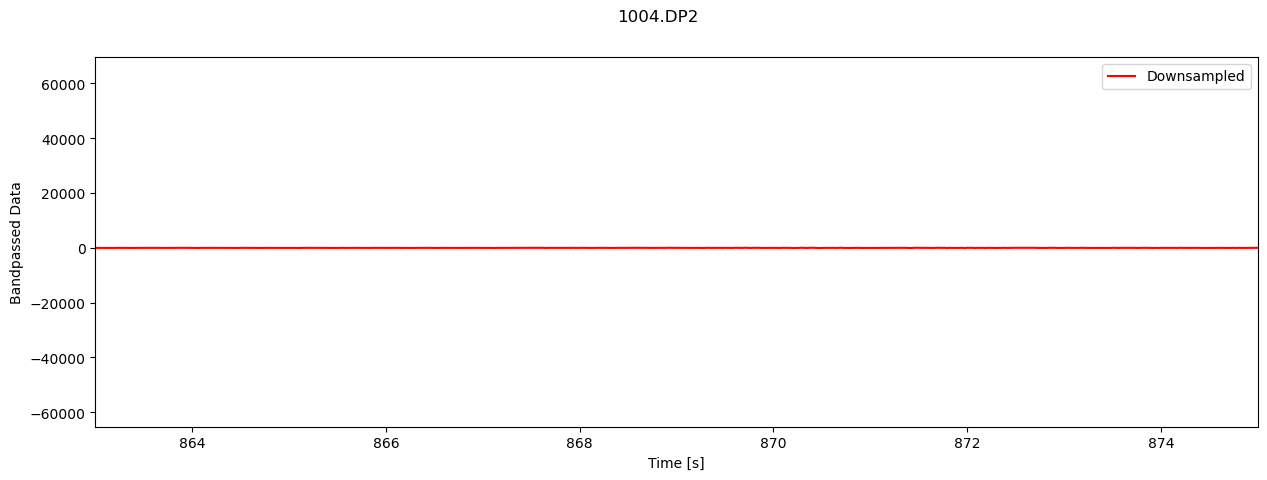

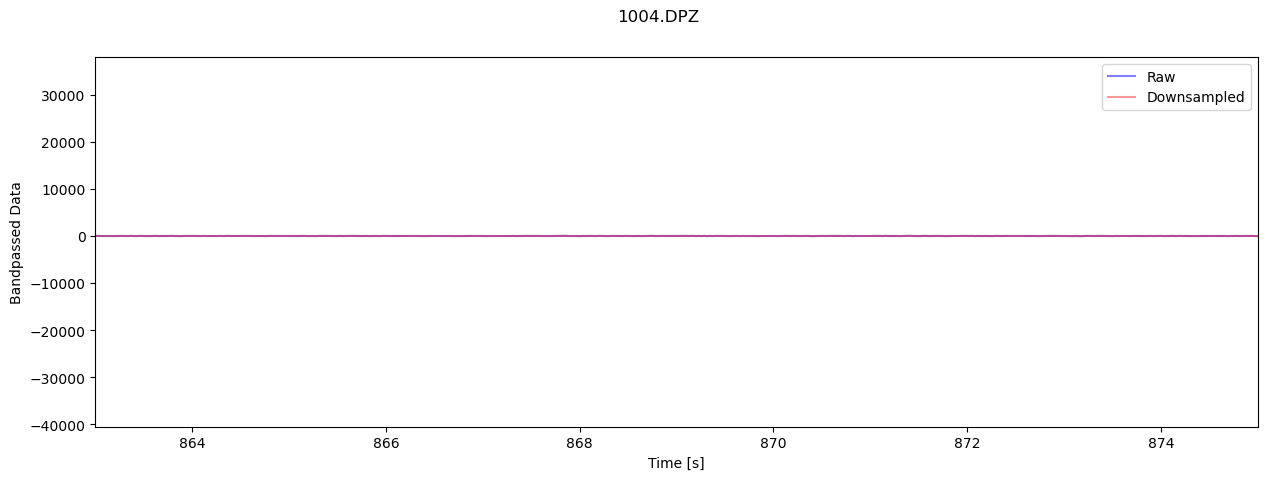

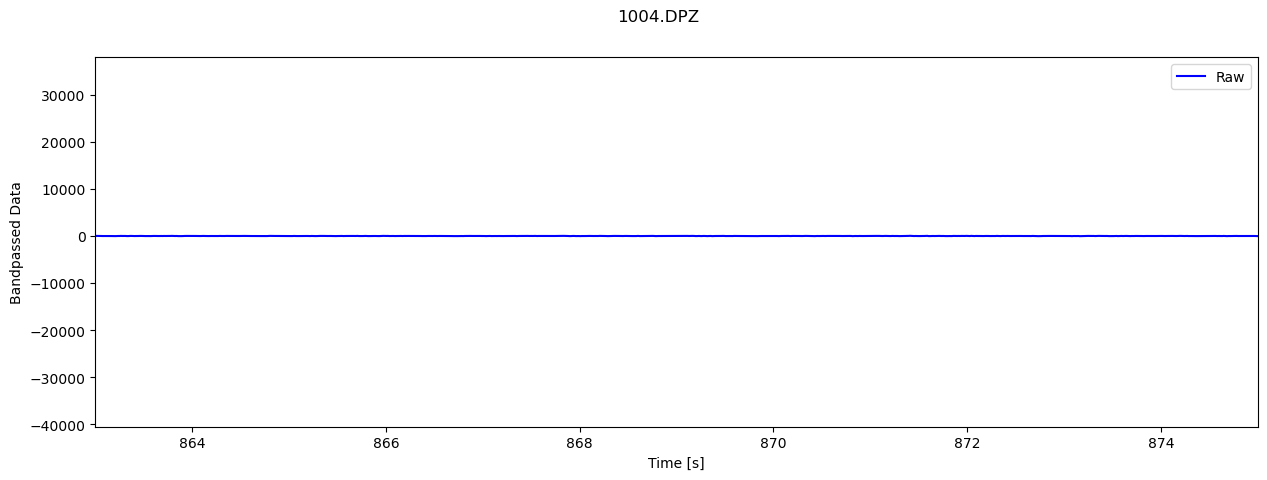

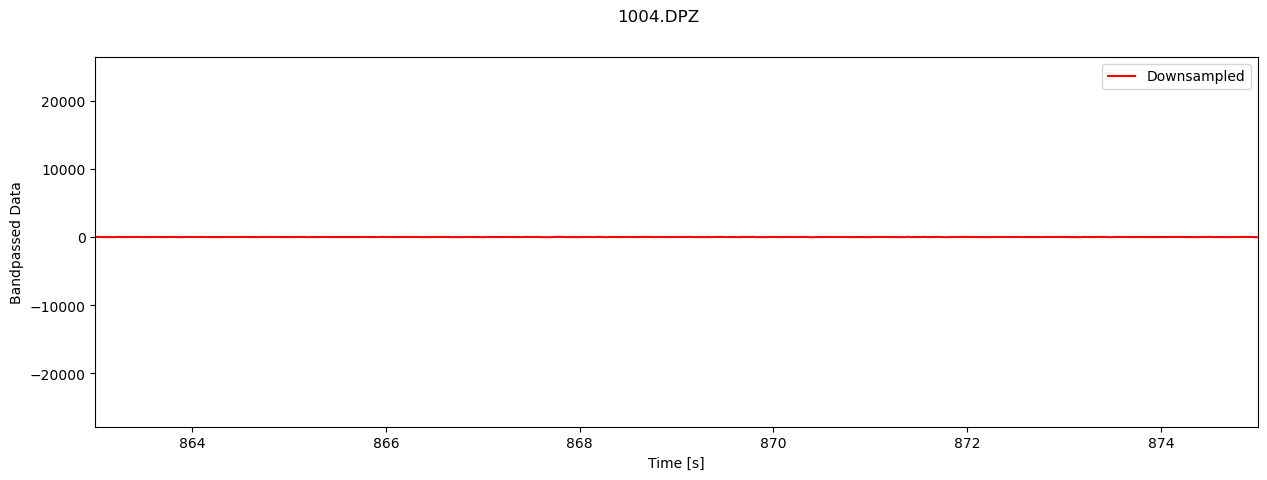

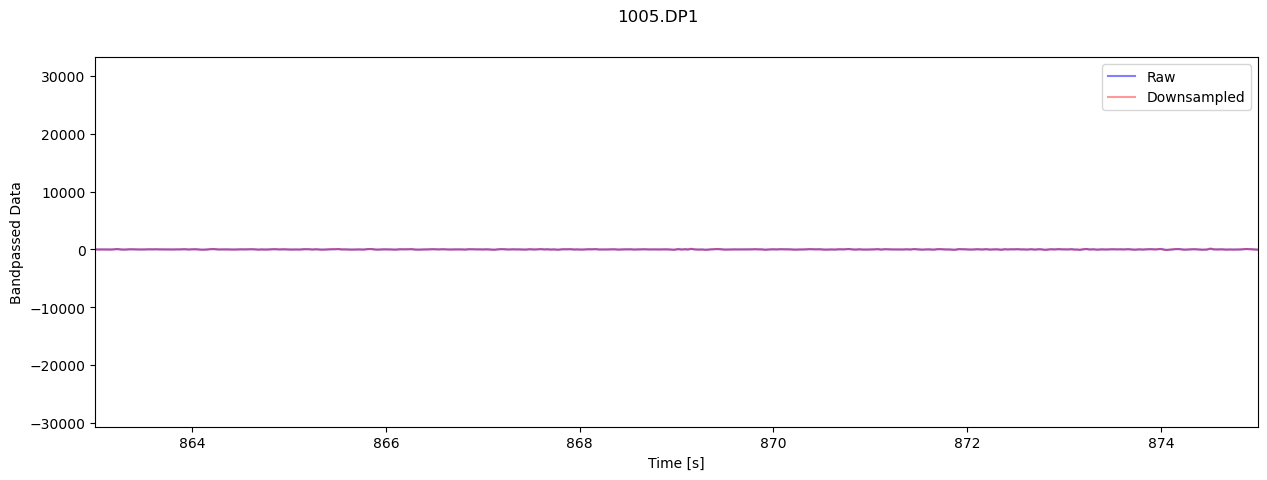

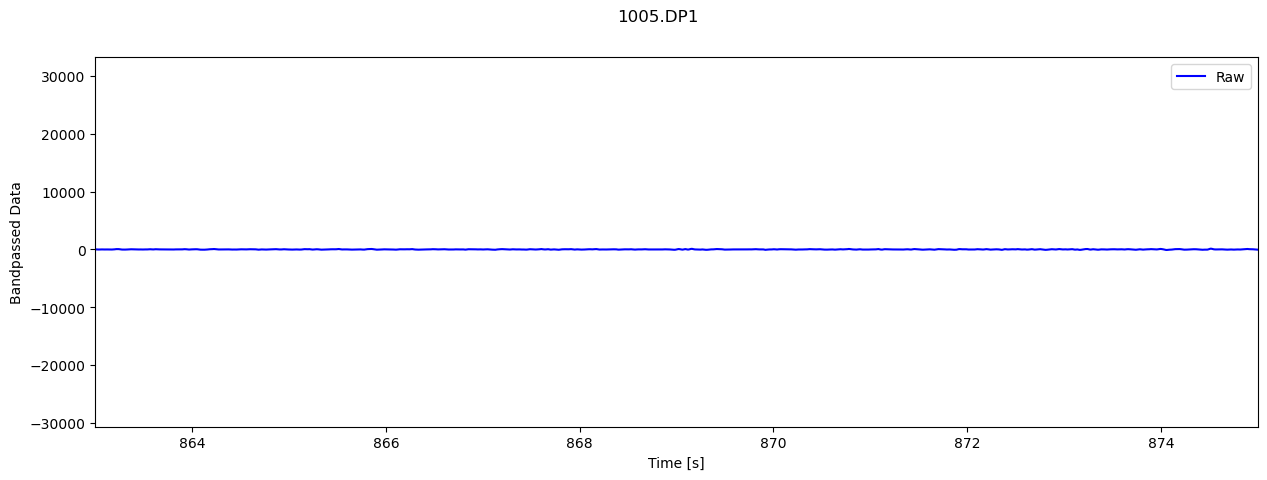

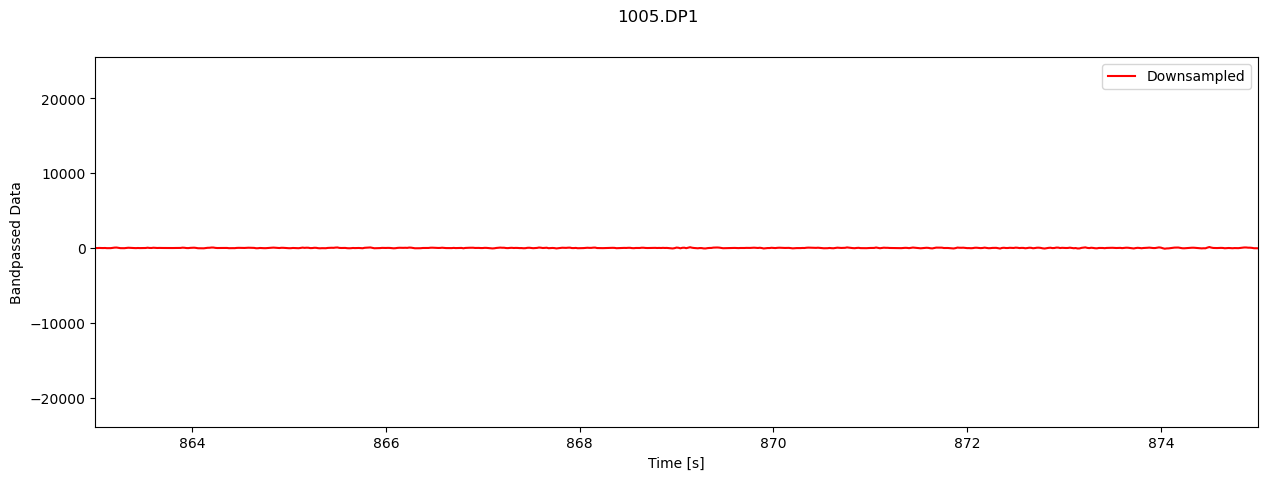

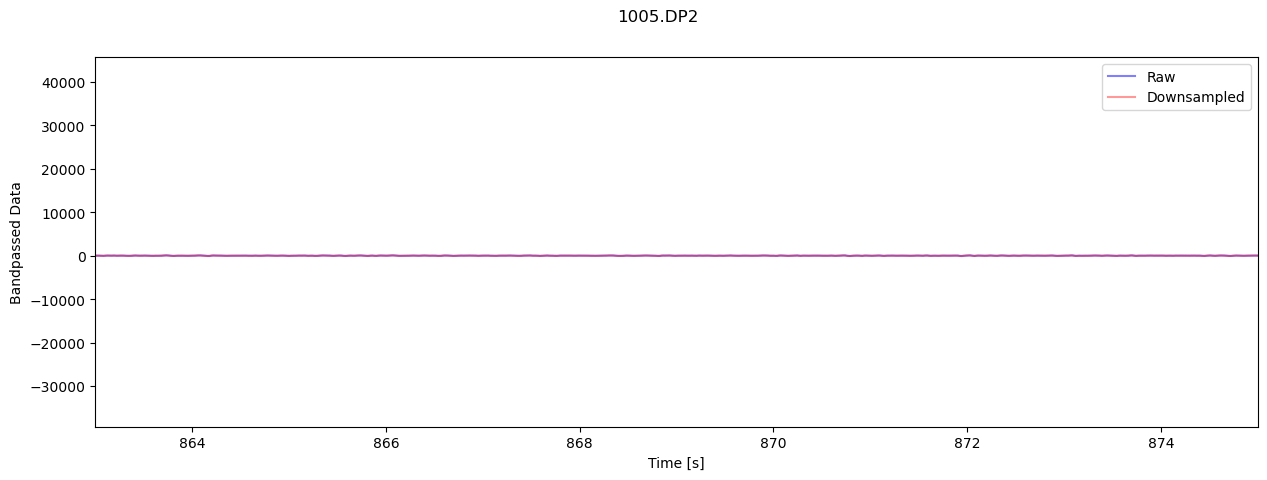

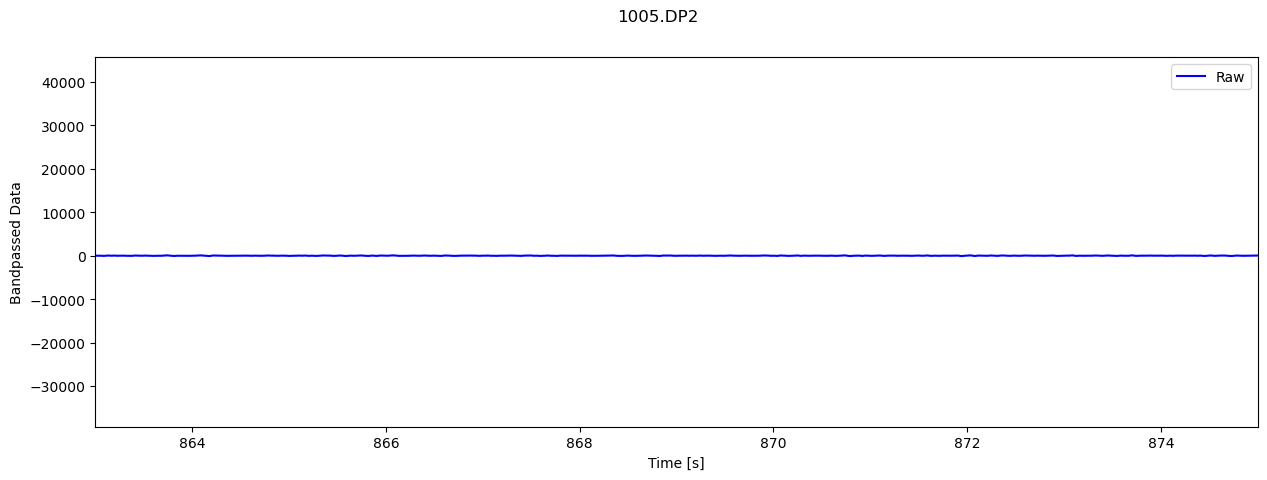

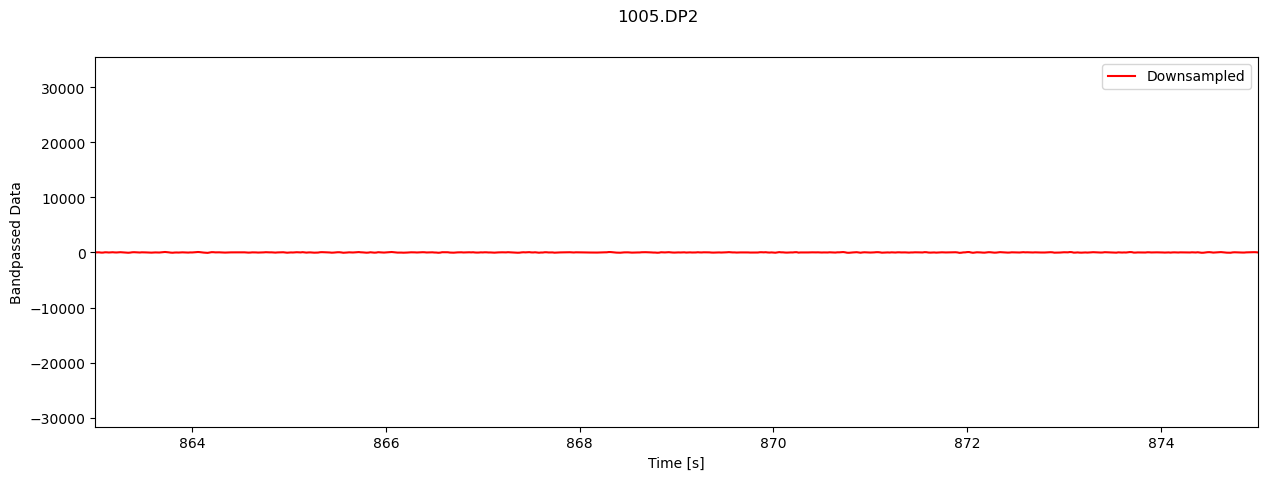

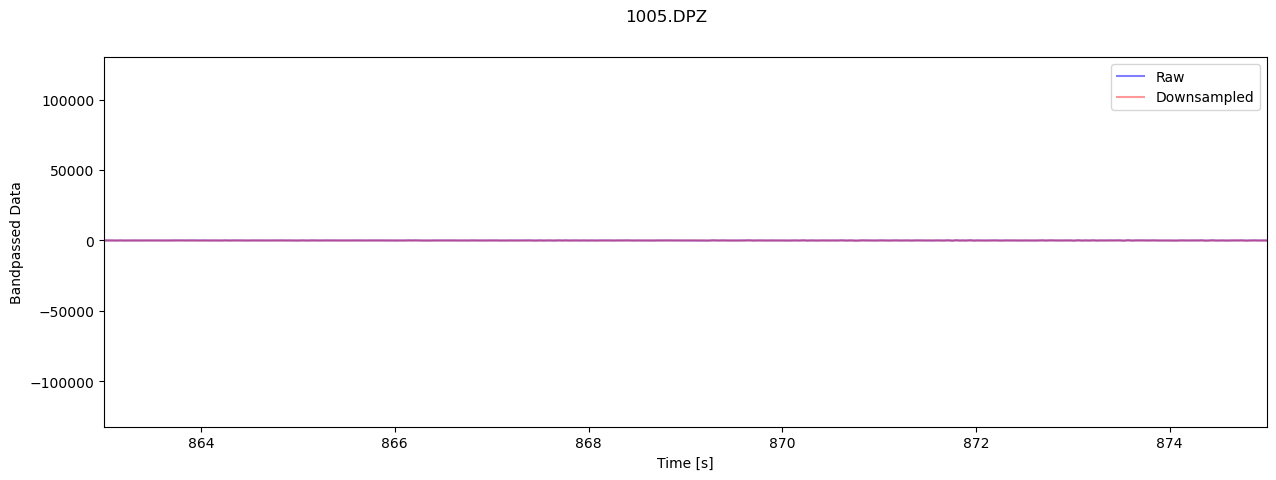

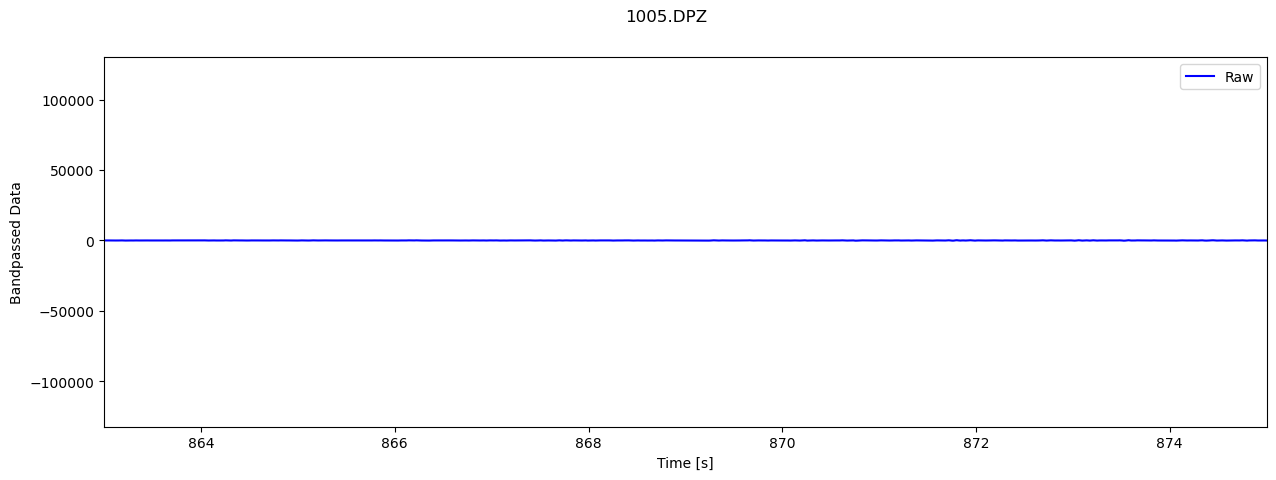

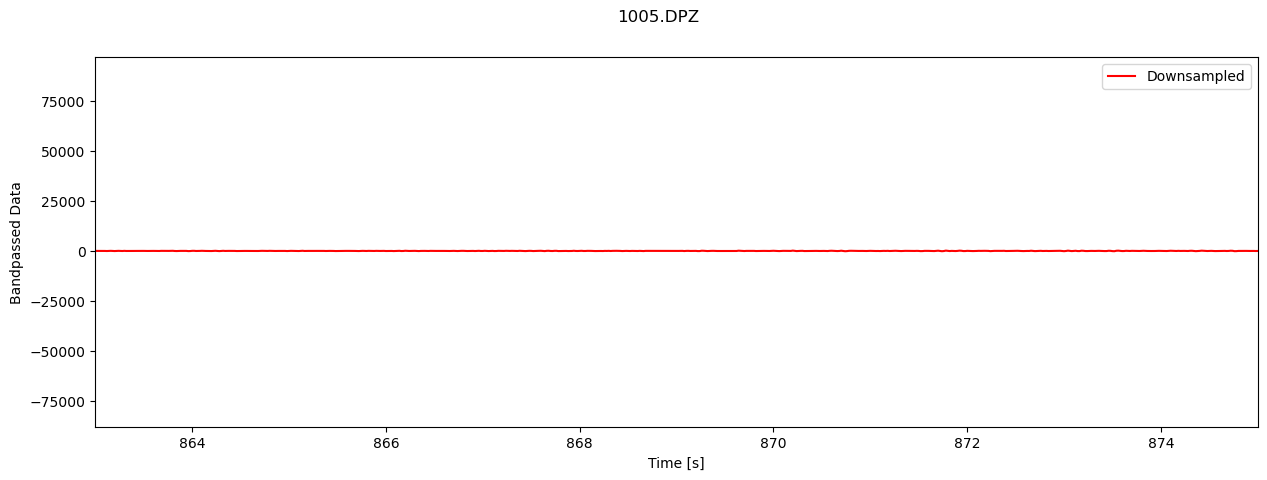

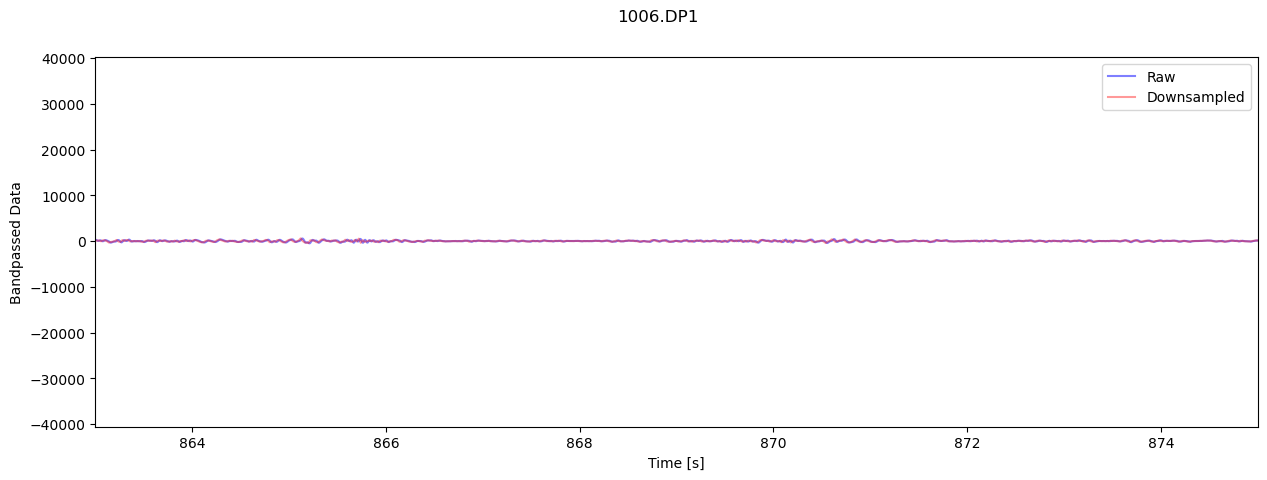

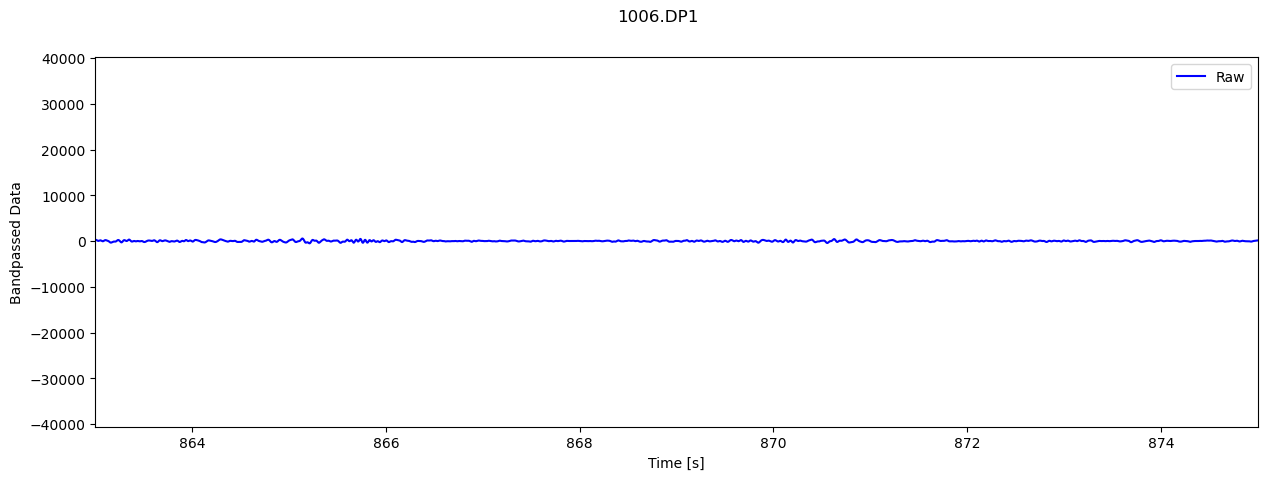

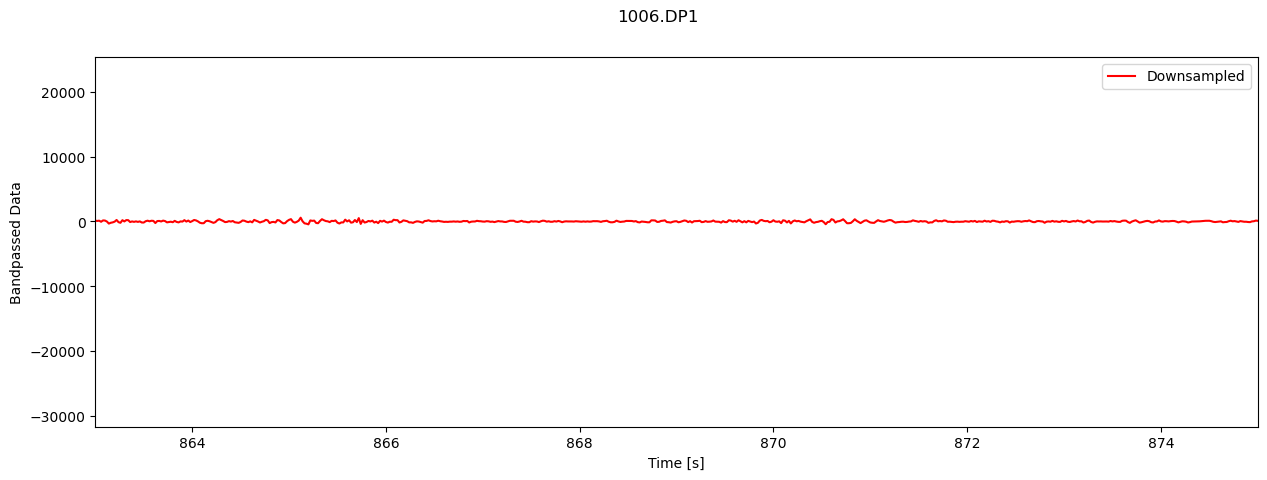

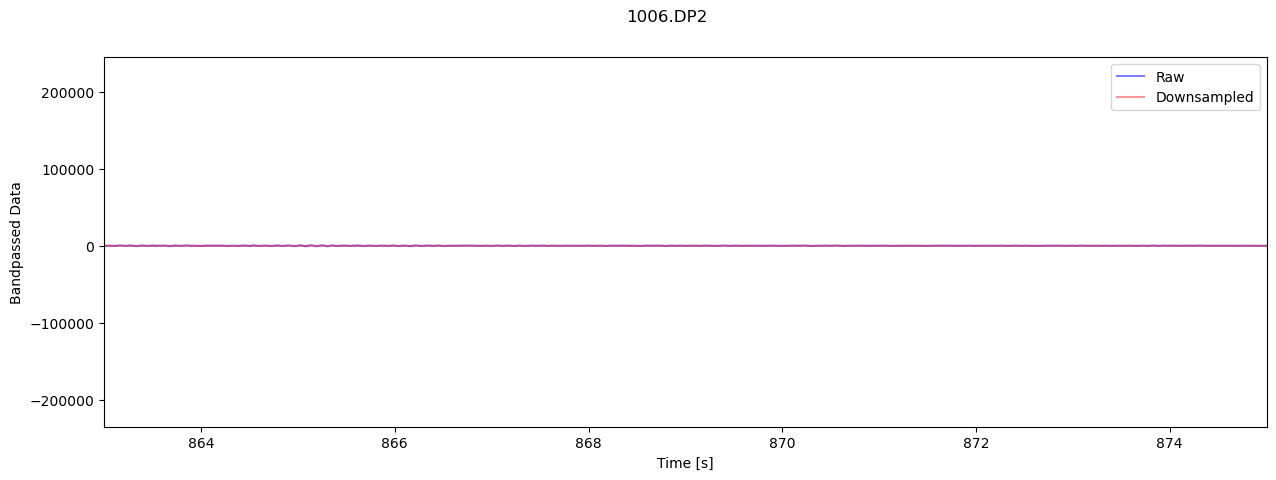

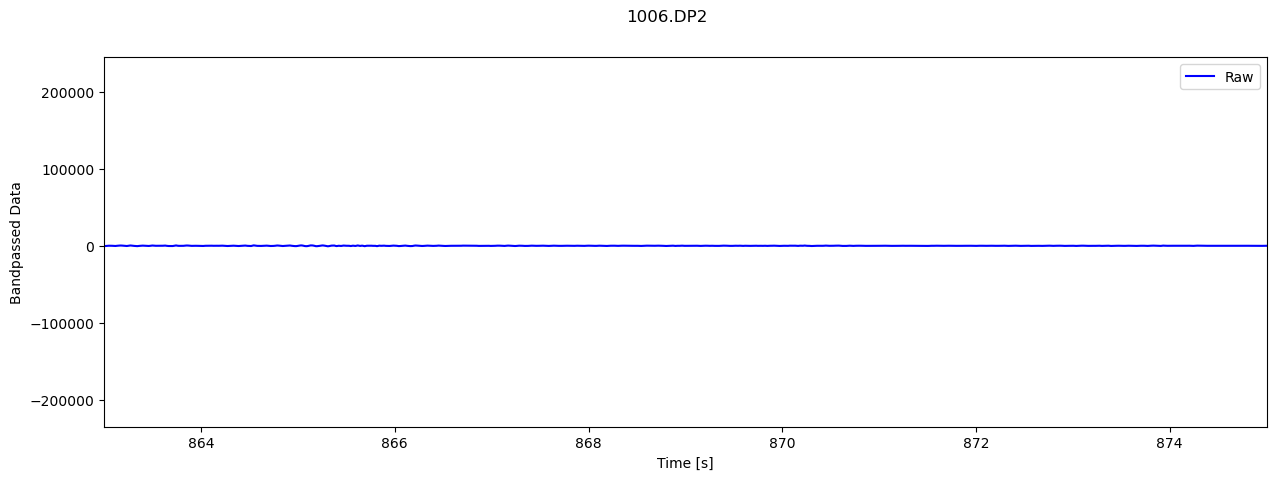

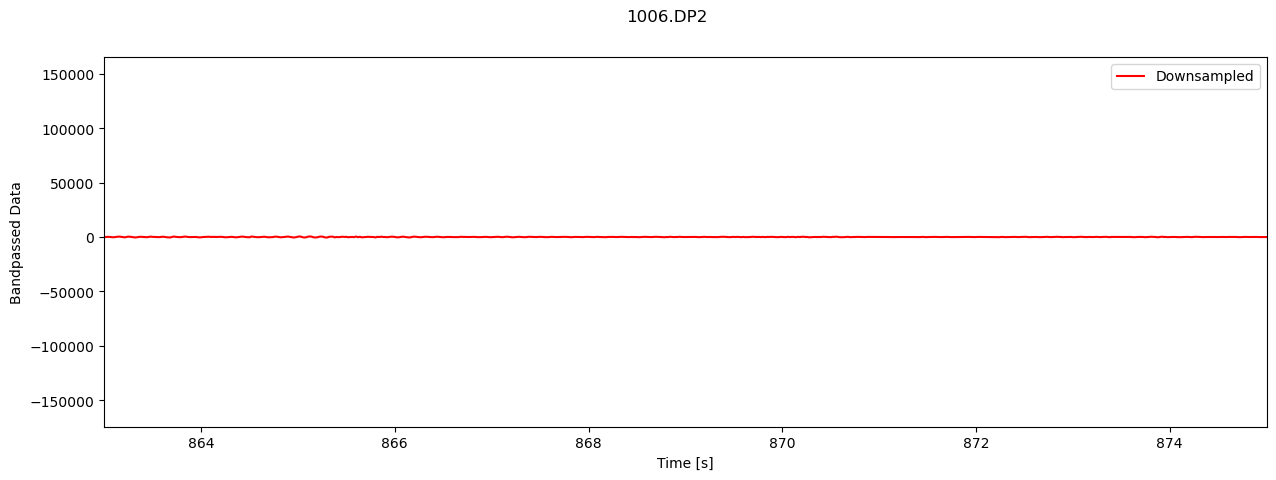

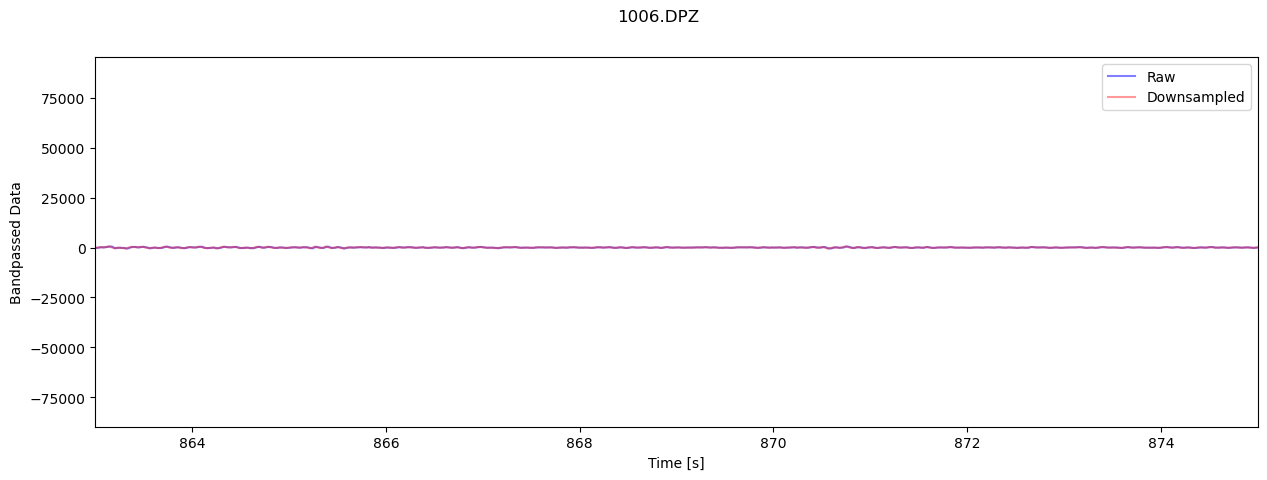

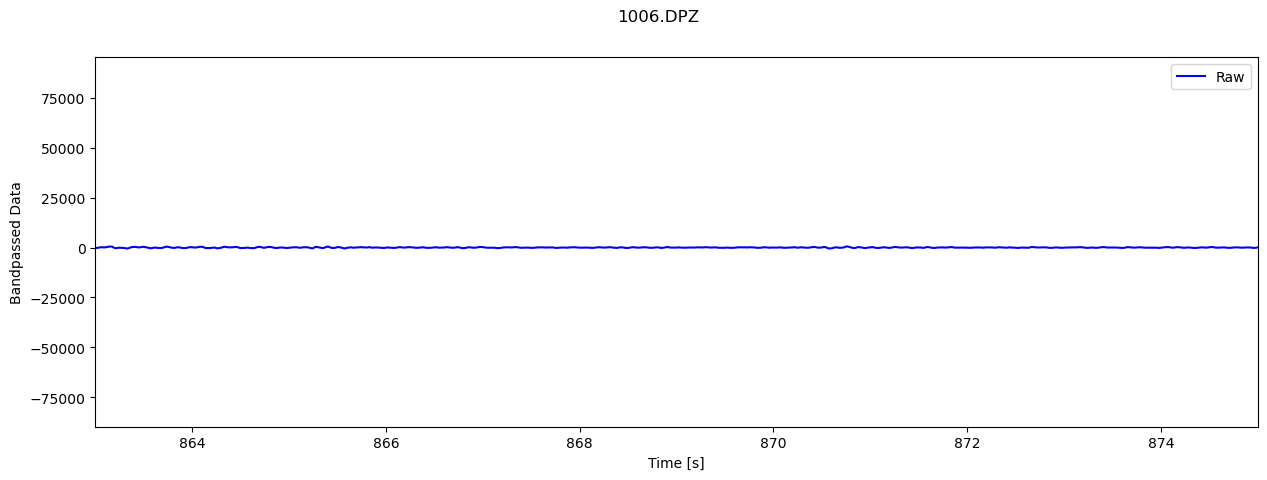

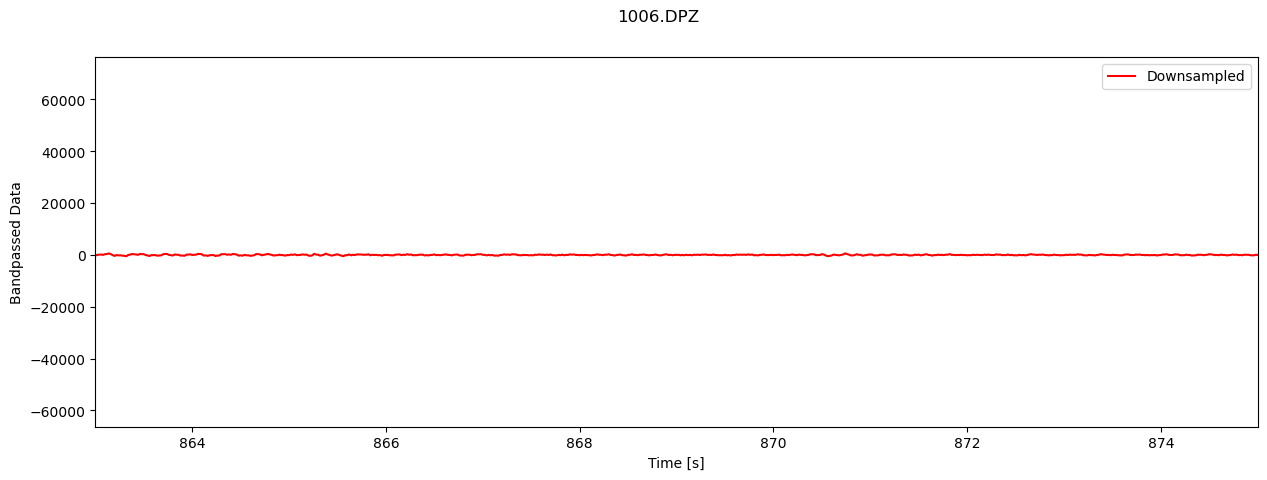

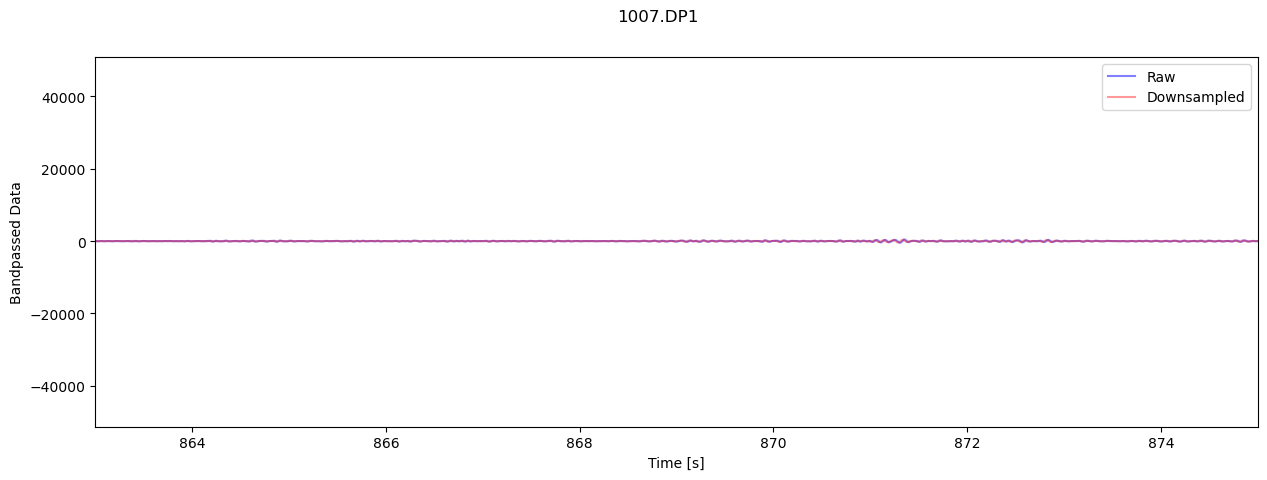

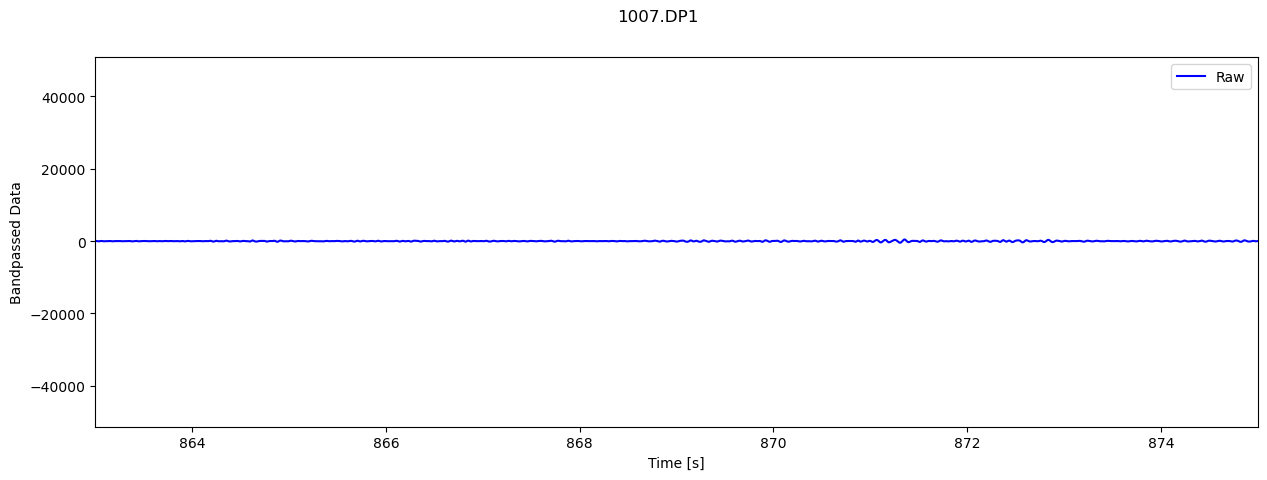

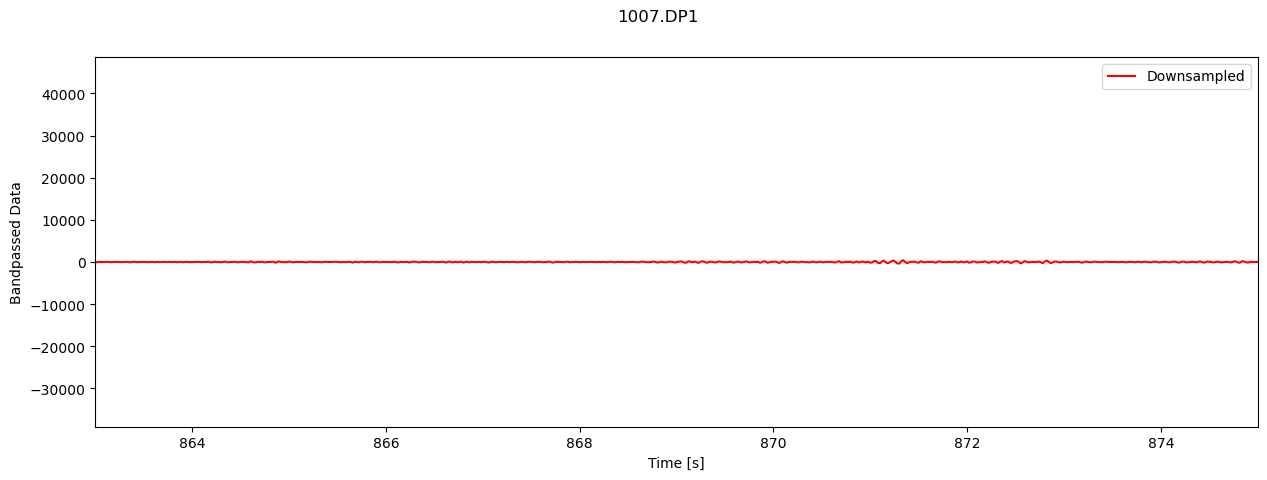

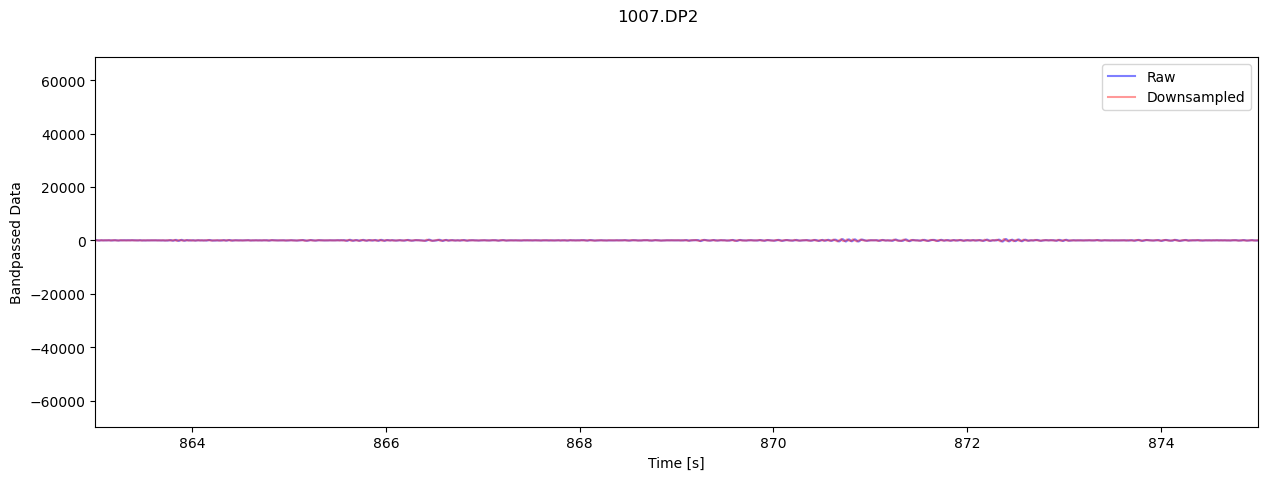

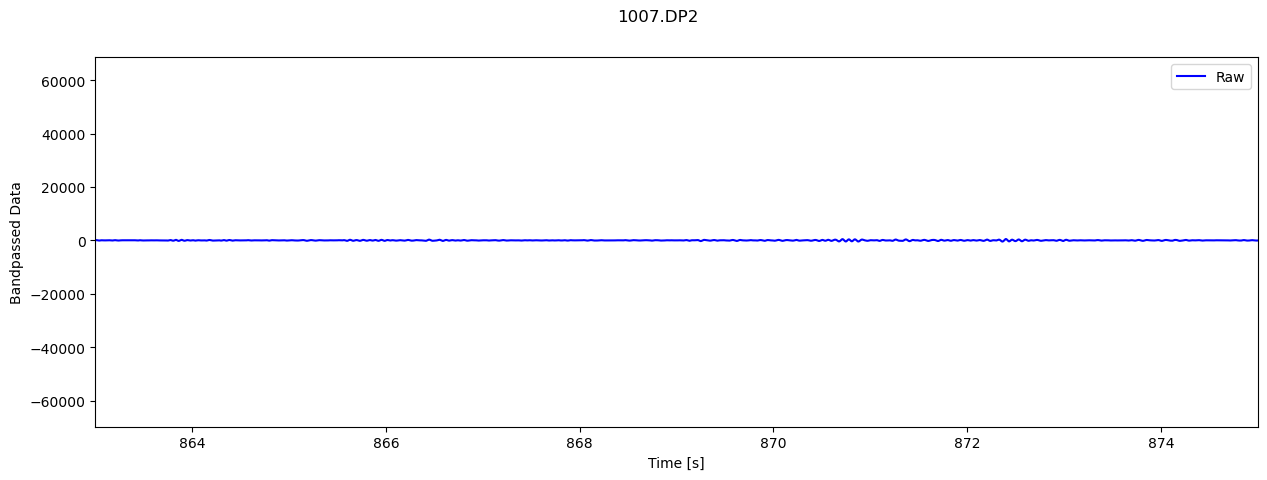

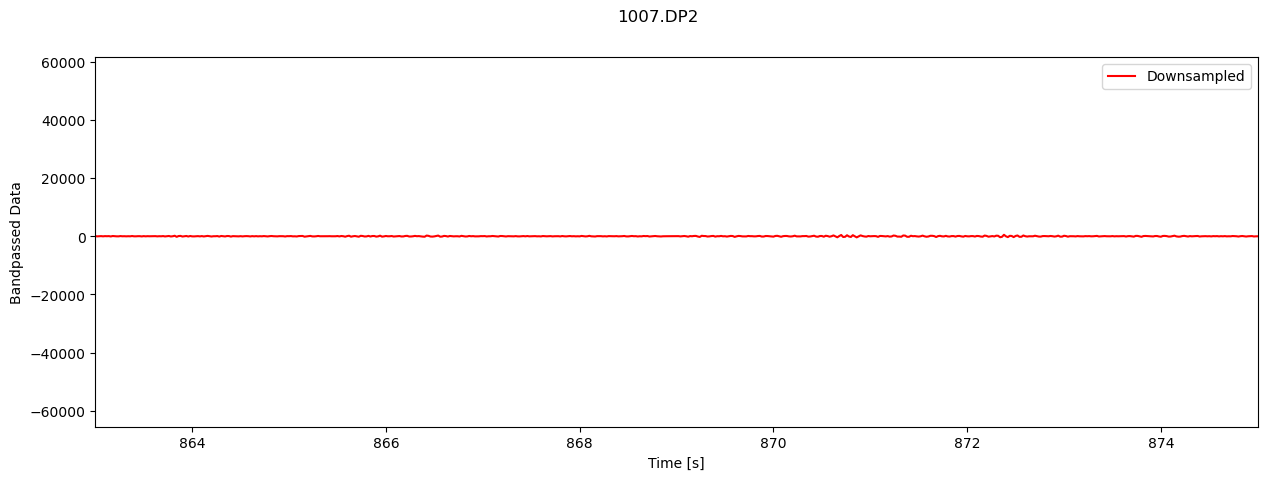

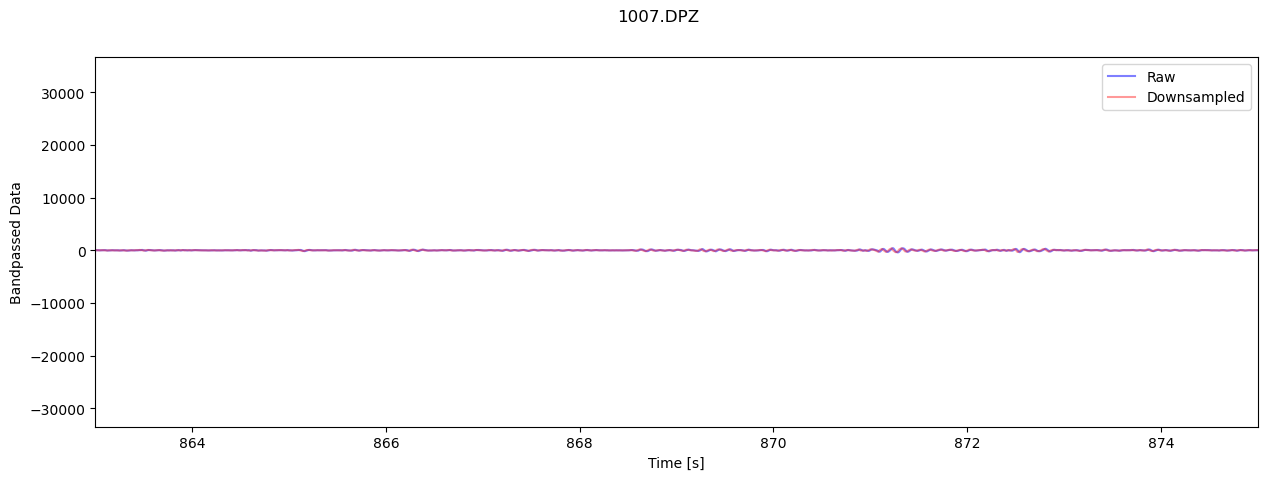

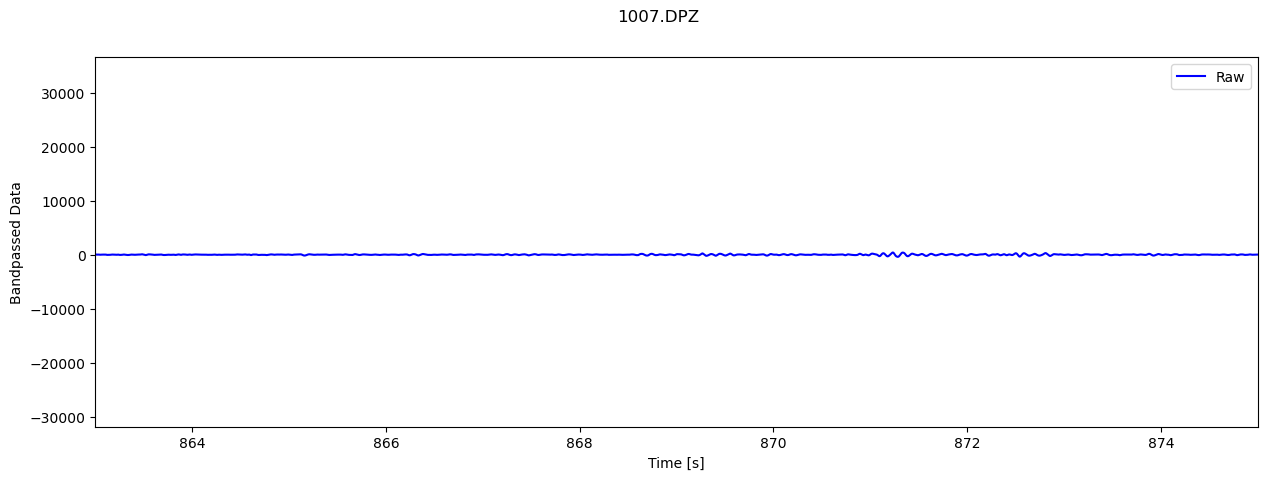

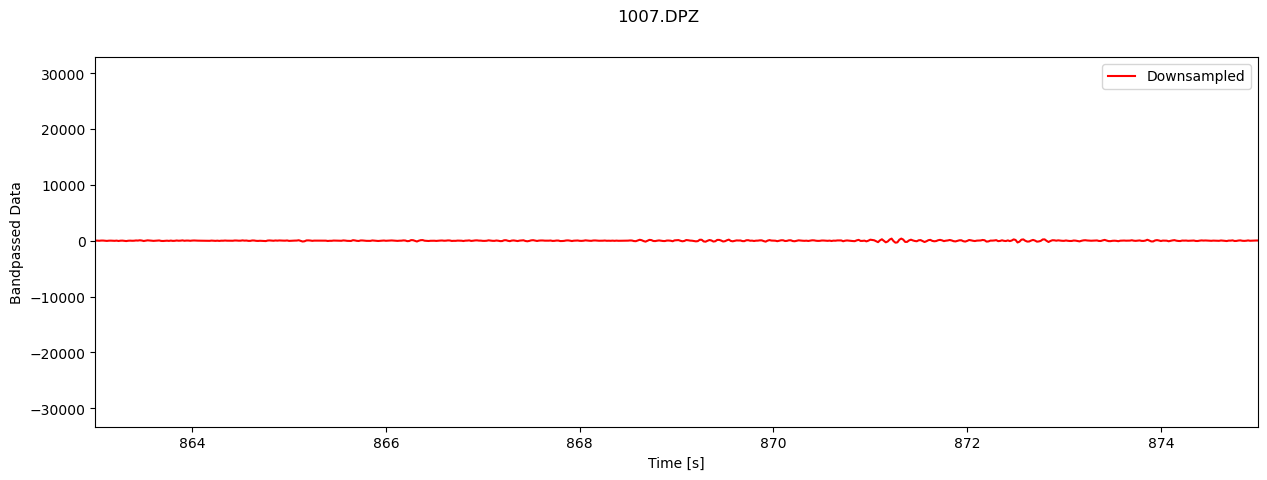

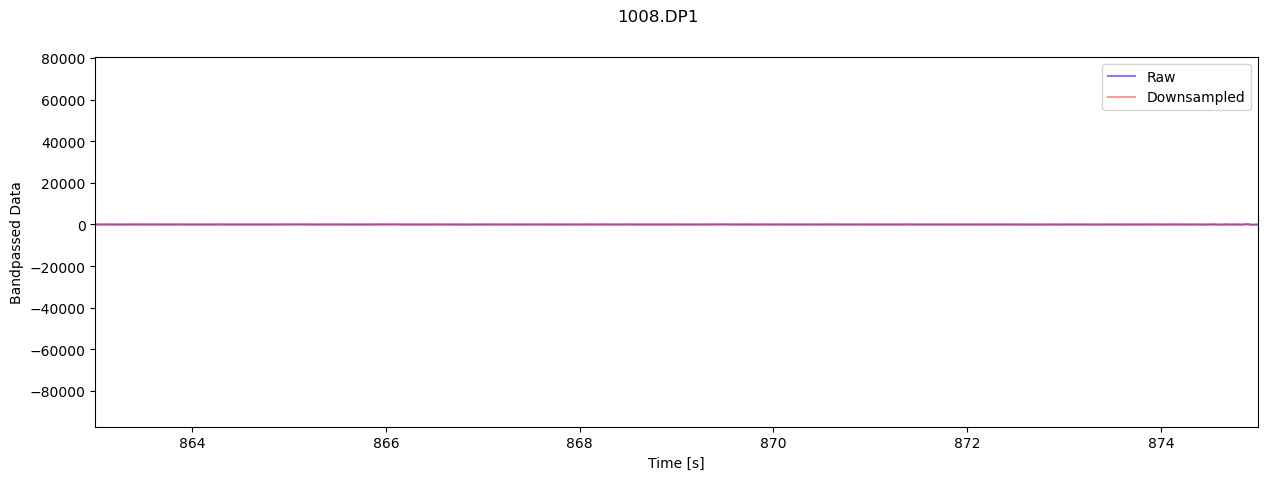

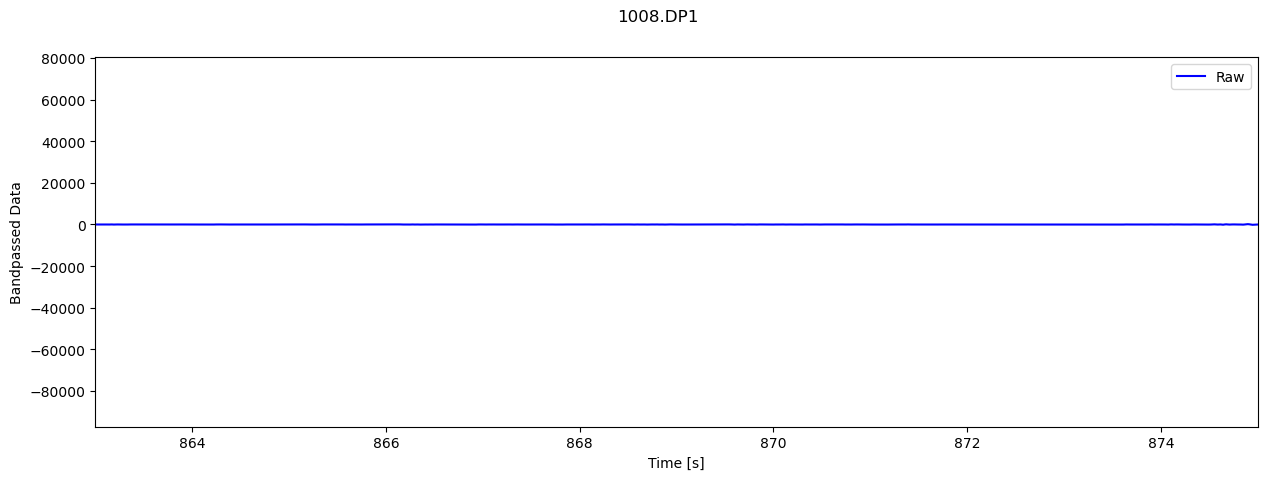

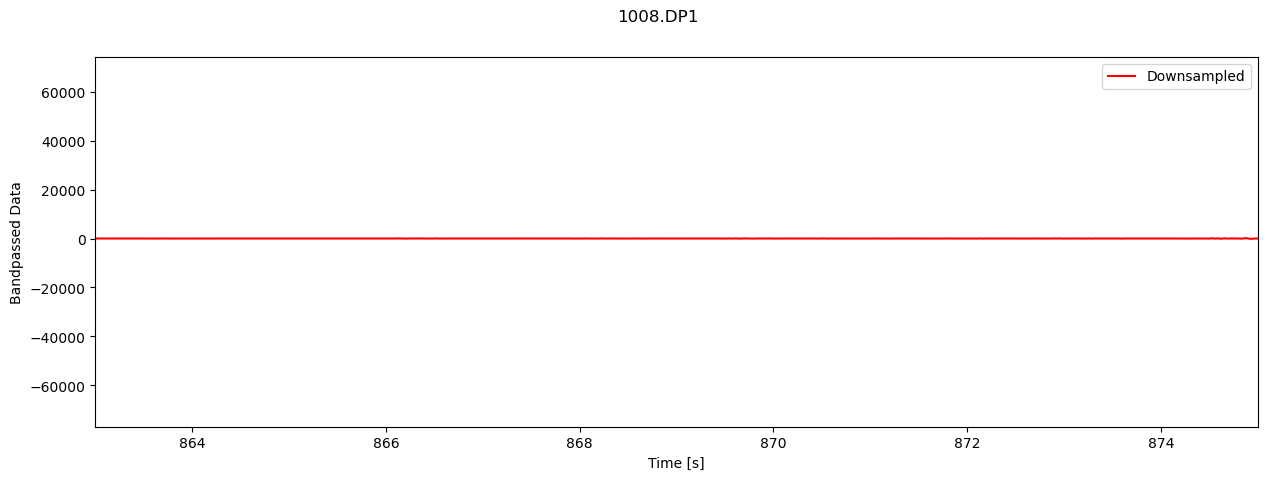

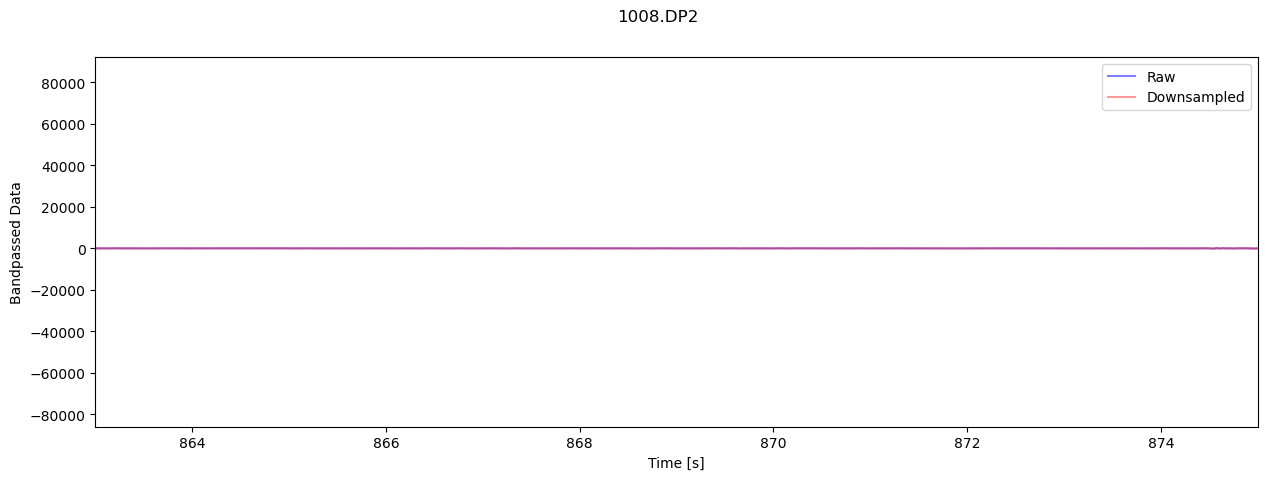

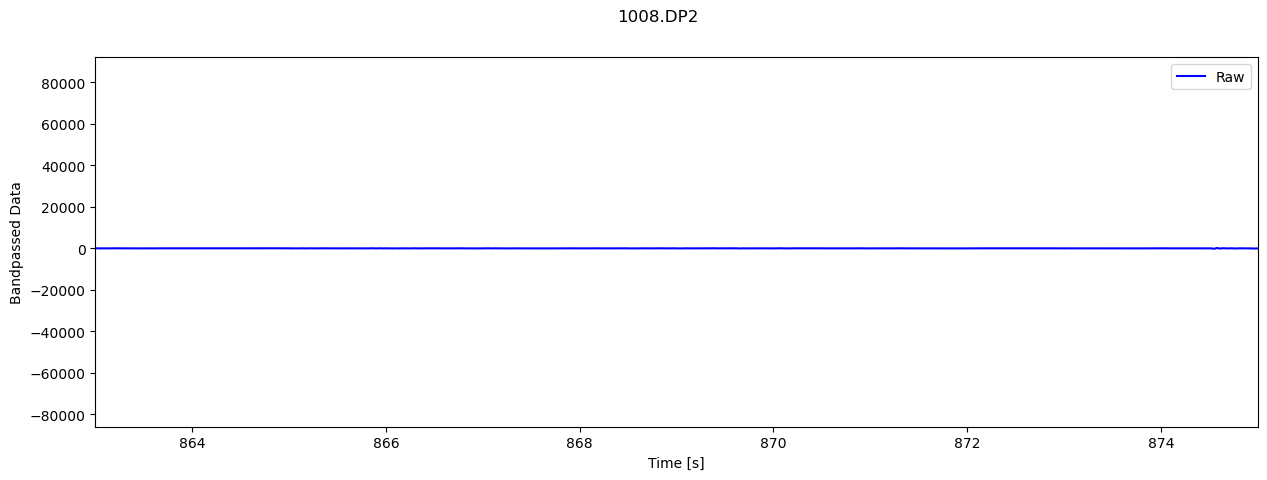

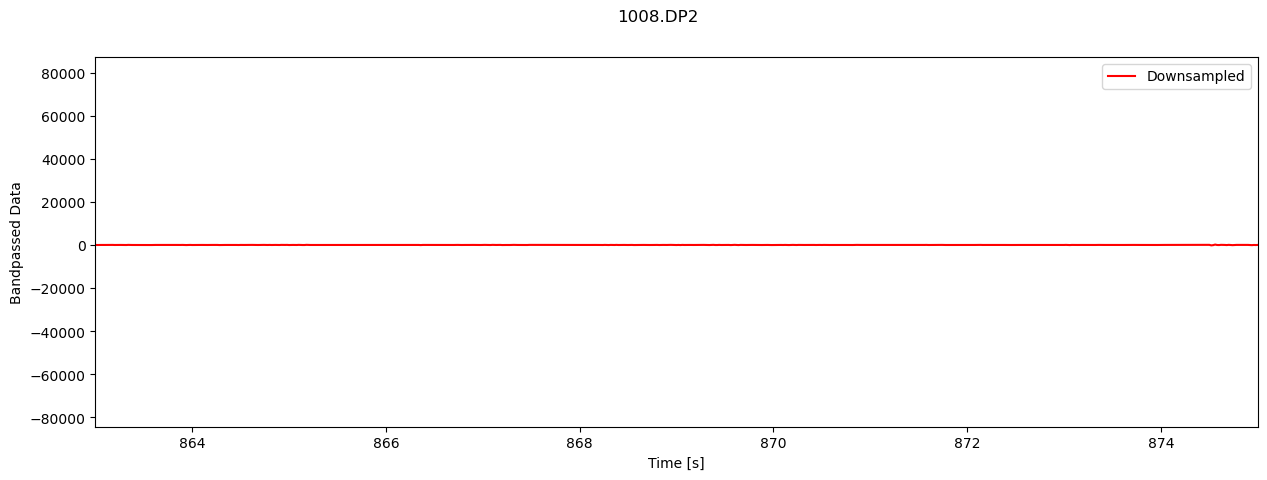

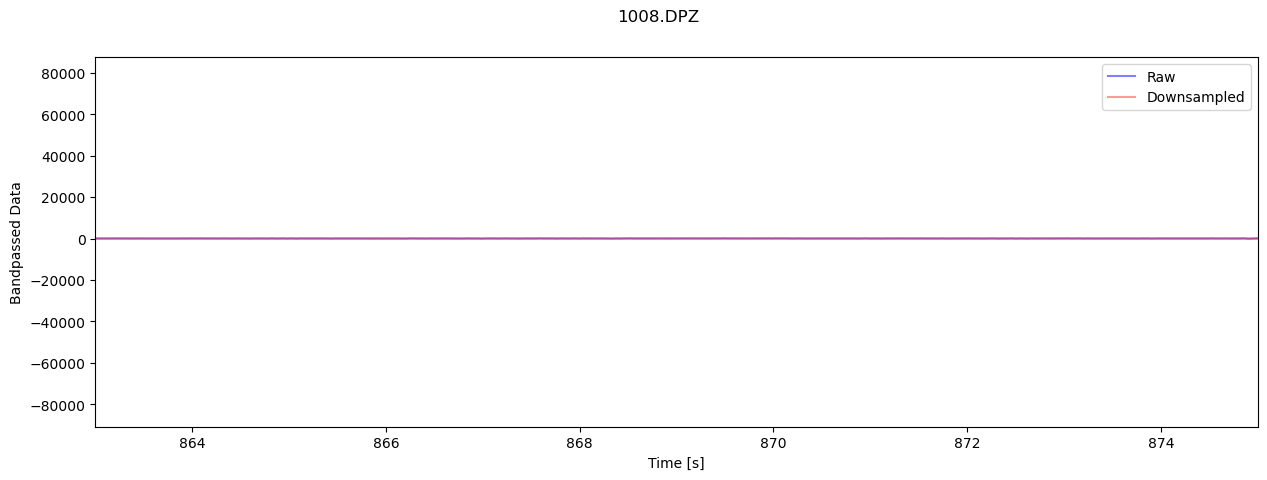

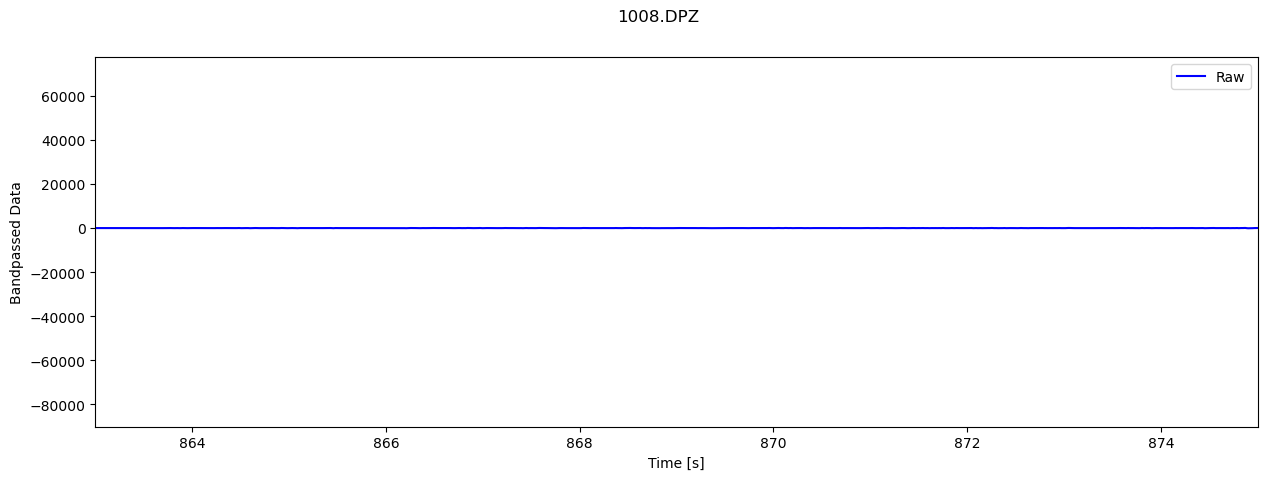

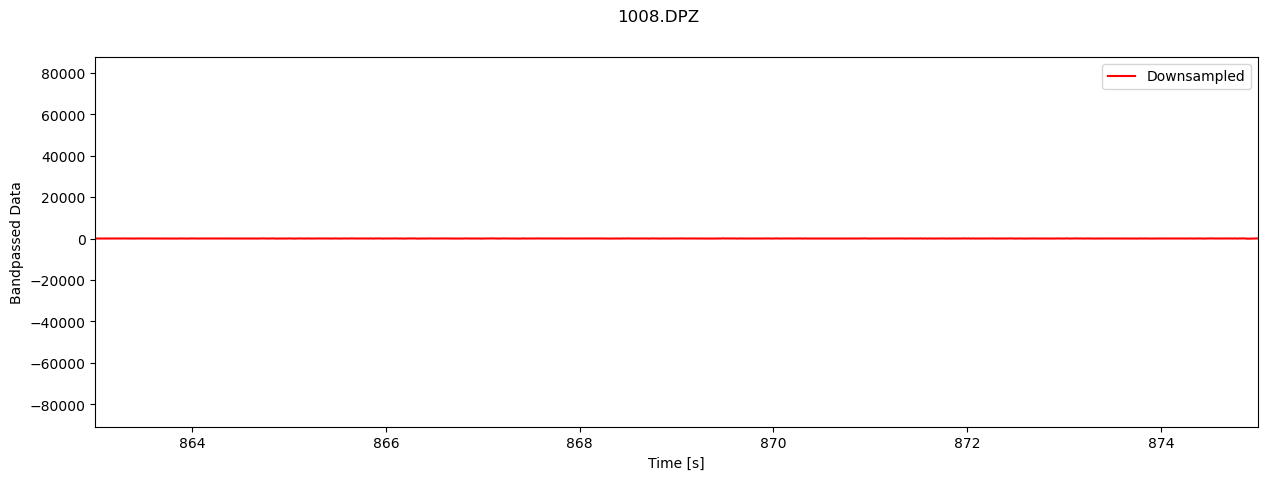

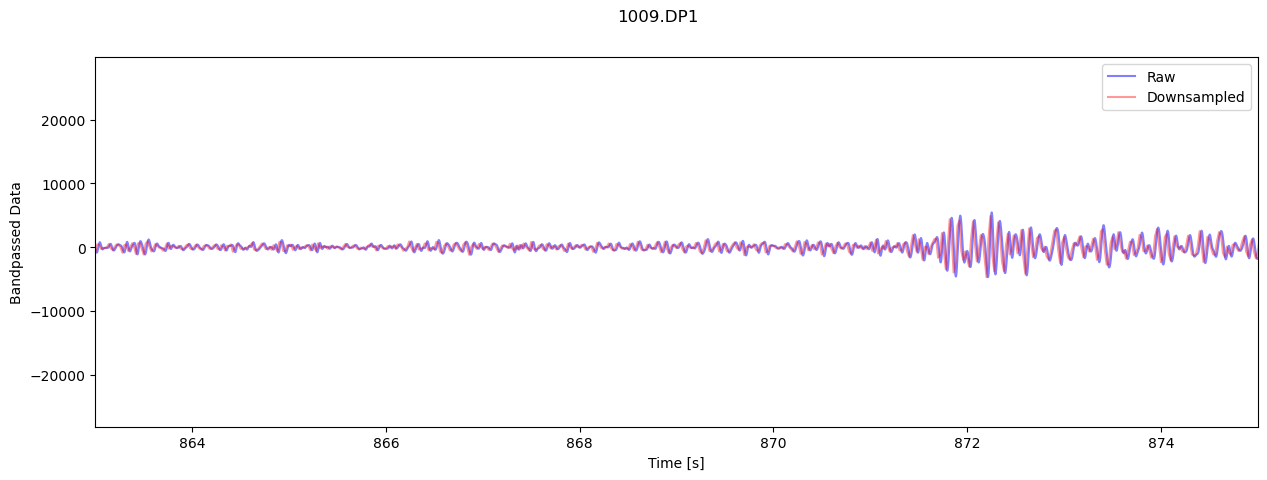

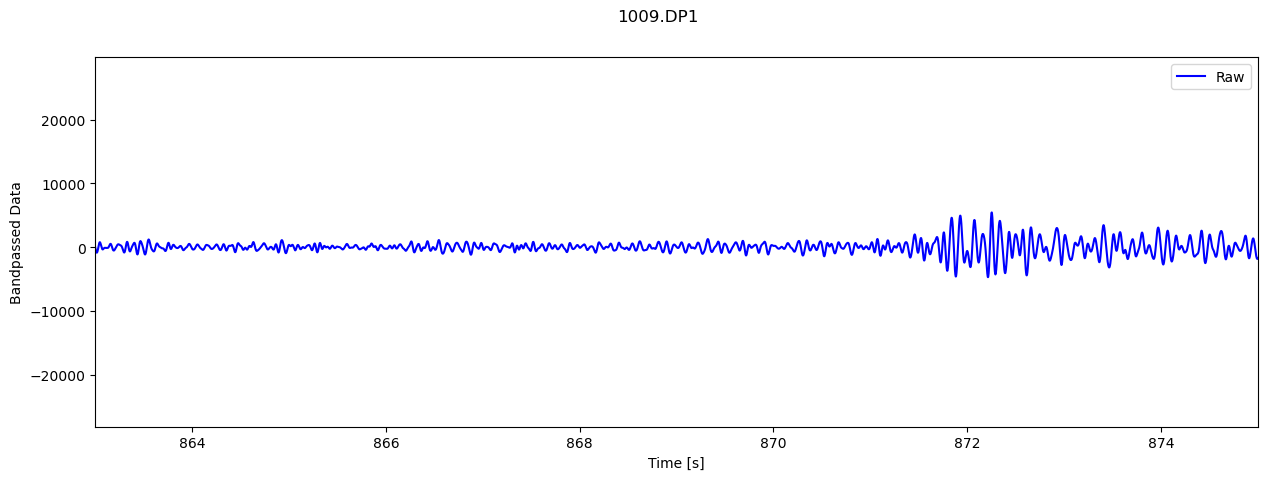

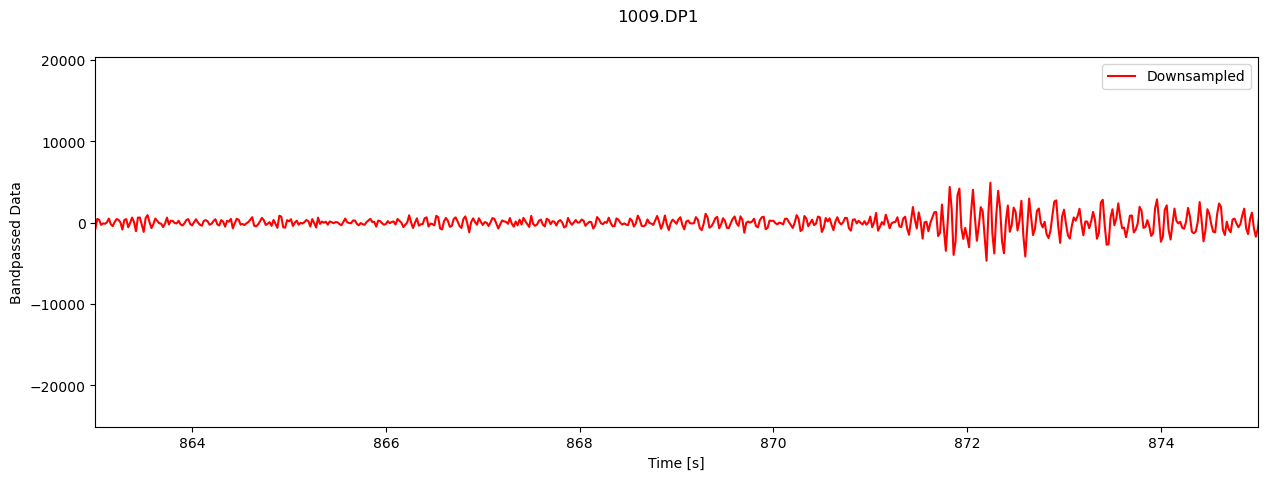

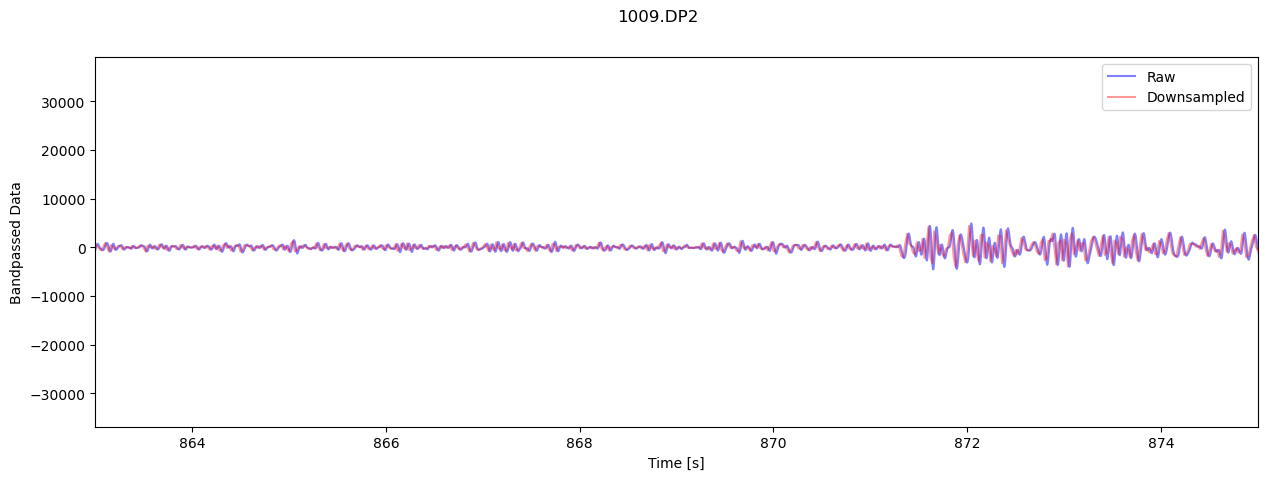

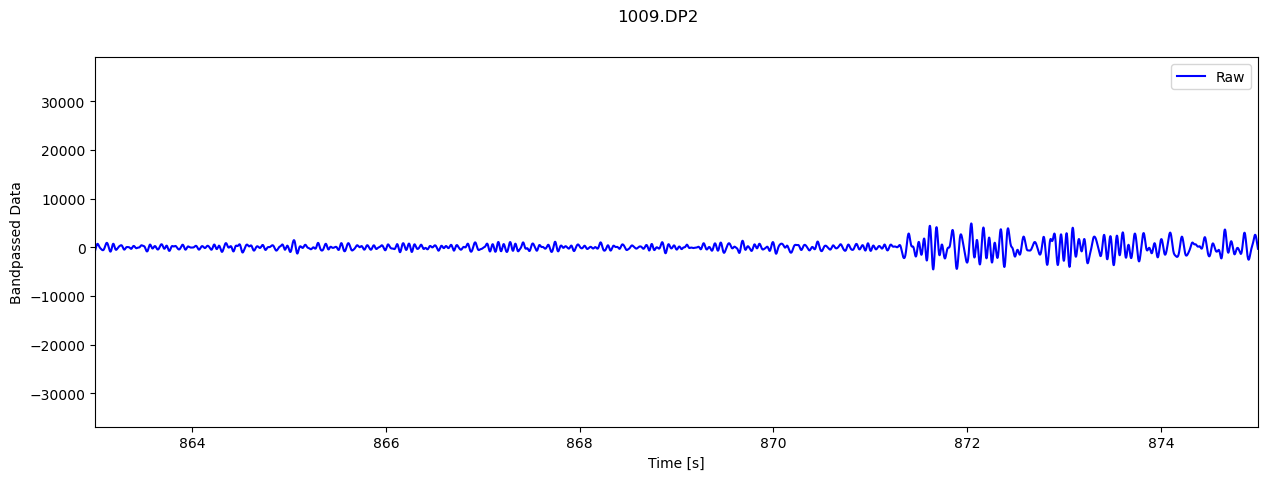

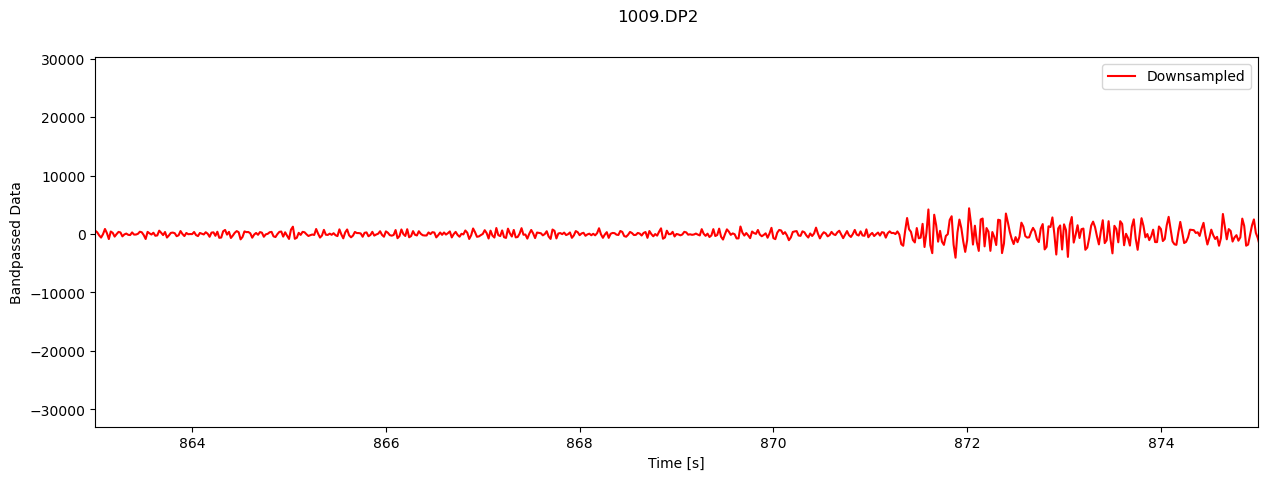

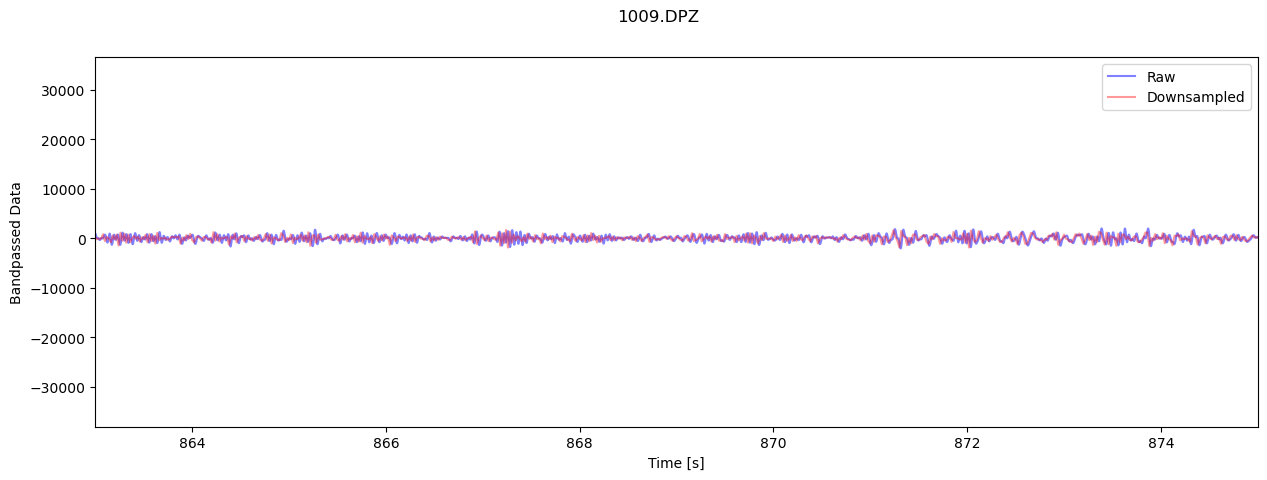

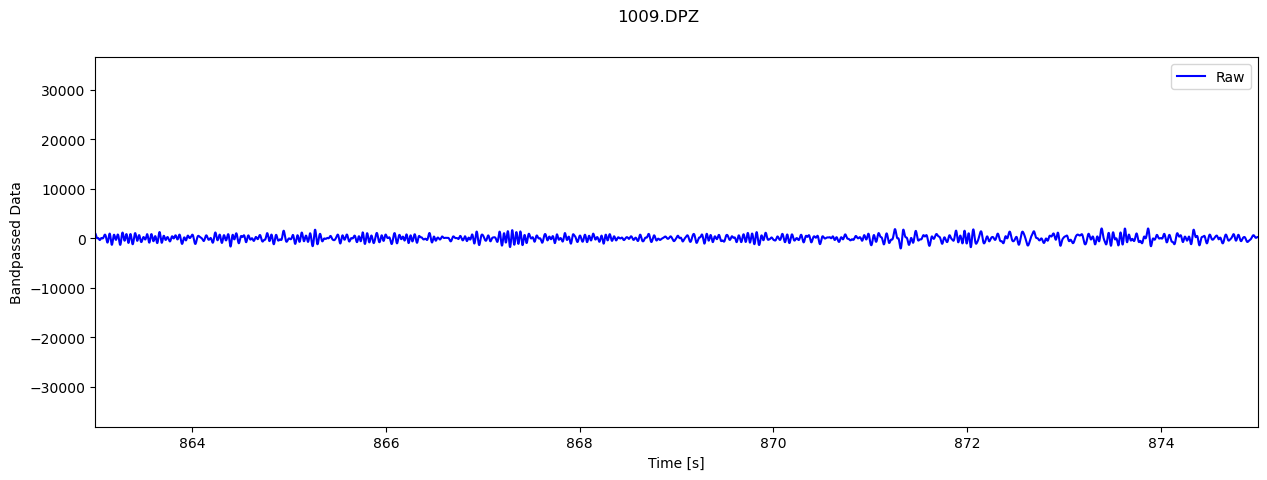

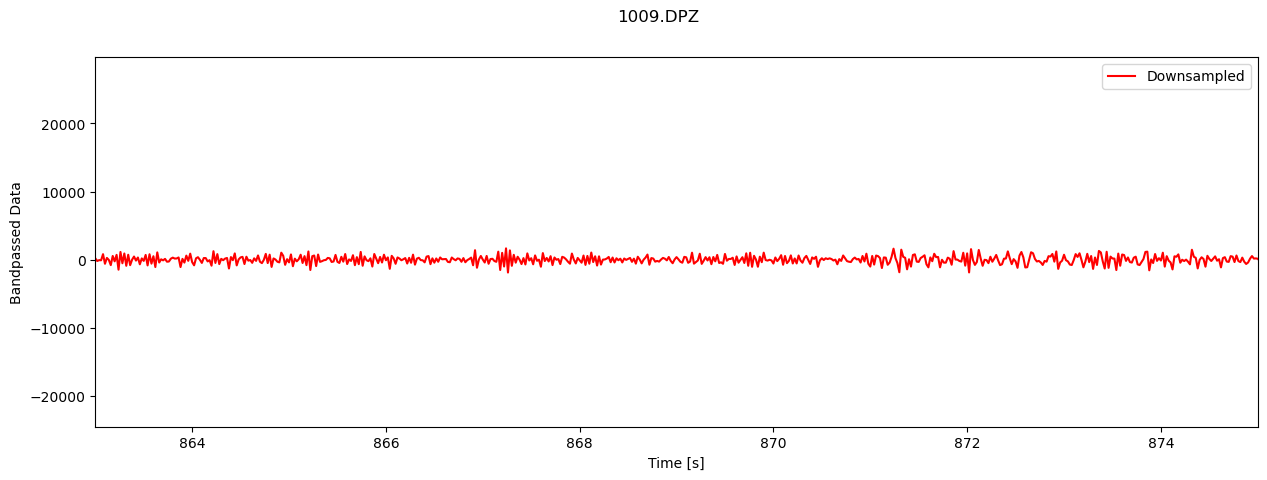

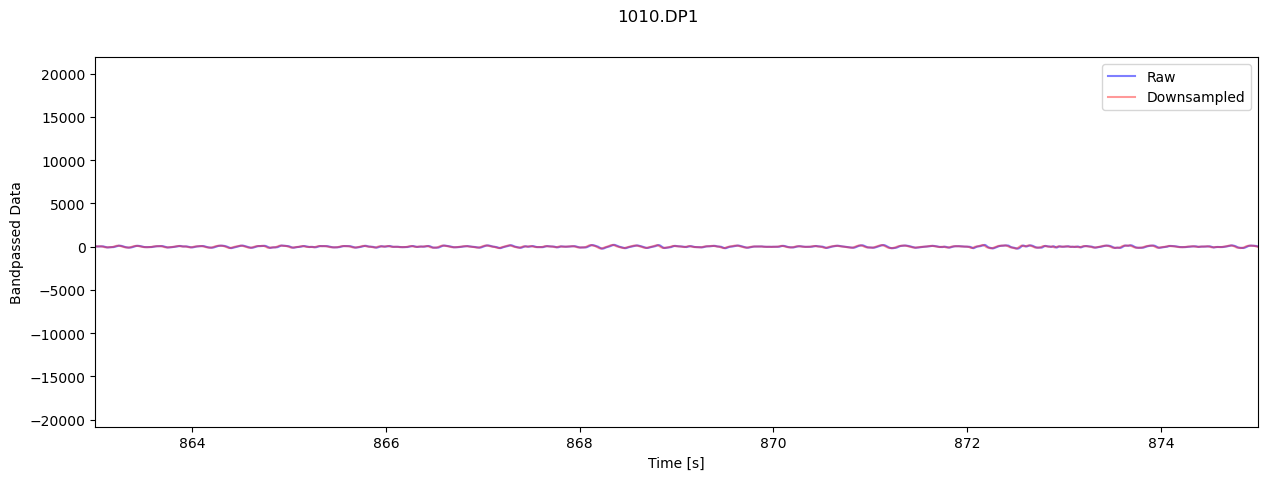

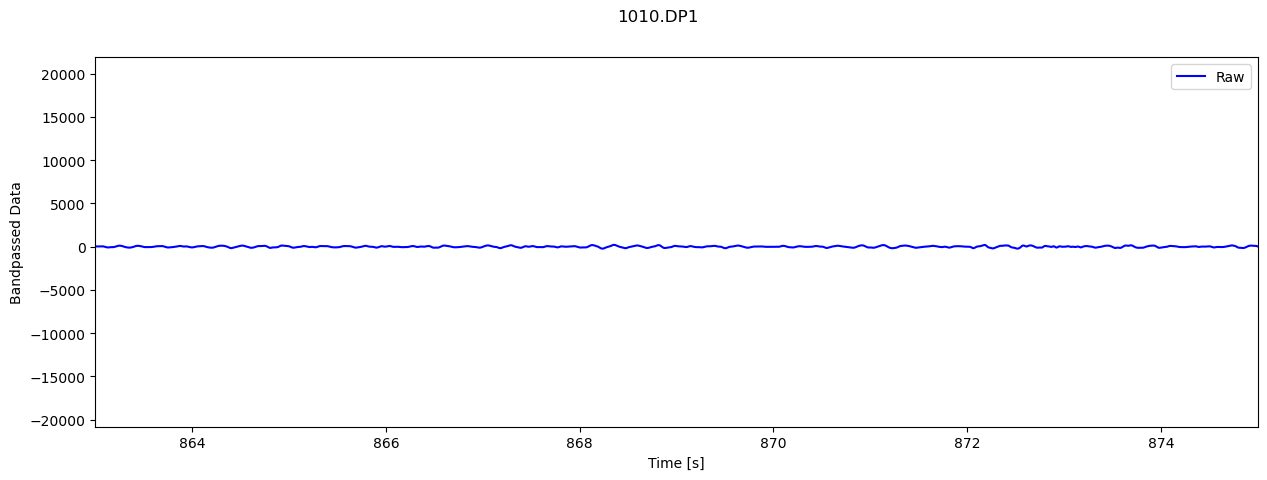

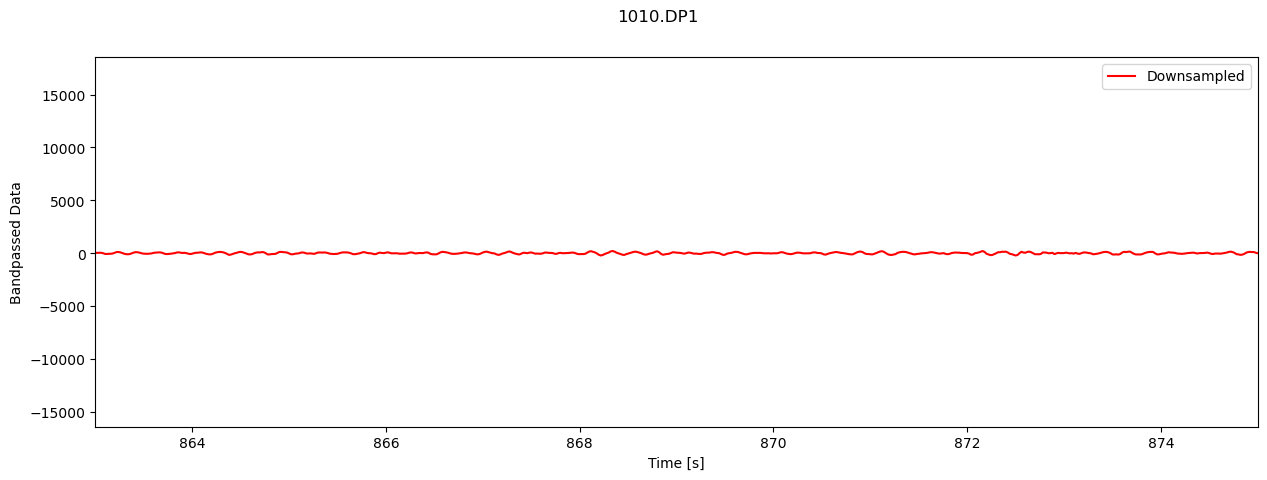

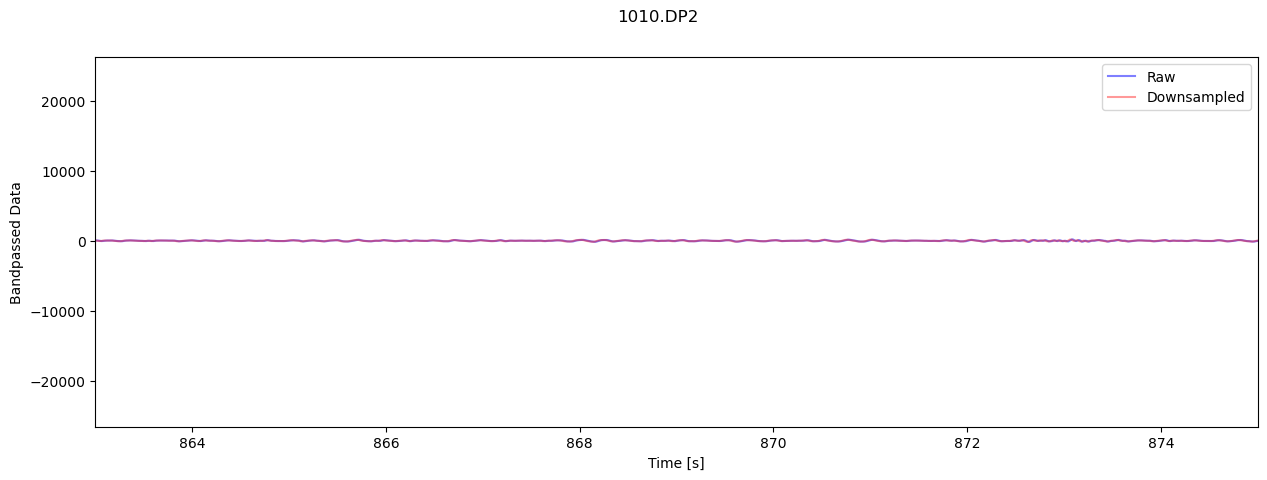

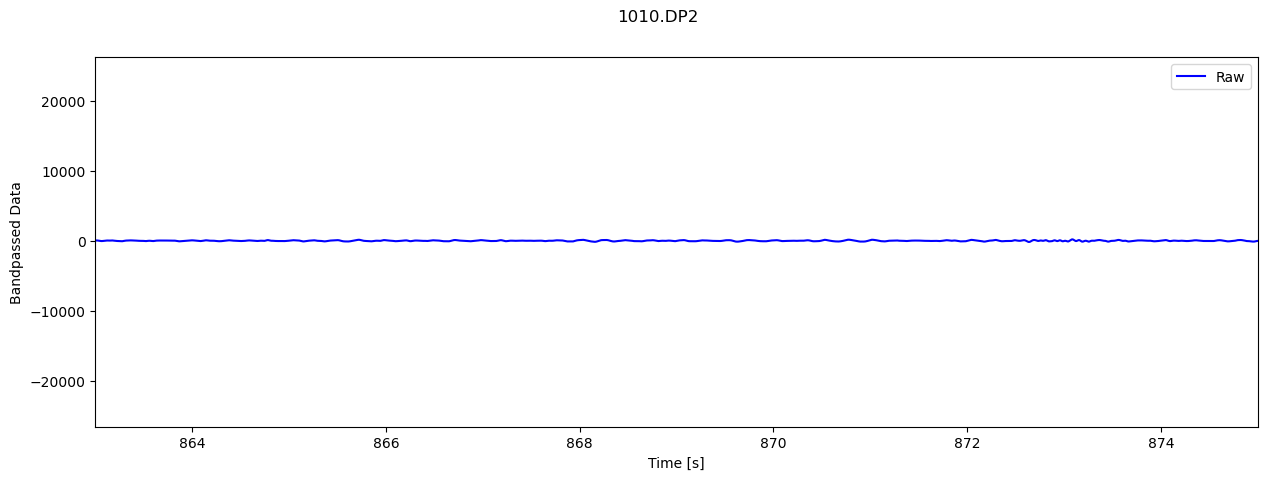

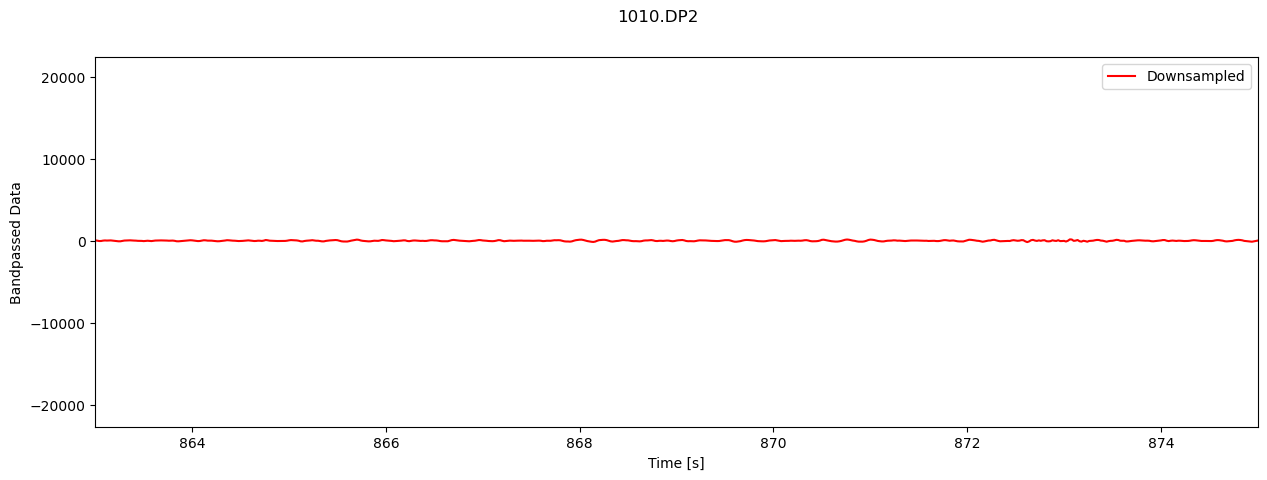

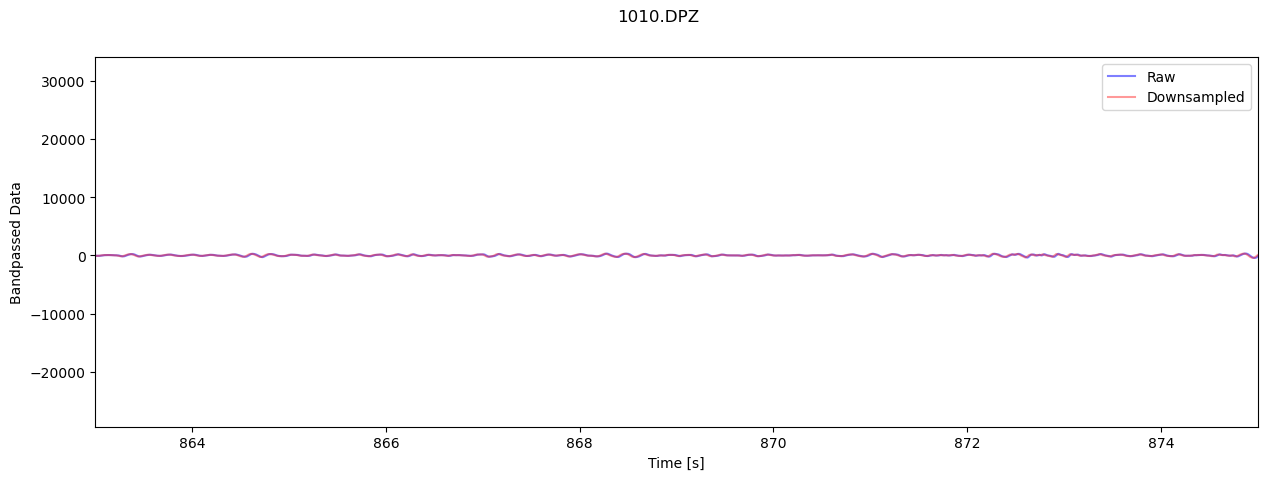

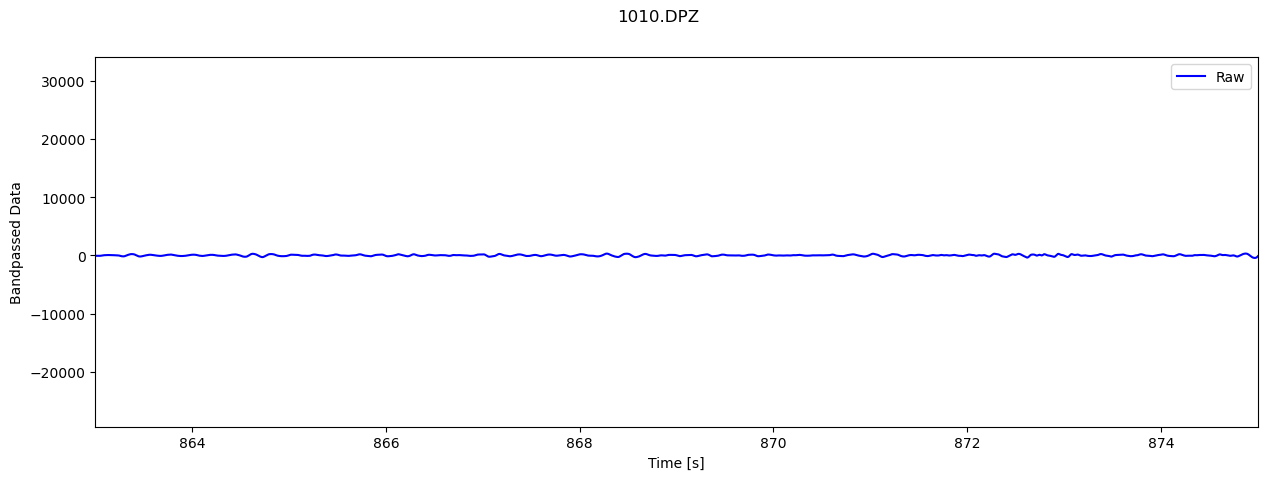

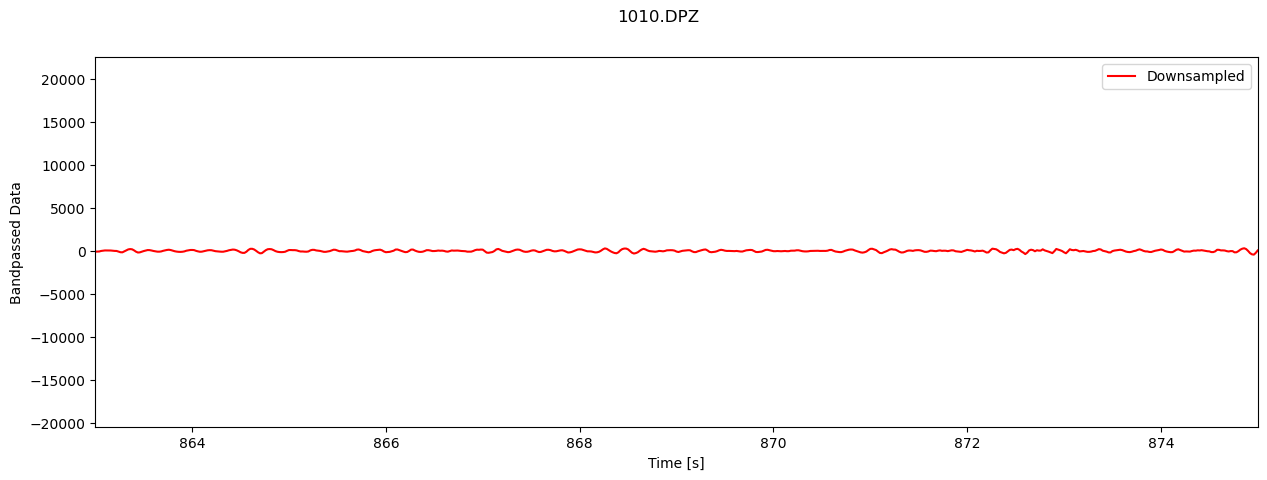

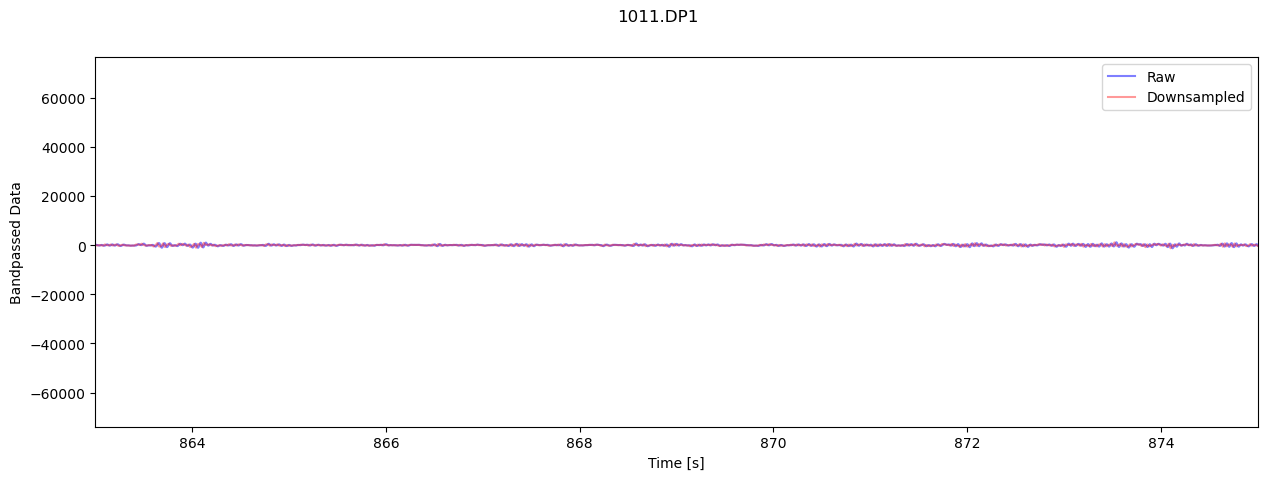

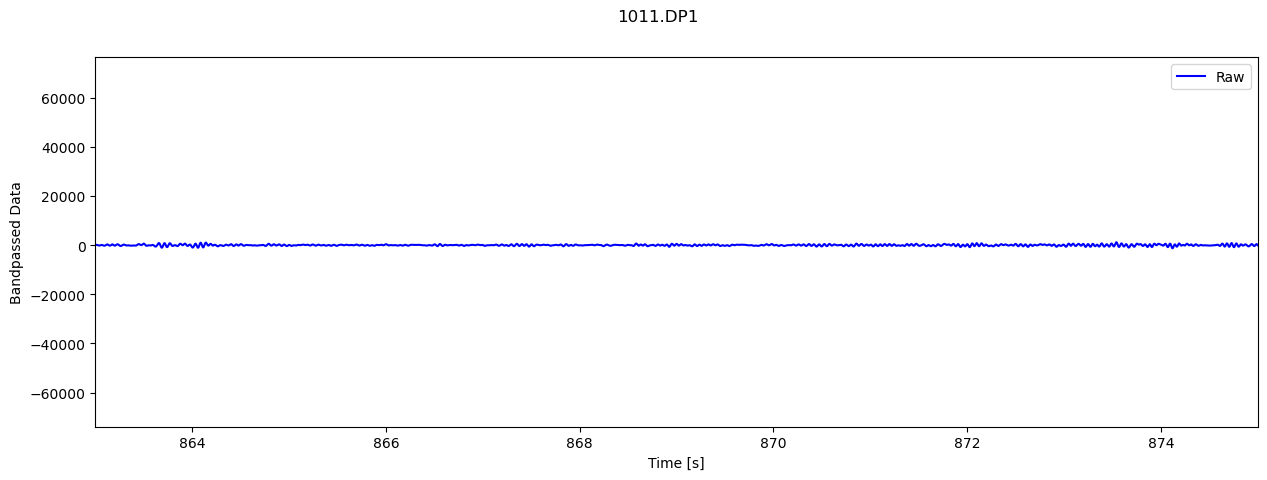

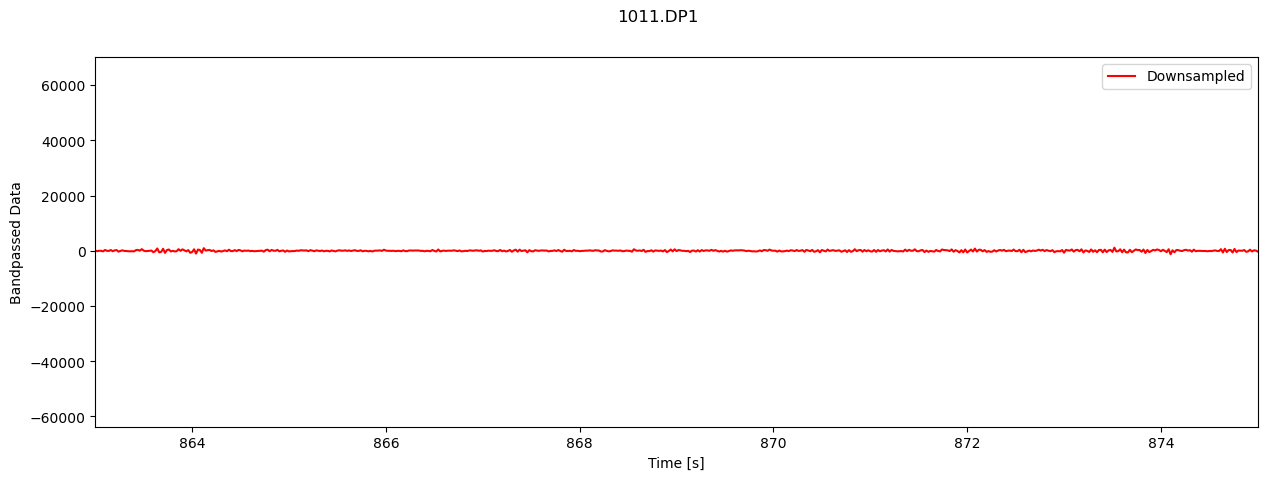

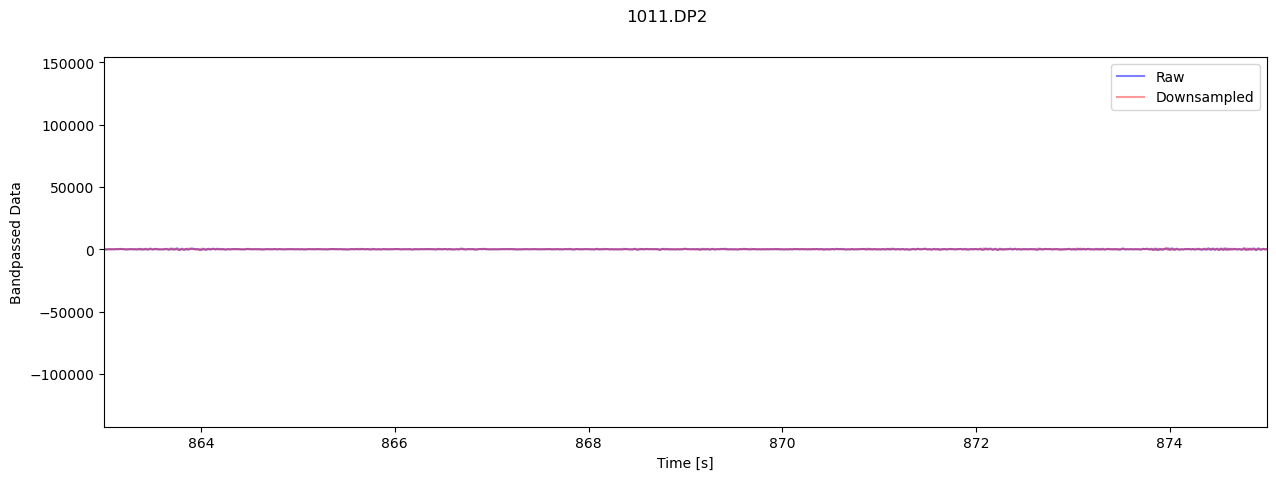

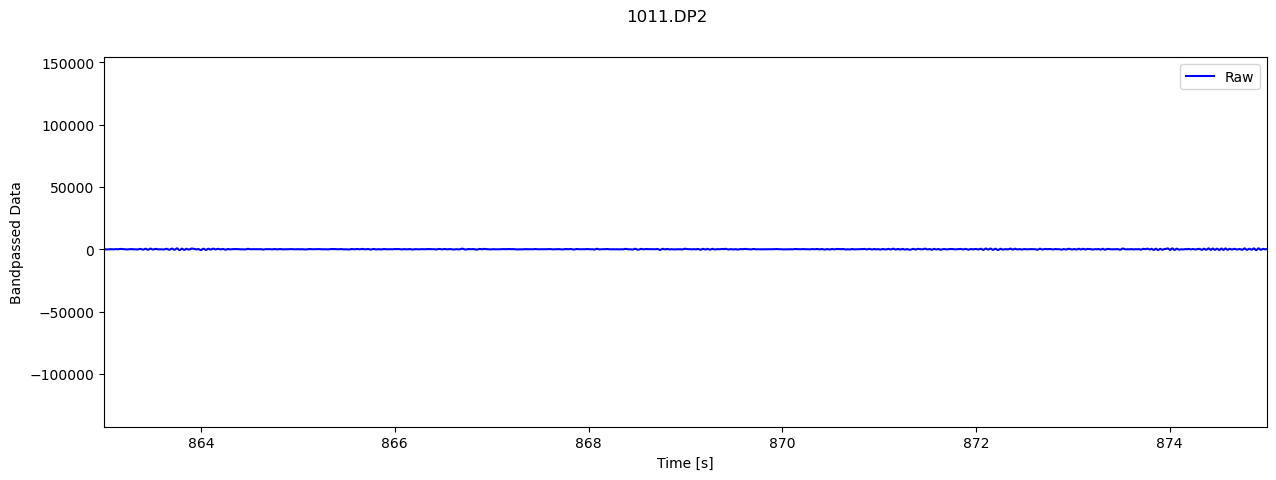

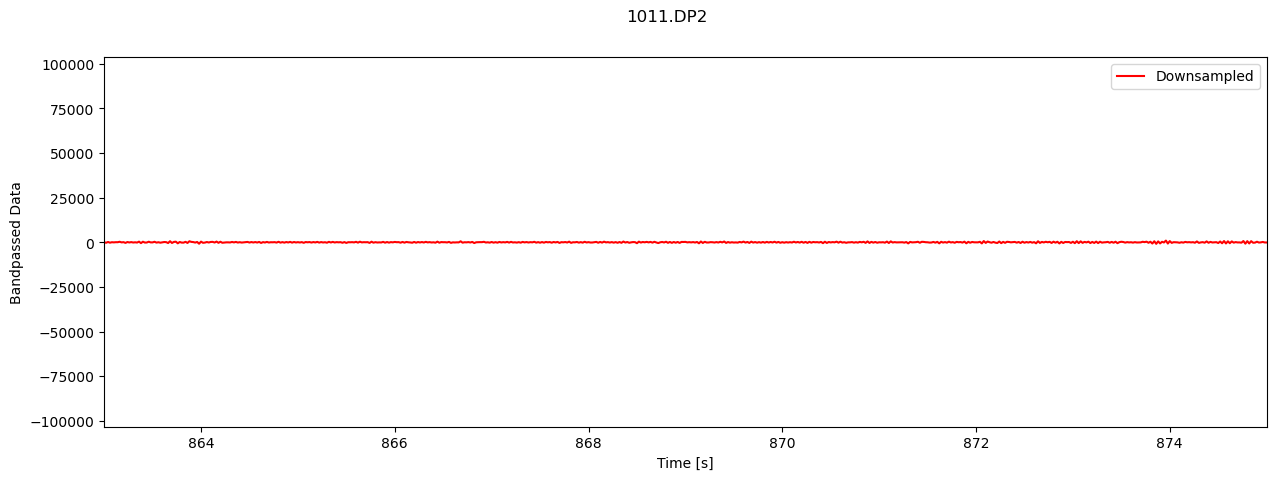

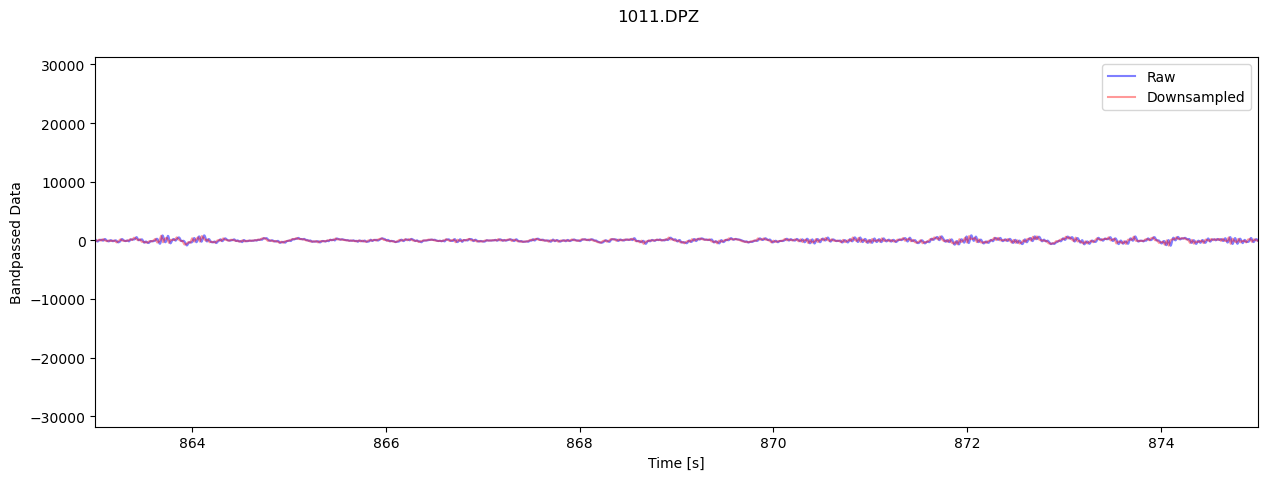

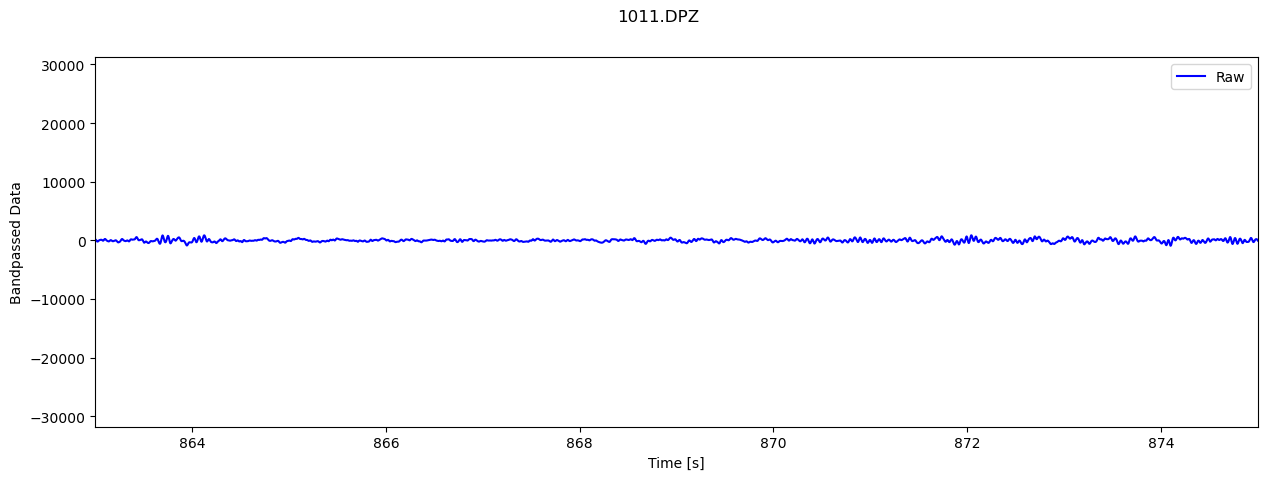

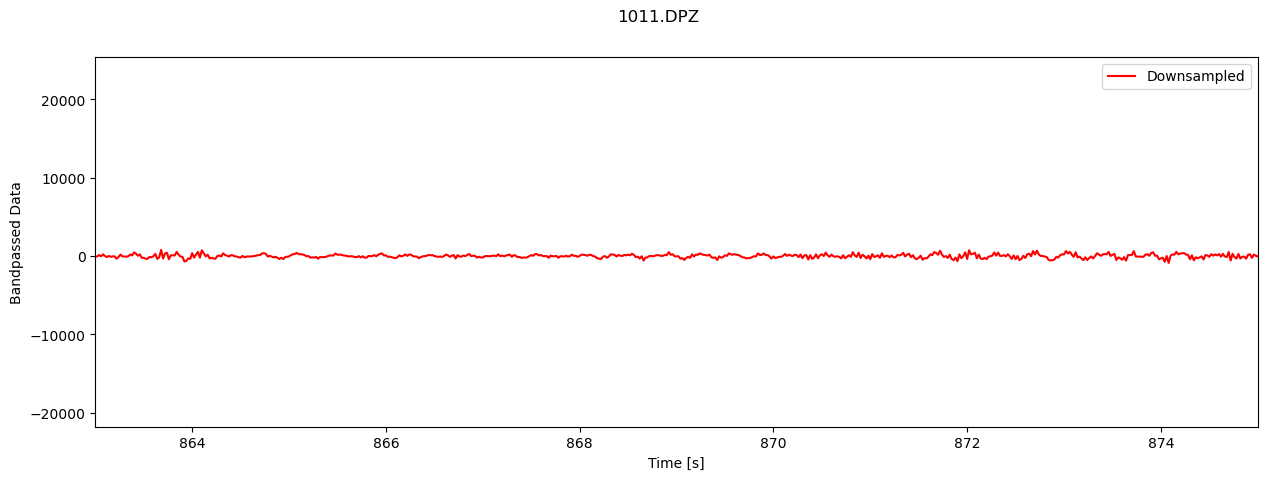

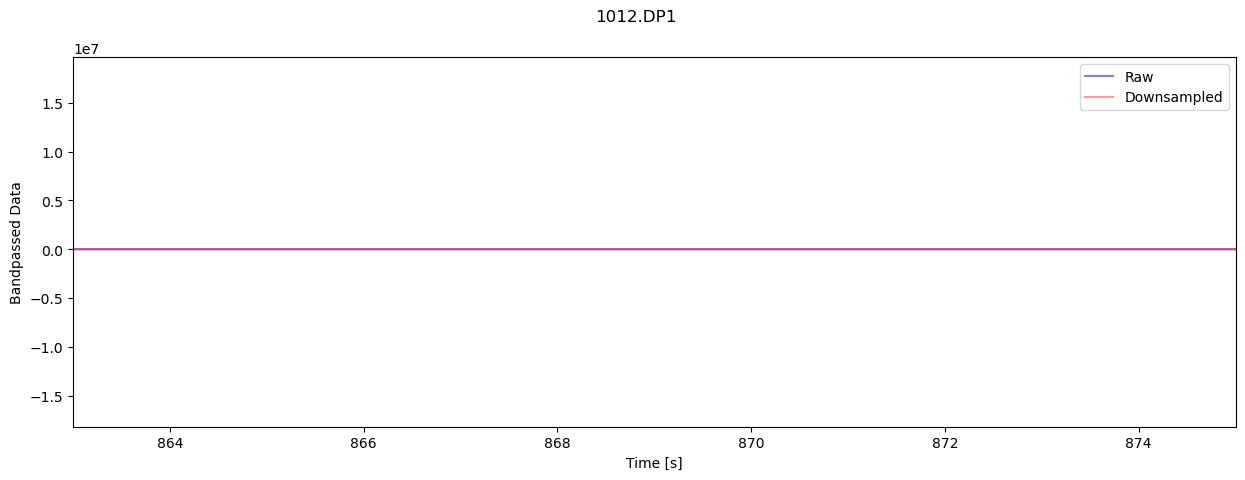

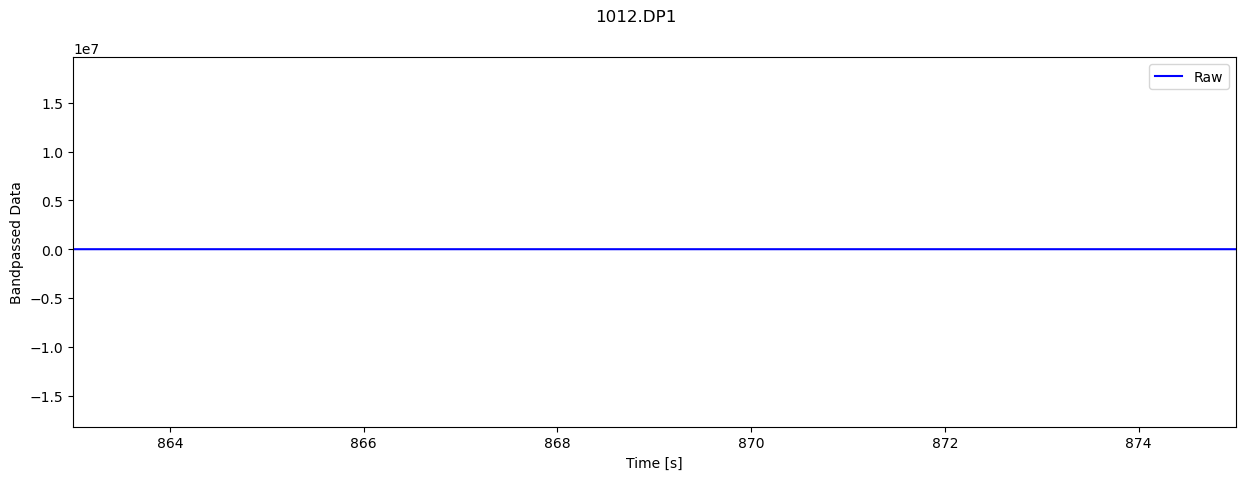

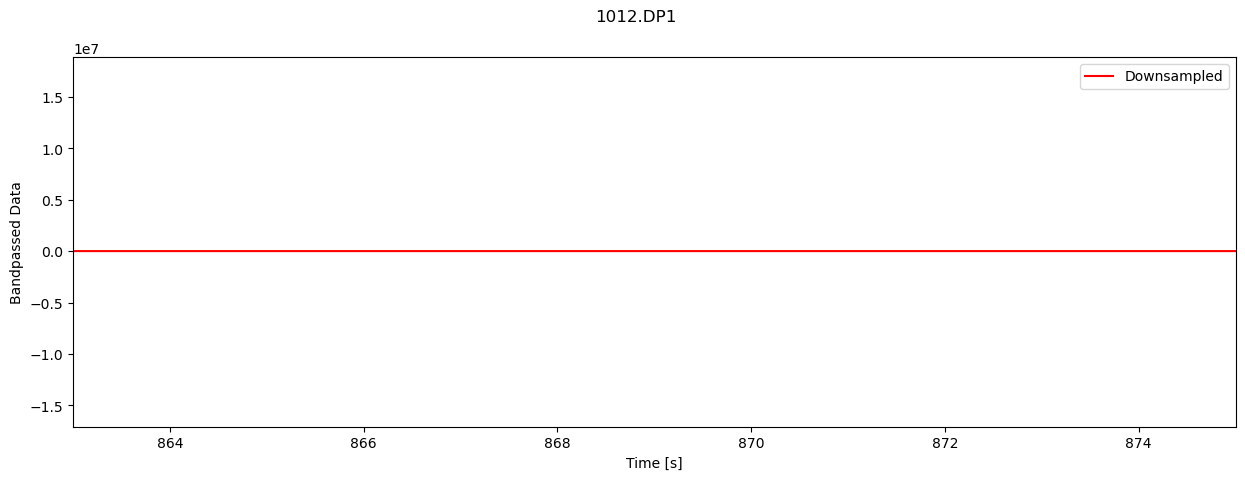

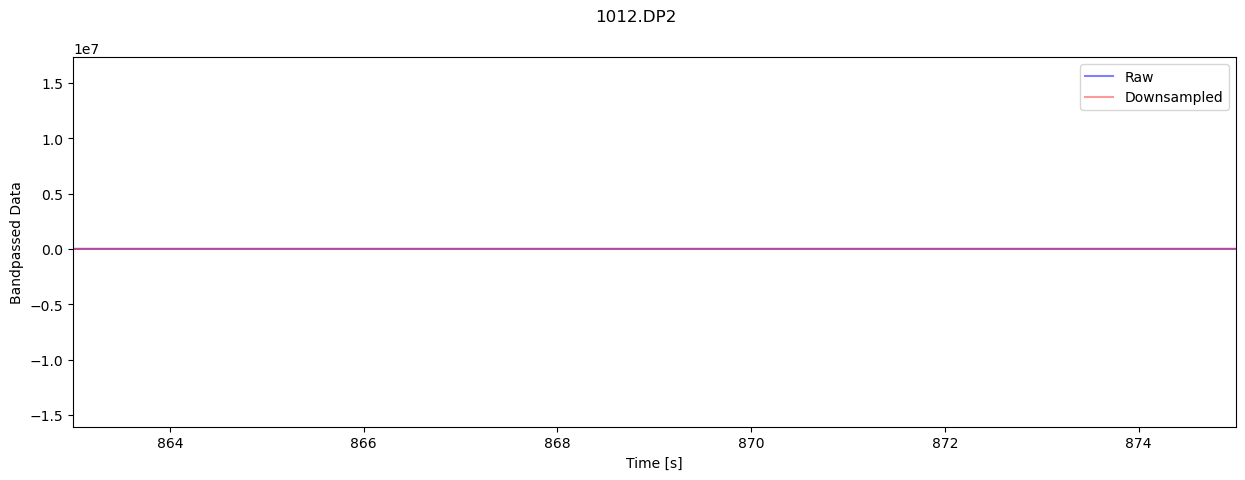

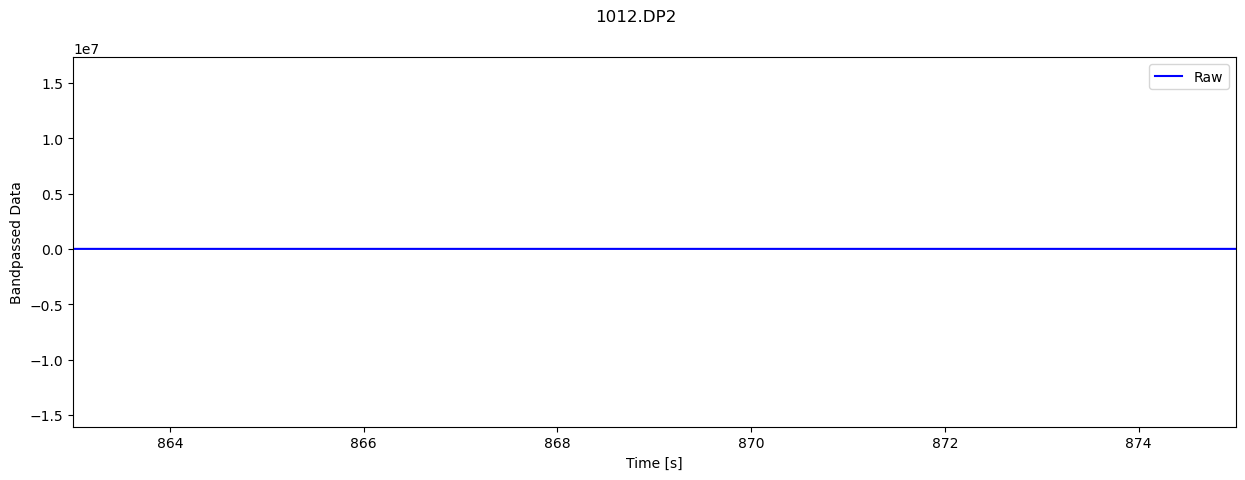

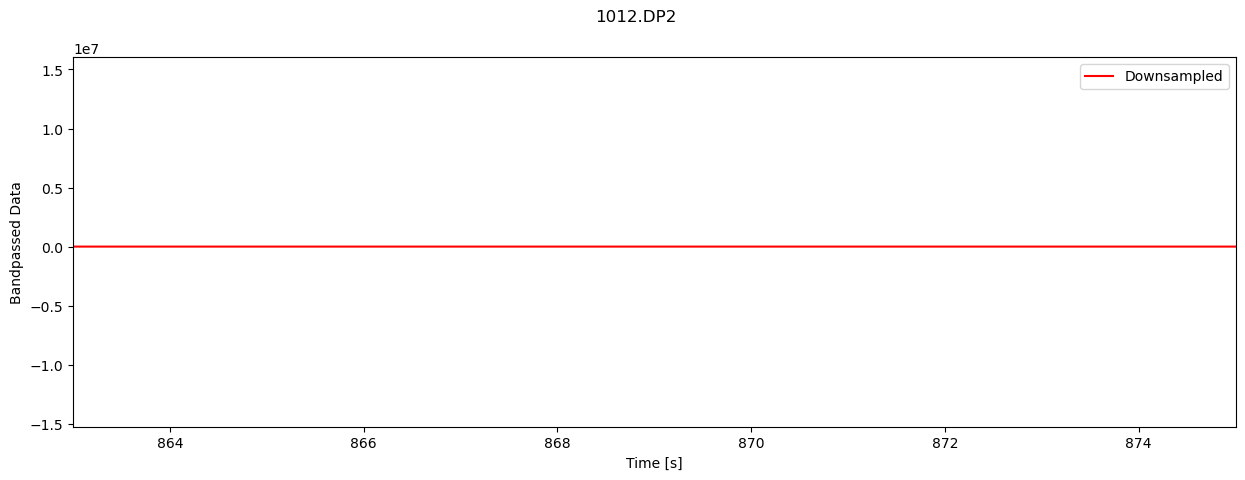

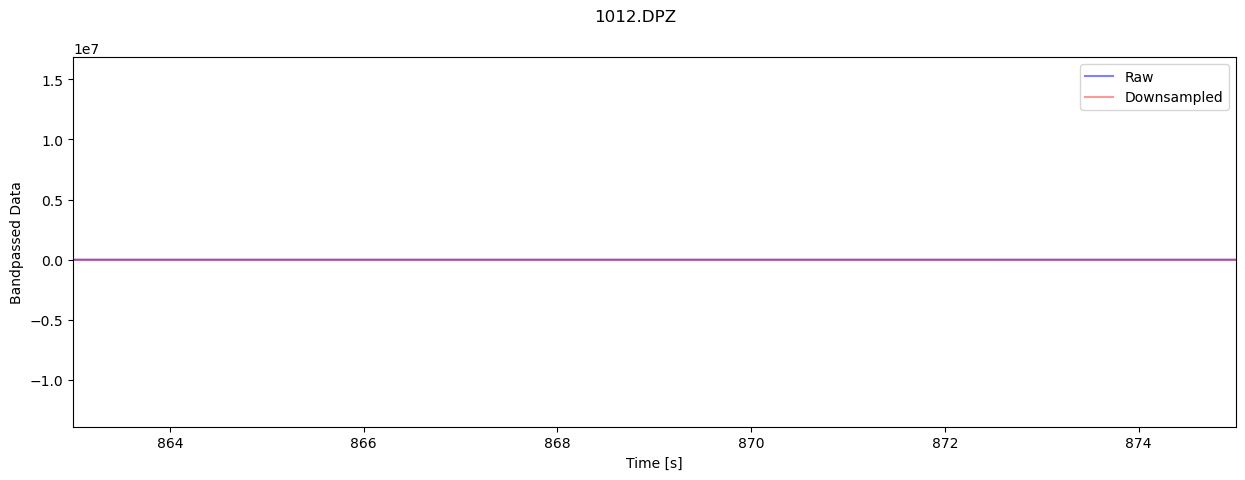

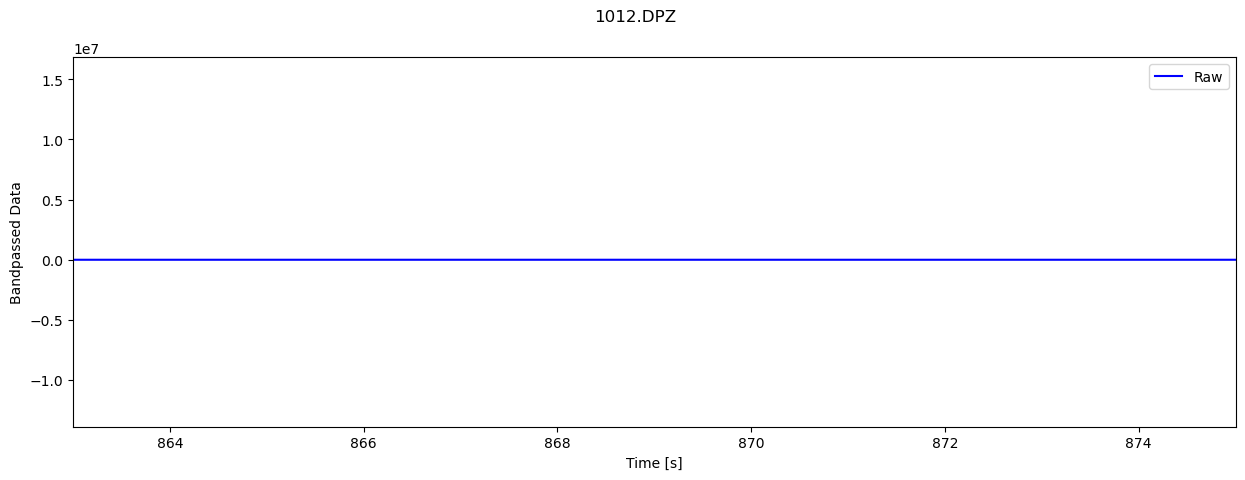

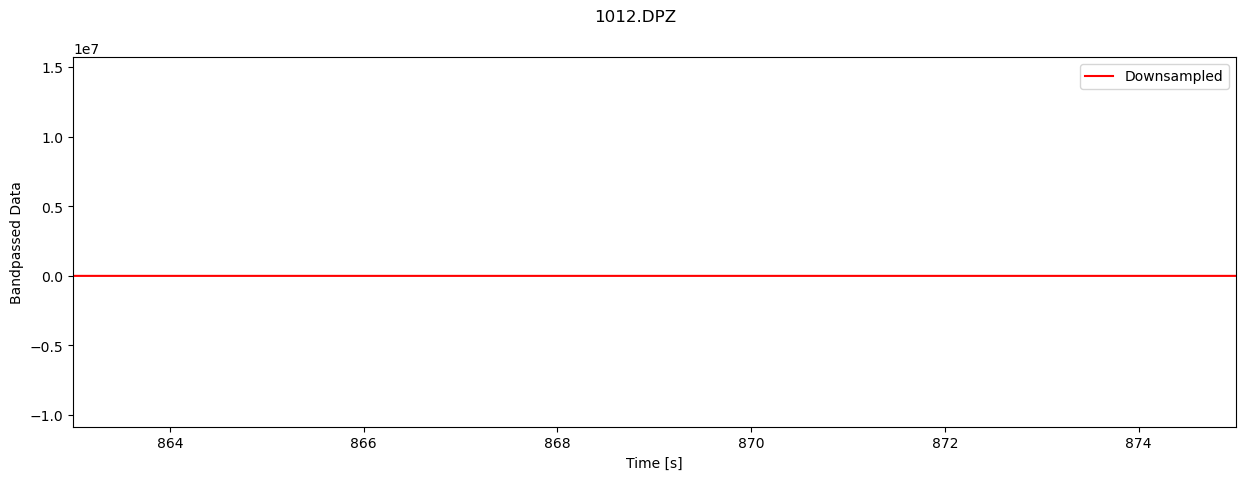

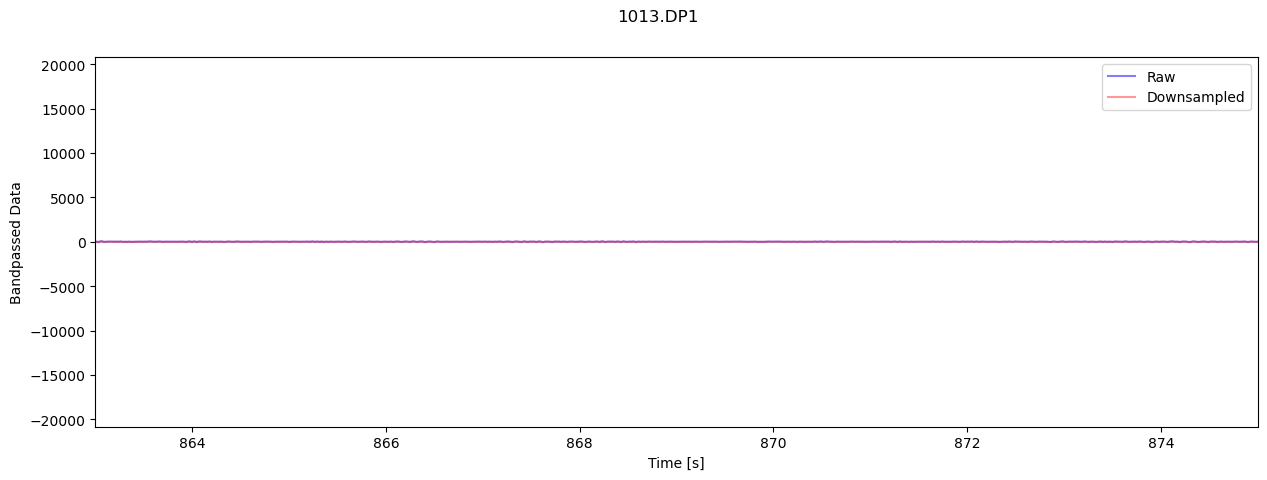

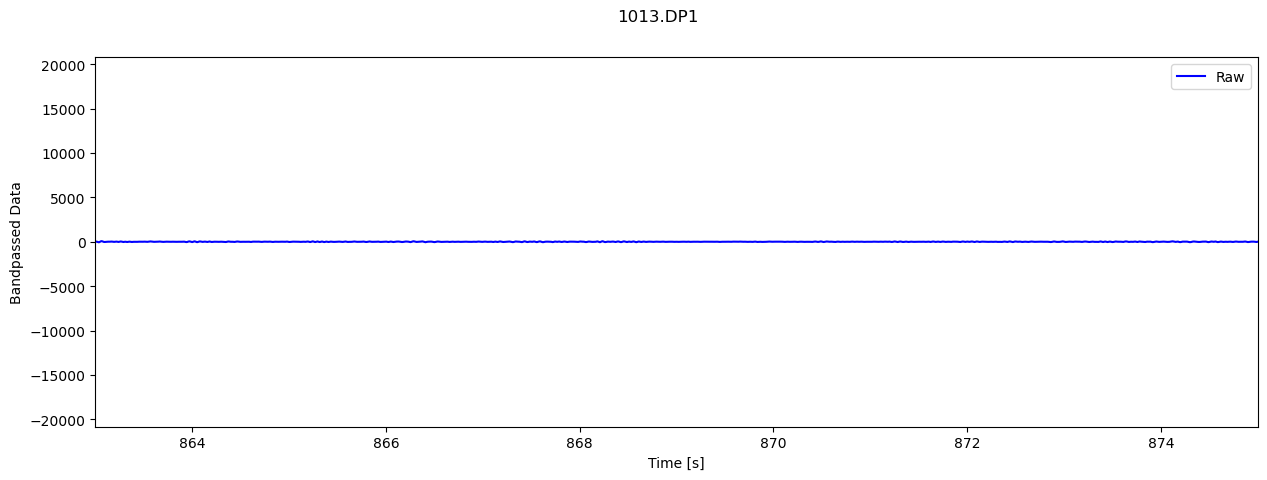

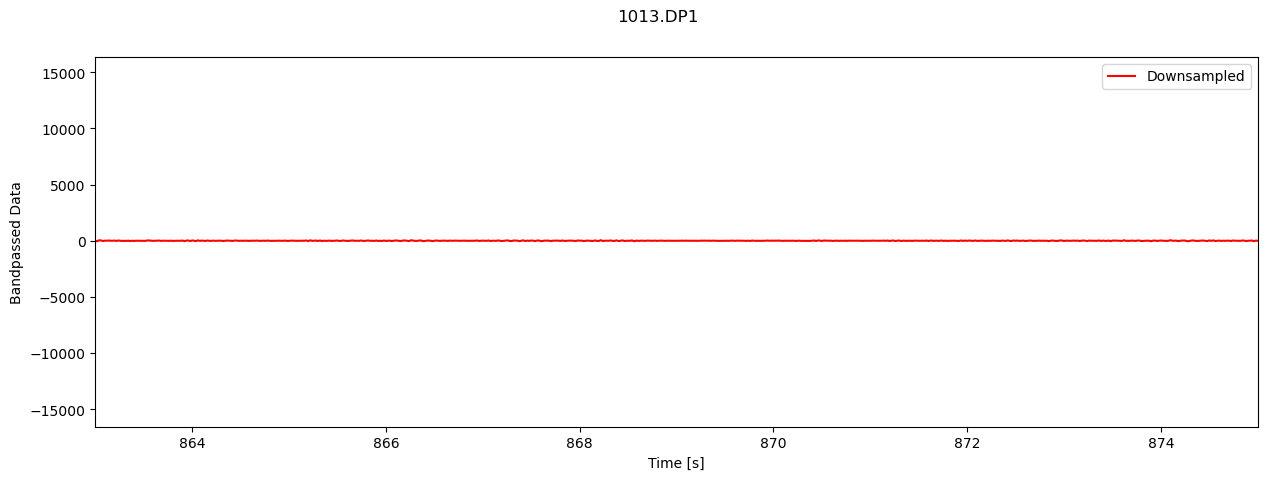

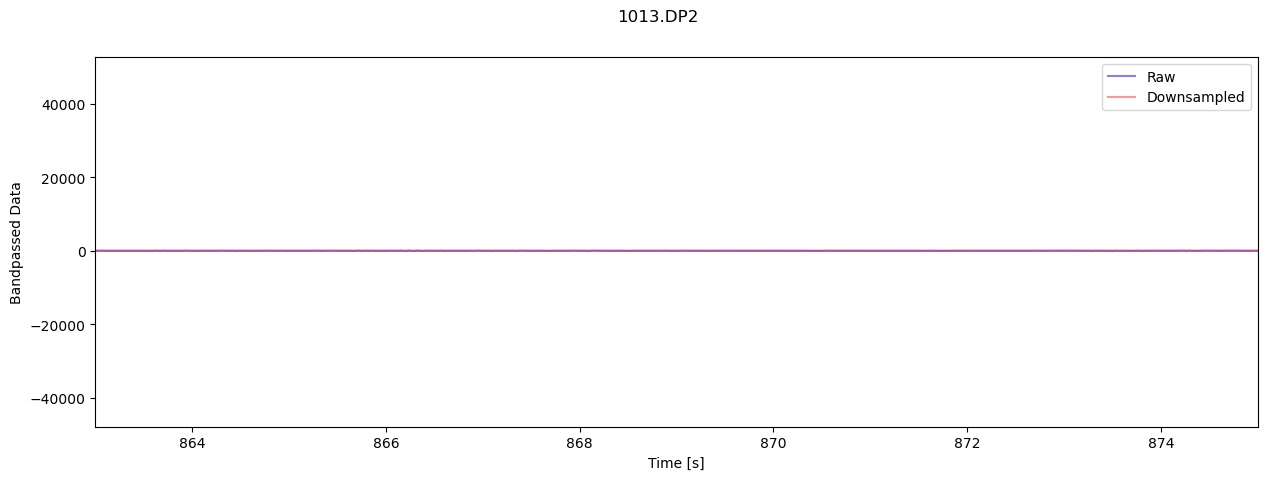

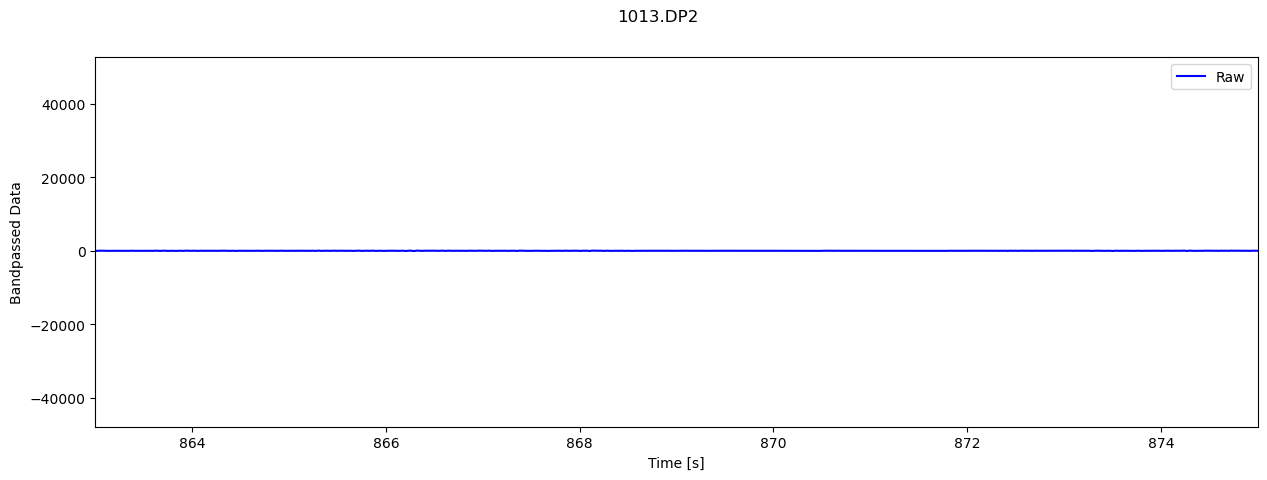

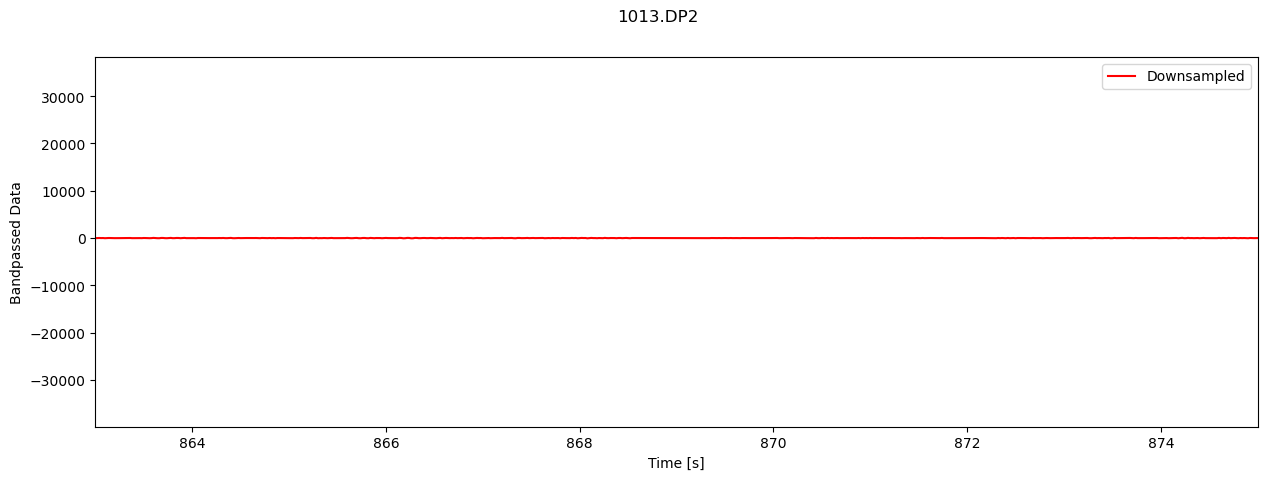

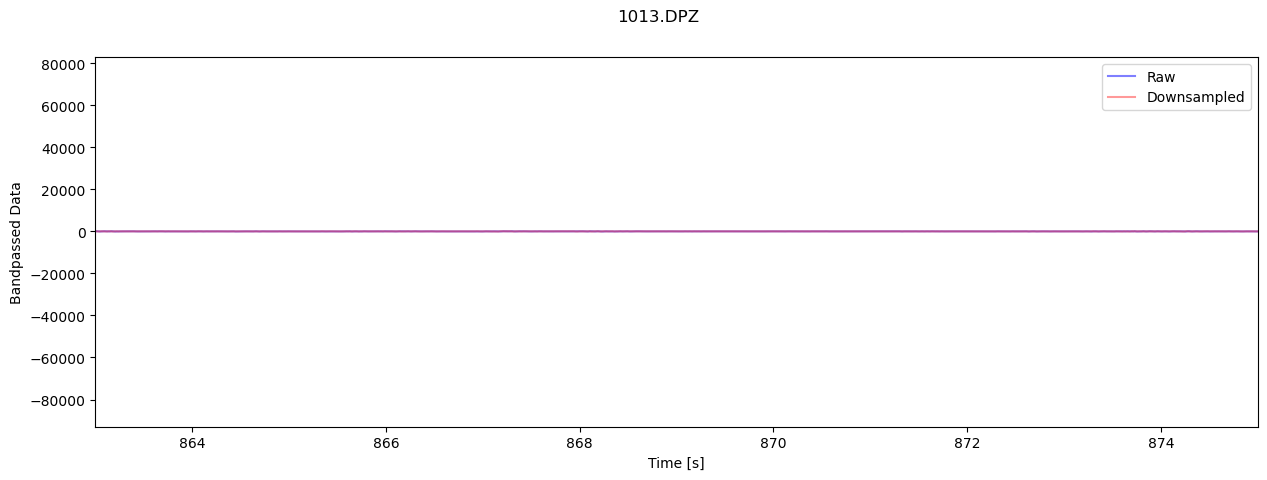

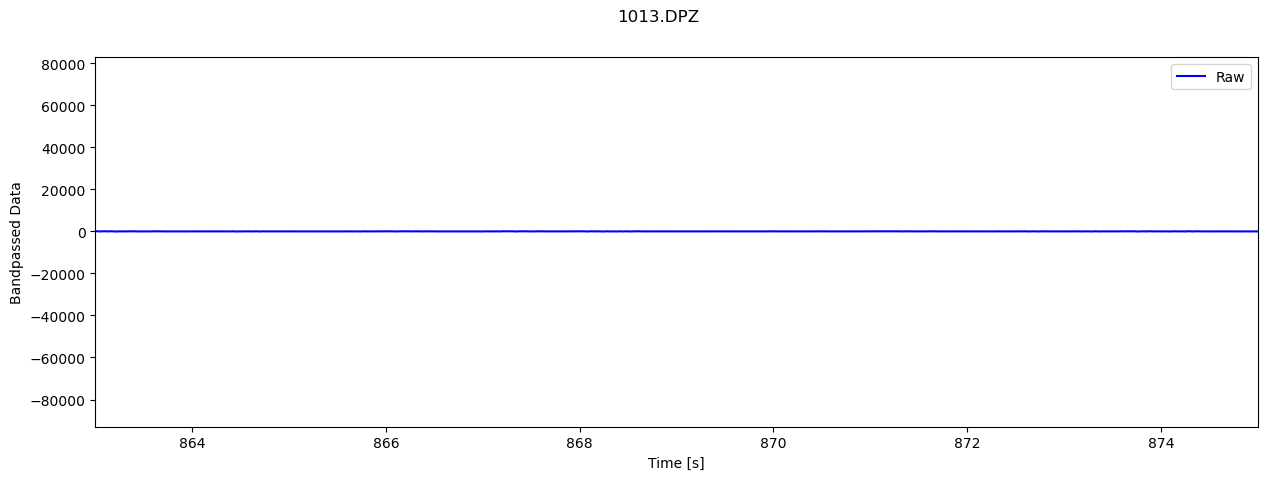

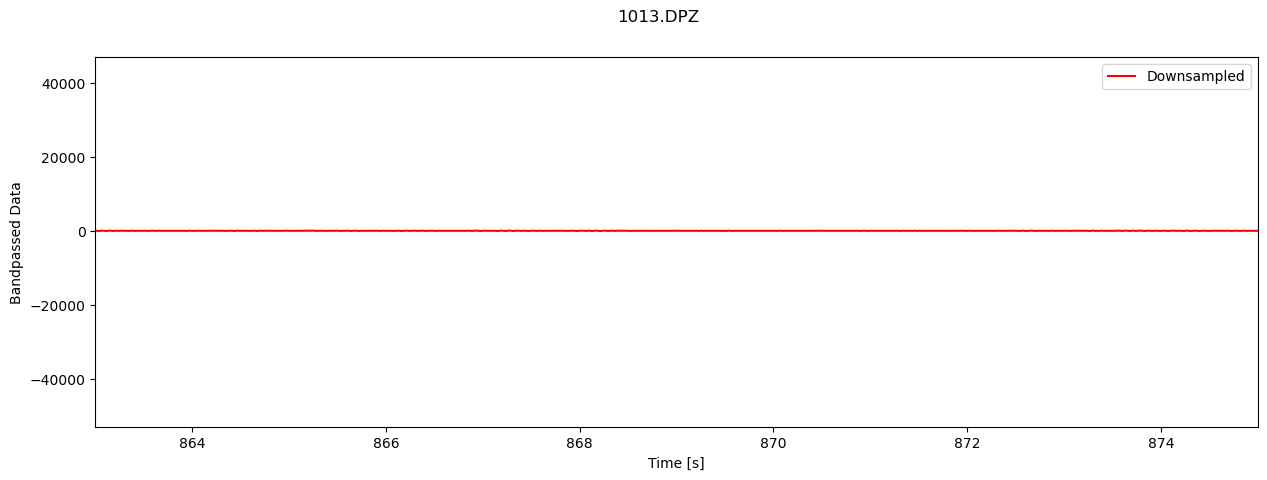

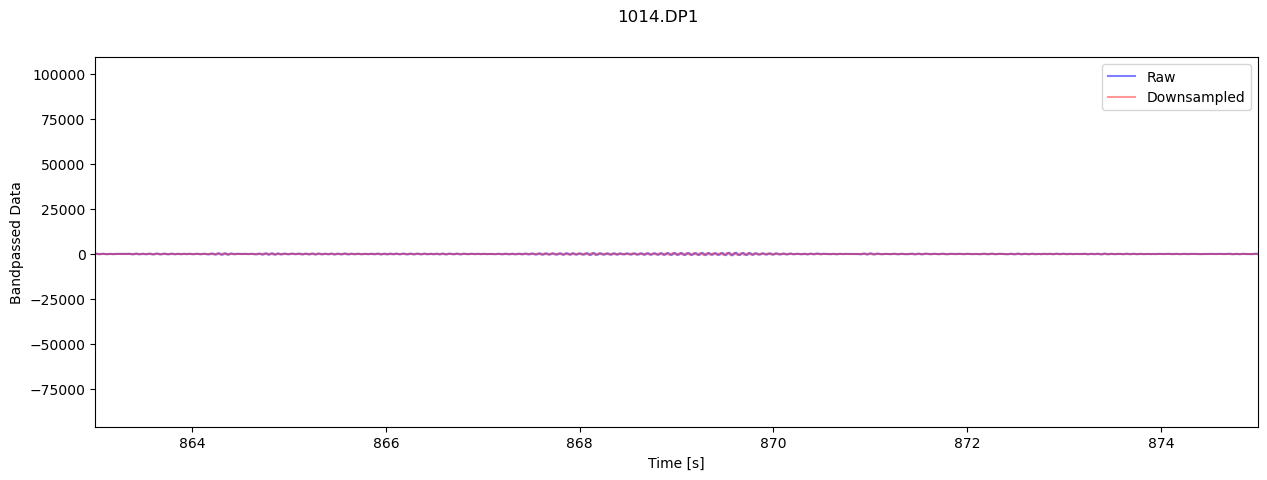

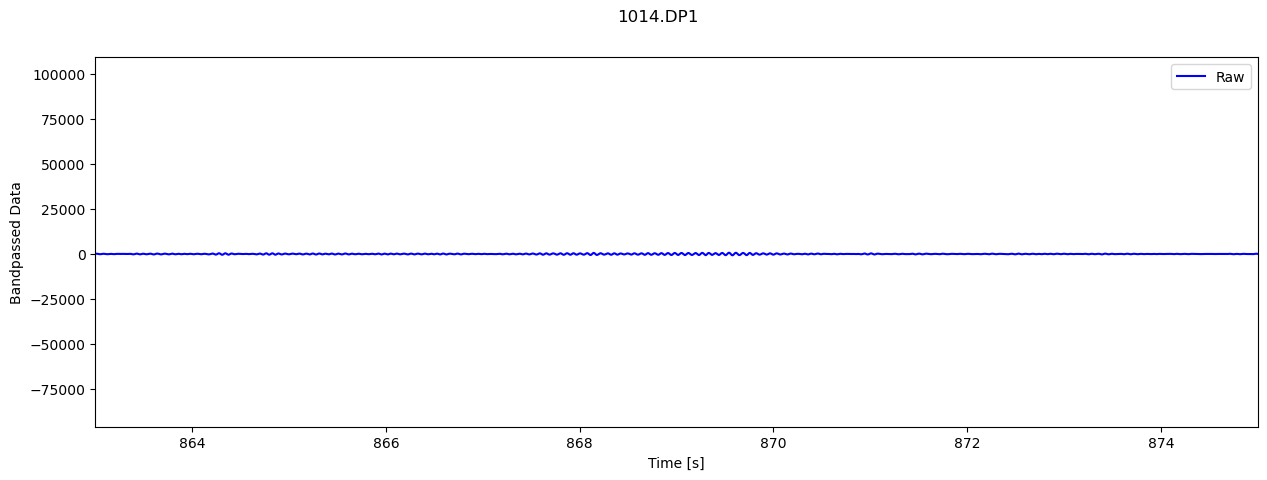

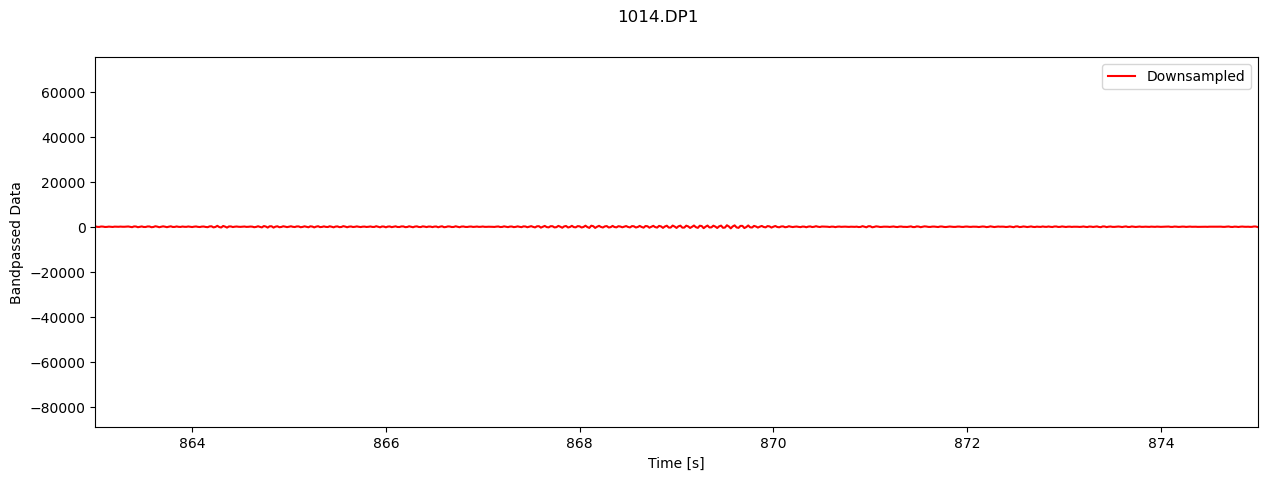

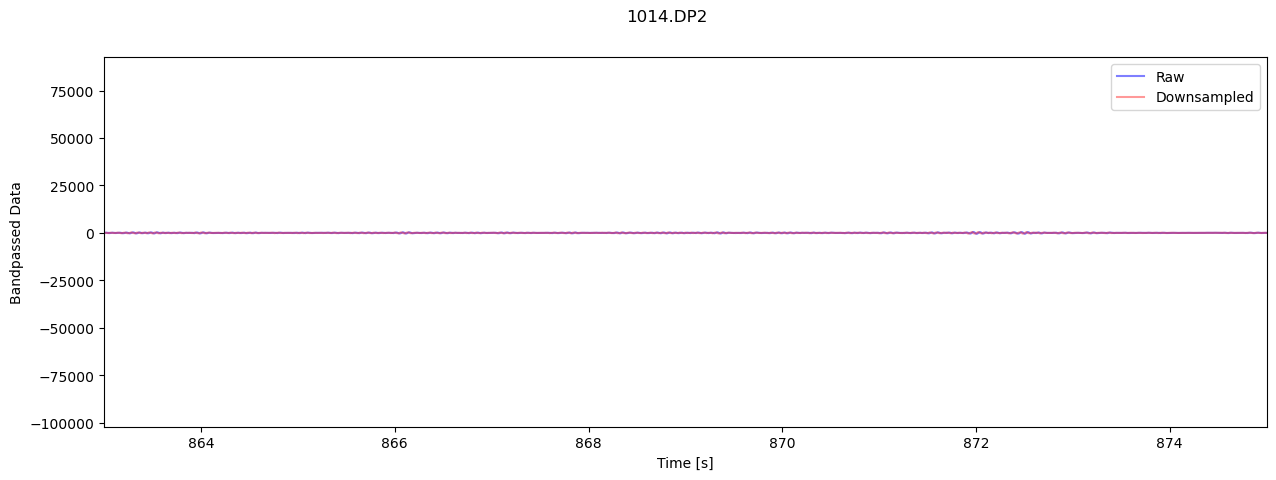

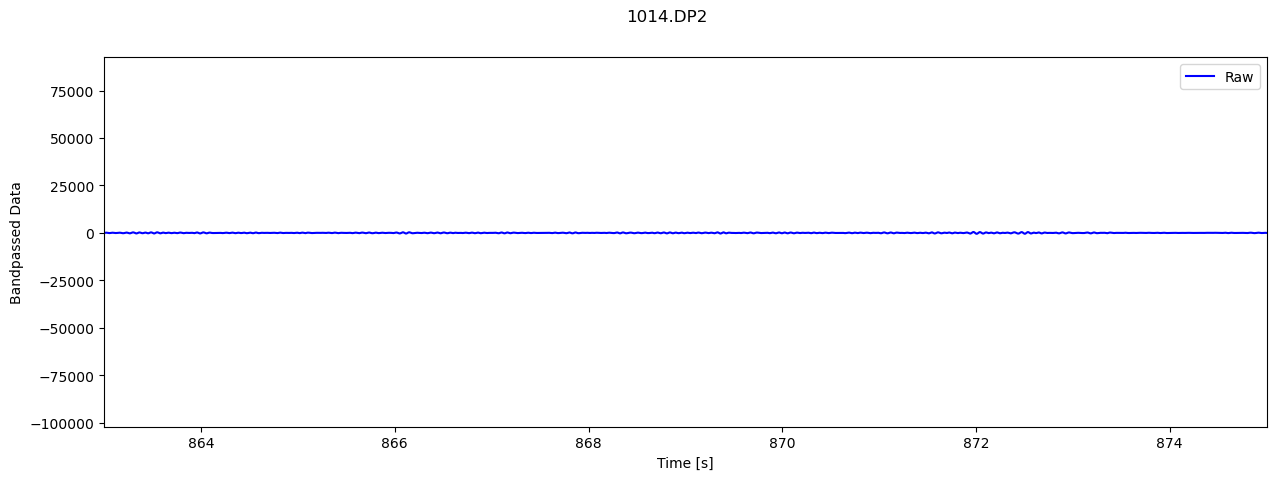

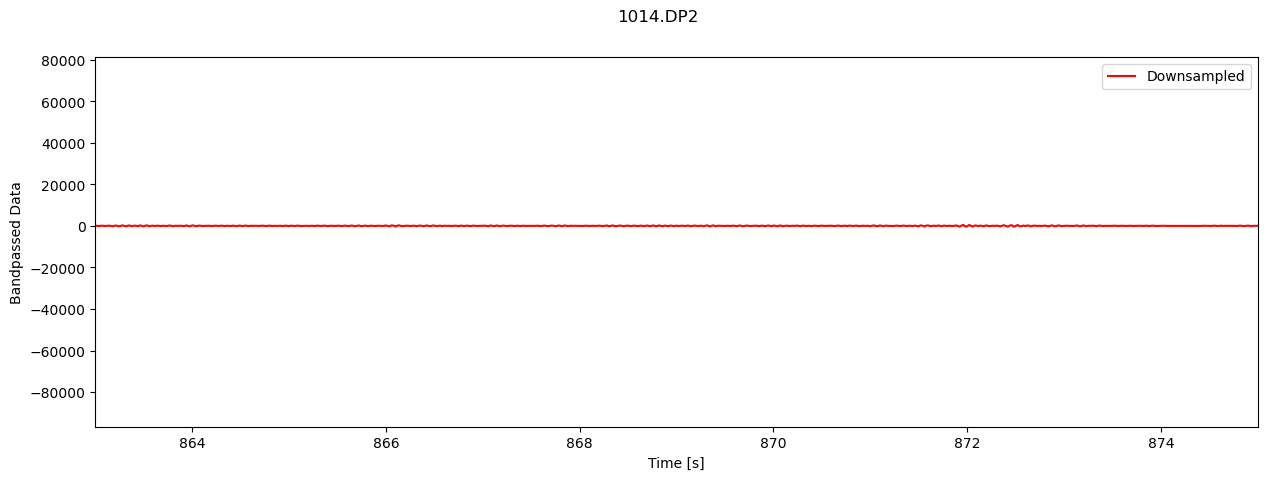

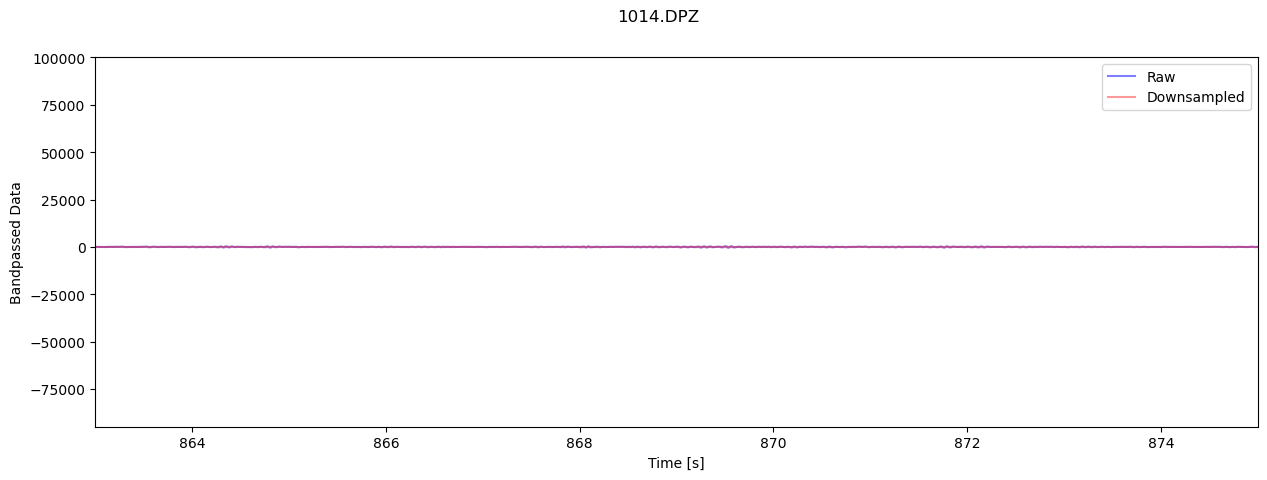

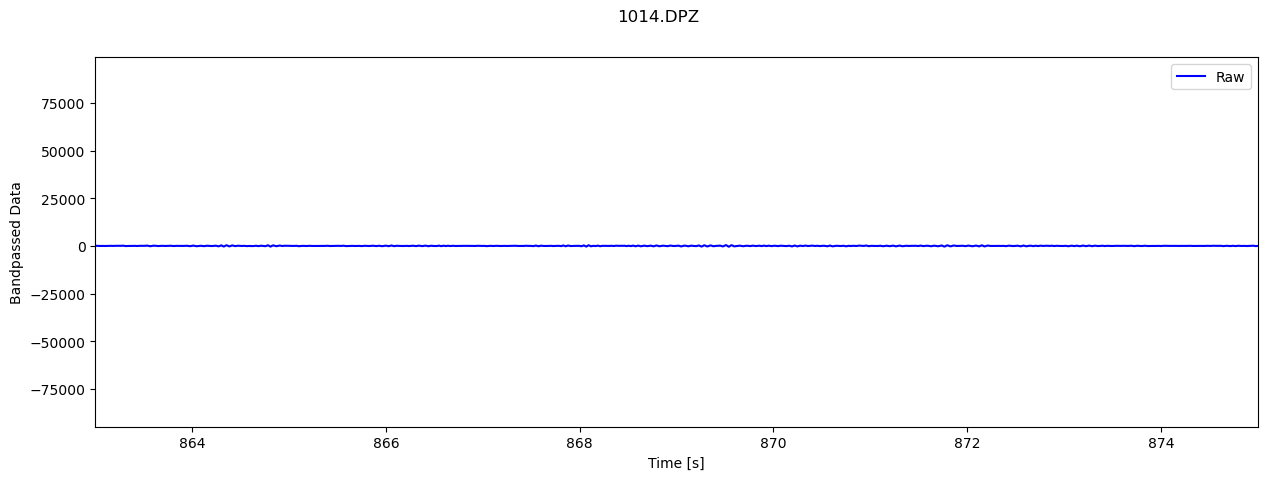

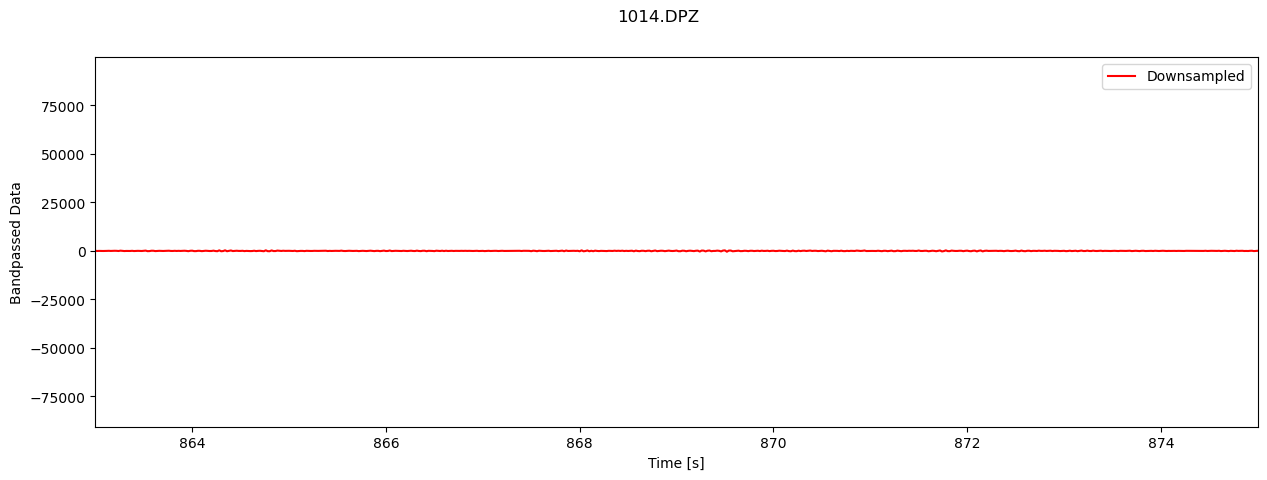

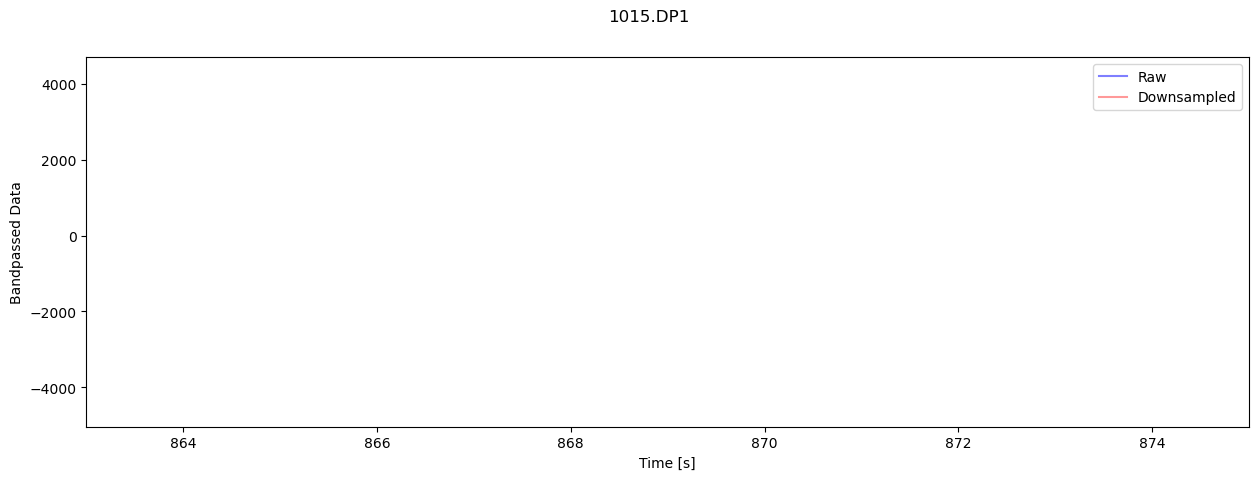

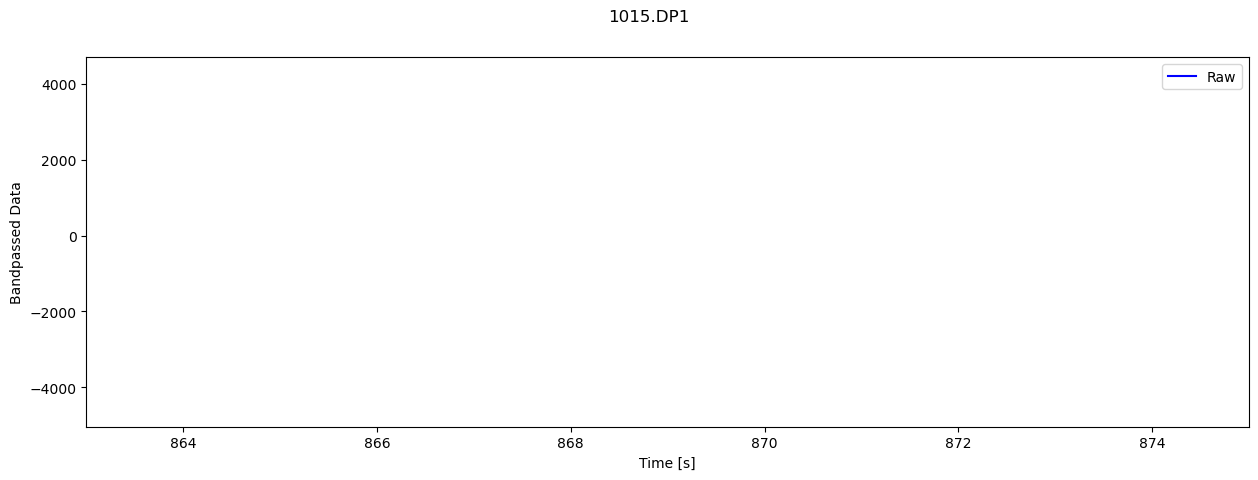

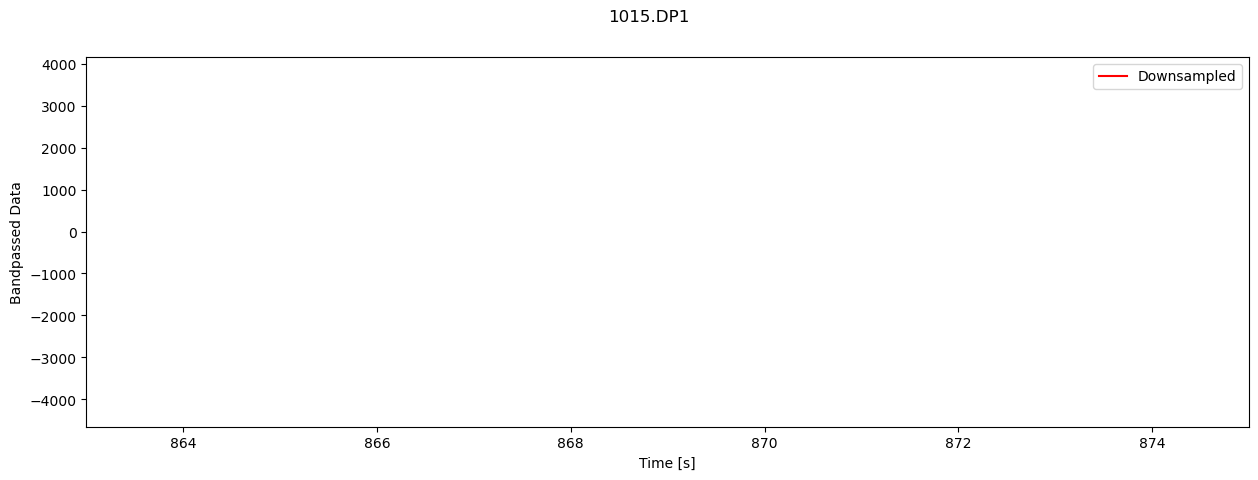

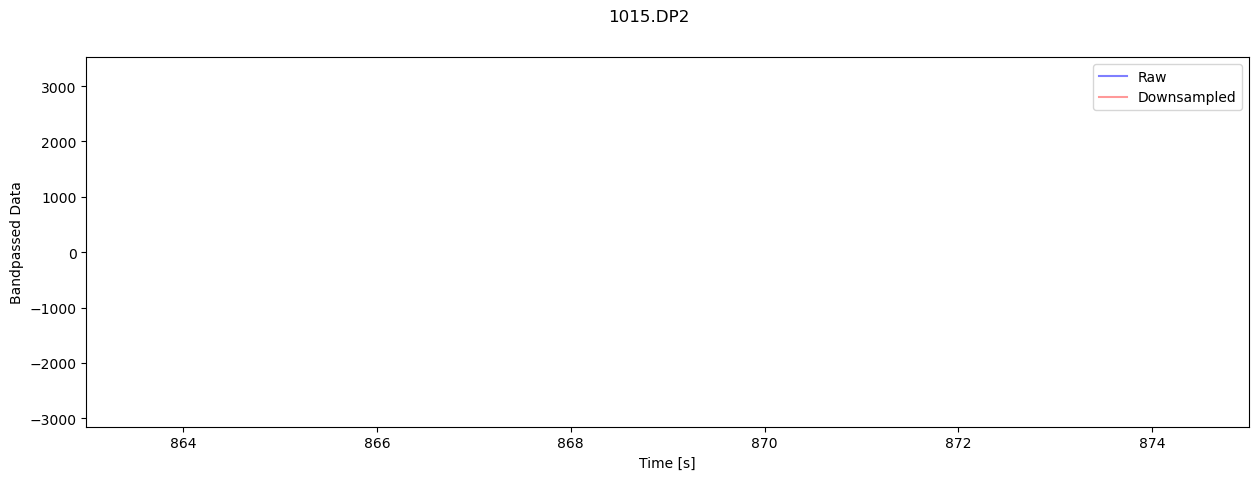

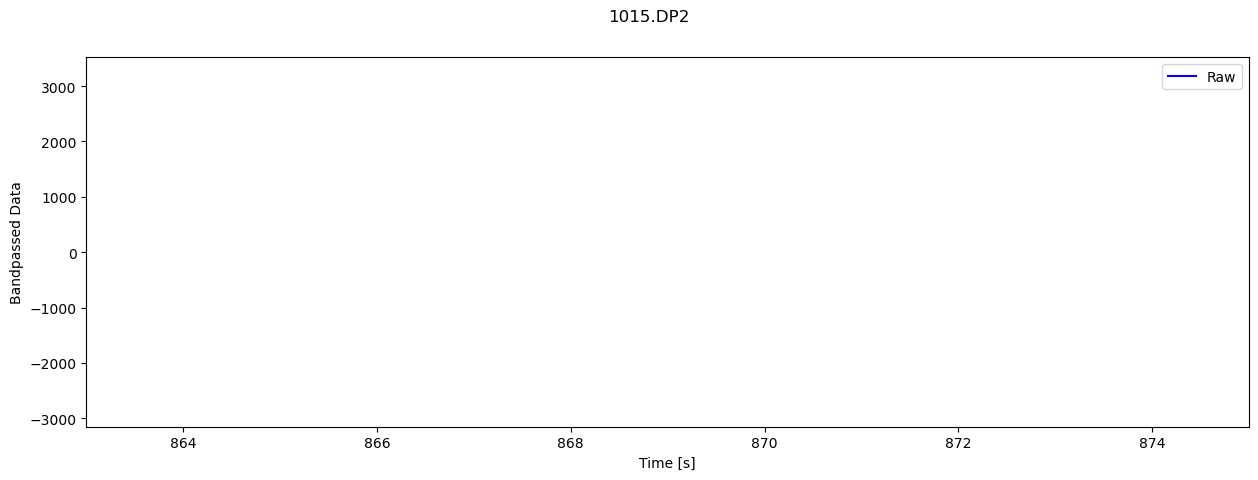

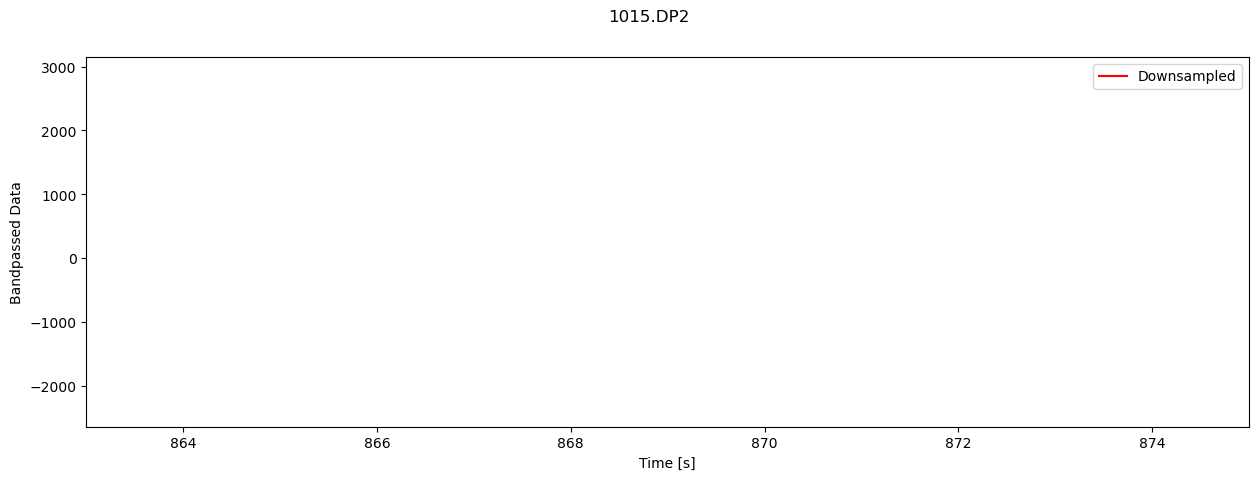

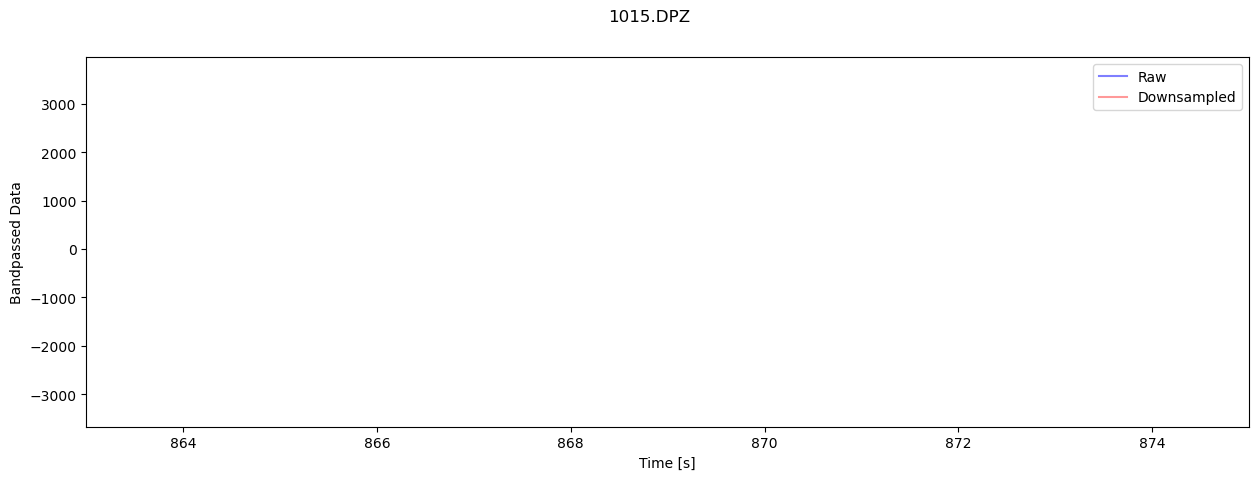

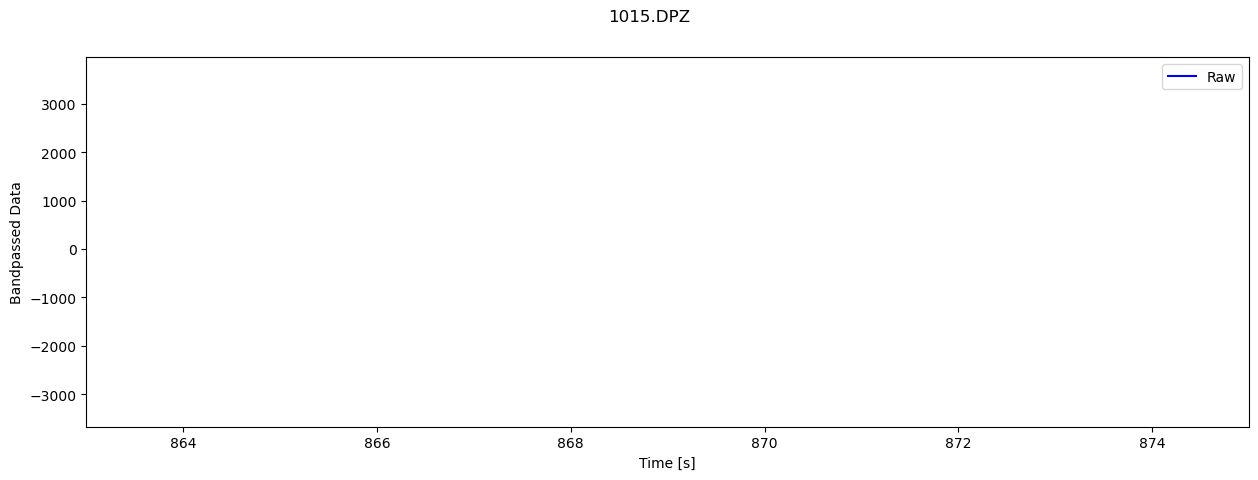

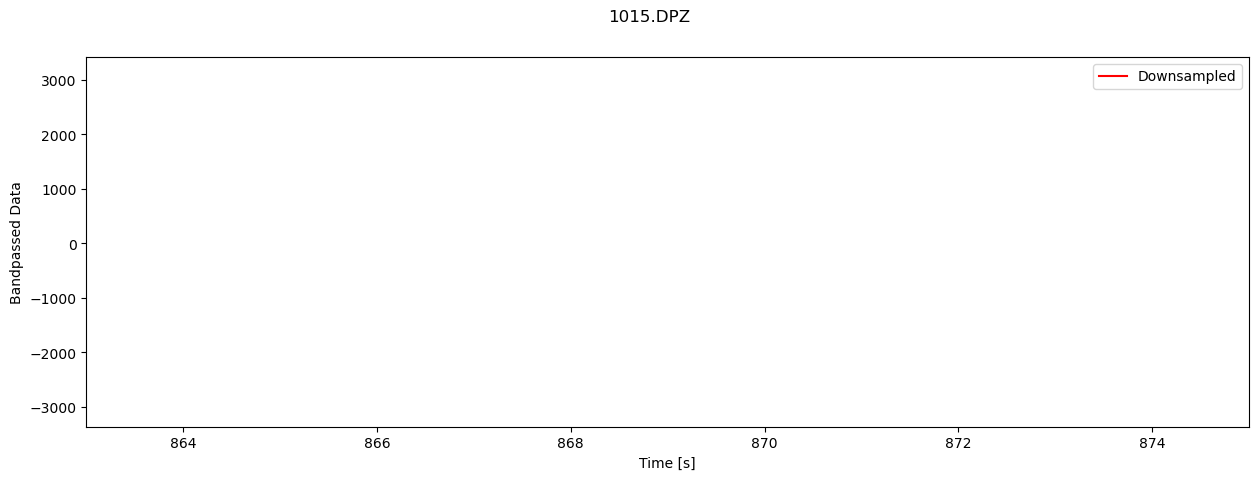

In [23]:
for x in range(len(tr_filt)):

    t = np.arange(0, tr_filt[x].stats.npts / tr_filt[x].stats.sampling_rate, tr_filt[x].stats.delta)

    t_new = np.arange(0, tr_new_filt[x].stats.npts / tr_new_filt[x].stats.sampling_rate,tr_new_filt[x].stats.delta)
    
    plt.figure().set_figwidth(15)

    plt.plot(t, tr_filt[x].data, 'b', label='Raw', alpha=0.5)

    plt.plot(t_new[0:len(tr_new_filt[x])], tr_new_filt[x].data, 'r', label='Downsampled', alpha=0.4)

    plt.ylabel('Bandpassed Data')
    plt.xlabel('Time [s]')

    plt.suptitle(tr[x].stats.station+'.'+tr[x].stats.channel)
    plt.xlim(863,875)
    plt.legend()

    plt.show()
  

    plt.figure().set_figwidth(15)
    plt.plot(t, tr_filt[x].data, 'b', label='Raw')

    plt.ylabel('Bandpassed Data')
    plt.xlabel('Time [s]')

    plt.suptitle(tr[x].stats.station+'.'+tr[x].stats.channel)
    plt.xlim(863,875)
    plt.legend()

    plt.show()
    
    plt.figure().set_figwidth(15)
    plt.plot(t_new[0:len(tr_new_filt[x])], tr_new_filt[x].data, 'r', label='Downsampled')

    plt.ylabel('Bandpassed Data')
    plt.xlabel('Time [s]')

    plt.suptitle(tr[x].stats.station+'.'+tr[x].stats.channel)
    plt.xlim(863,875)
    plt.legend()

    plt.show()
